# Data Anlysis

## Importing librairies

In [1]:
import pickle
import os 
import json
import string
import requests
from IPython.display import clear_output

In [4]:
!pip install langdetect
!pip install names-dataset
!pip install bertopic
!pip install Wikidata
!pip install wordcloud
!pip install pyLDAvis
!pip install NRCLex
!pip install scikit-posthocs
!pip install empath
clear_output()

In [2]:
#EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import datetime
from wikidata.client import Client
from tqdm import tqdm
from collections import Counter

#Preprocessing
from langdetect import detect
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from names_dataset import NameDataset
from itertools import chain 
import seaborn as sns

#Stats
import scipy.stats as stats
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import linregress
import statsmodels.formula.api as smf
from scipy.stats import f_oneway

#LDA
from gensim.models import Phrases
from gensim import corpora
from gensim import models

#WordCloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Topic visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#BERTopic
from bertopic import BERTopic

#Targeted topics
from empath import Empath
import matplotlib.ticker as ticker

#Sentiment analysis
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
from tqdm import tqdm_notebook
from tqdm import tqdm
tqdm.pandas()
clear_output()

In [4]:
from nltk import download
download('averaged_perceptron_tagger')
download('wordnet')
download('omw-1.4')
download('punkt')
download('stopwords')
clear_output()

## References

[[1]](http://www.cs.cmu.edu/~ark/personas/) CMU Movie Summary Corpus webpage  
[[2]](http://www.cs.cmu.edu/~dbamman/pubs/pdf/bamman+oconnor+smith.acl13.pdf) _Learning Latent Personas of Film Characters_, David Bamman, Brendan O'Connor and Noah A. Smith, ACL 2013, Sofia, Bulgaria, August 2013 \
[[3]](https://www.nltk.org/) NLKT documentation 

# Table of contents
### [1. Extracted Topics](#1)

&nbsp;&nbsp;&nbsp;**[1.1 The topics](#1.1)**

&nbsp;&nbsp;&nbsp;**[1.2 Topics over time](#1.2)**

### [2. Concerns ](#2)

&nbsp;&nbsp;&nbsp;**[2.1 Categories across movies](#2.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1.1 Percentage of movies](#2.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1.2 Categories distribution](#2.1.2)

&nbsp;&nbsp;&nbsp;**[2.2 Categories over time](#2.2)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.1 Every year](#2.3.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.2 Every five years](#2.3.2)

### [3. Sentiments](#3)

&nbsp;&nbsp;&nbsp;**[3.1 The sentiments](#3.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Plot sentiment analysis](#3.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Plot multi-sentiments](#3.1.2)

&nbsp;&nbsp;&nbsp;**[3.2 Sentiments over time](#3.2)**


### [4. Combined](#4)

&nbsp;&nbsp;&nbsp;**[4.1 Topics and sentiments](#4.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1.1 Topics and sentiments association](#4.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1.2 Topics and sentiments over time](#4.1.2)

&nbsp;&nbsp;&nbsp;**[4.2 Topics and concerns](#4.2)**

&nbsp;&nbsp;&nbsp;**[4.2 Sentiments and concerns](#4.3)**

### [5. Statistical analysis](#5)

&nbsp;&nbsp;&nbsp;**[5.1 Over time](#5.1)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.1 Topics over time](#5.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.2 Sentiments over time](#5.1.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.2.1 Compound](#5.1.2.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.2.2 All sentiments](#5.1.2.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.1.3 Concern categories over time](#5.1.3)

&nbsp;&nbsp;&nbsp;**[5.2 Overall](#5.2)**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1 Sentiments](#5.2.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.1 During the whole period](#5.2.1.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.2 During t1](#5.2.1.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.3 During t2](#5.2.1.3)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.1.4 During t3](#5.2.1.4)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2 Concern categories](#5.2.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.1 During the whole period](#5.2.2.1)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.2 During t1](#5.2.2.2)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.3 During t2](#5.2.2.3)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5.2.2.4 During t3](#5.2.2.4)


&nbsp;&nbsp;&nbsp;**[5.3 Sentiments and topics](#5.3)**\
&nbsp;&nbsp;&nbsp;**[5.4 Sentiments and concerns](#5.4)**

## Context

All the preprocessing and data preparation have been done in `blabla.ipynb`. In this notebook, we will focus on the analysis of the information we obtained.

In [5]:
#Loading our complete dataset
movies = pd.read_pickle('data/movies_aug_BERT_SA_Concern.pkl')

In [6]:
movies.head()

WikiMovieID FreeMovieID                      Title ReleaseDate     Revenue  \
0       975900   /m/03vyhn             Ghosts of Mars  2001-08-24  14010832.0   
1      9363483  /m/0285_cd           White Of The Eye        1987         NaN   
2       261236   /m/01mrr1          A Woman in Flames        1983         NaN   
3     18998739  /m/04jcqvw  The Sorcerer's Apprentice        2002         NaN   
4      6631279   /m/0gffwj                Little city  1997-04-04         NaN   

   Runtime           Languages                   Countries  \
0     98.0  [English Language]  [United States of America]   
1    110.0  [English Language]            [United Kingdom]   
2    106.0   [German Language]                   [Germany]   
3     86.0  [English Language]              [South Africa]   
4     93.0  [English Language]  [United States of America]   

                                              Genres  \
0  [Thriller, Science Fiction, Horror, Adventure,...   
1  [Thriller, Erotic thriller, Psychological thri...   
2                                            [Drama]   
3    [Family Film, Fantasy, Adventure, World cinema]   
4  [Romantic comedy, Ensemble Film, Comedy-drama,...   

                                                Plot  ... ecological_concern  \
0  Set in the second half of the 22nd century, th...  ...                0.0   
1  A series of murders of rich young women throug...  ...                0.0   
2  Eva, an upper class housewife, becomes frustra...  ...                0.0   
3  Every hundred years, the evil Morgana  returns...  ...                0.0   
4  Adam, a San Francisco-based artist who works a...  ...                0.0   

  health_concern conflict_concern technological_concern space_concern  \
0            0.0         0.004484                   0.0      0.013453   
1            0.0         0.000000                   0.0      0.003257   
2            0.0         0.000000                   0.0      0.000000   
3            0.0         0.000000                   0.0      0.000000   
4            0.0         0.000000                   0.0      0.000000   

  gender_inequality_concern homophobia_concern racism_concern mental_concern  \
0                       0.0                0.0            0.0            0.0   
1                       0.0                0.0            0.0            0.0   
2                       0.0                0.0            0.0            0.0   
3                       0.0                0.0            0.0            0.0   
4                       0.0                0.0            0.0            0.0   

   relationships_concern  
0               0.004484  
1               0.003257  
2               0.000000  
3               0.000000  
4               0.030928  

[5 rows x 60 columns]

In [7]:
# Length of our dataset
print('We have {} data points.'.format(len(movies)))

We have 42178 datapoints.


In [8]:
# Most represented countries
print('Country representation:')
movies['Countries'].value_counts()[:6]

Country representation:


[United States of America]    17773
[India]                        4620
[]                             3307
[United Kingdom]               2284
[Japan]                        1157
[France]                        847
Name: Countries, dtype: int64

# 1. Extracted Topics <a id='1'></a>

## 1.1 The topics <a id='1.1'></a>

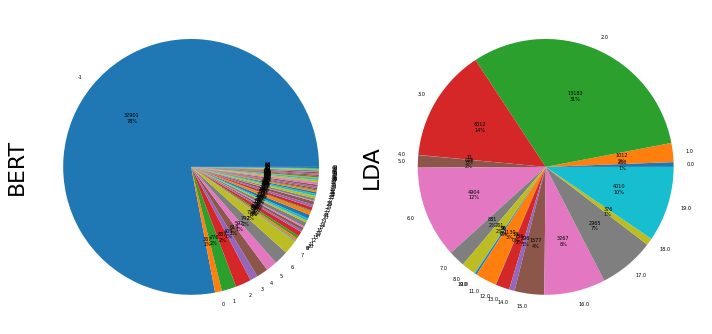

In [11]:
def label_function(val):
    return f'{val / 100 * len(movies):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
movies.groupby('BERT').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 5}, ax=ax1)
movies.groupby('Topic').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 5}, ax=ax2)
ax1.set_ylabel('BERT', size=22)
ax2.set_ylabel('LDA', size=22)
plt.tight_layout()
plt.show()

In [ ]:
#Dataset creation for flourish plot

#Read data cotaining words belonging to each Bert topics
topic_words_dict = pd.read_pickle('data/words_per_topic.pkl')

#Select top 20 most frequent topics
topics_BERT_20 = movies["BERT"].value_counts(dropna=False) 
topics_BERT_20 = topics_BERT_20[topics_BERT_20>130].index.tolist()
topics_BERT_20.remove(-1) #-1 corresponds to unclassified movies

topic_words = pd.DataFrame()
rep = movies.groupby(['BERT']).size()

for topic in topics_BERT_20:
    for nb in range(0,10):
        new_row = {'Words':topic_words_dict[topic][nb][0], 'Word_score':topic_words_dict[topic][nb][1], 'Topic':topic, 'Topic_rep':rep[topic]}
        topic_words = topic_words.append(new_row, ignore_index=True)
clear_output()

In [54]:
topic_words["Combined_rep"]=topic_words["Word_score"]*topic_words["Topic_rep"]
topic_words
#topic_words.to_excel("topic_words.xlsx")

### 1.1.2 With BERT <a id='1.1.2'></a>

Labels for the top 10 most common topics.

In [41]:
#bert_topics = model.generate_topic_labels()

bert_topics = pd.read_pickle('predictions/bert_topics.pkl')
bert_topics = pd.DataFrame(bert_topics, columns = ["Bert_Topic"])
bert_topics.head(10)

Bert_Topic
0        -1_film_father_life
1     0_father_police_family
2  1_police_murder_detective
3           2_town_men_horse
4     3_mother_father_family
5       4_earth_planet_space
6      5_ship_island_captain
7         6_wong_kong_master
8        7_tokyo_conan_japan
9       8_tells_home_husband

Visualization of the data set with the BERT topics.

## 1.2 Topics over time<a id='1.2'></a>

In [18]:
movies["year"] = pd.to_datetime(movies.ReleaseDate, errors="coerce").dt.year
movies["five_year_period"] = movies.year//5*5

# A lot of the ReleaseDate are not filled in the initial dataset which leads to NaT (and eventually NaN) values when converting to datetime
movies_with_year = movies[~movies.year.isna()]
print("We could extract the year of the release date for {:.2f}% of the movies".format(len(movies_with_year)/len(movies)*100))

We could extract the year of the release date for 93.80% of the movies


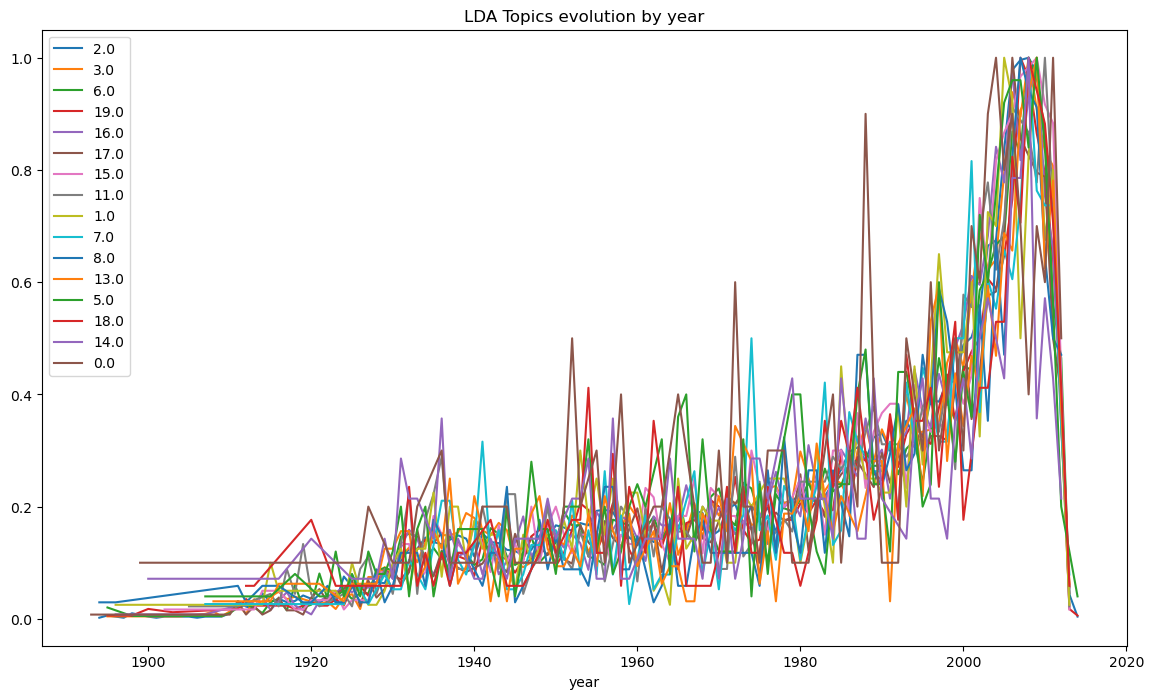

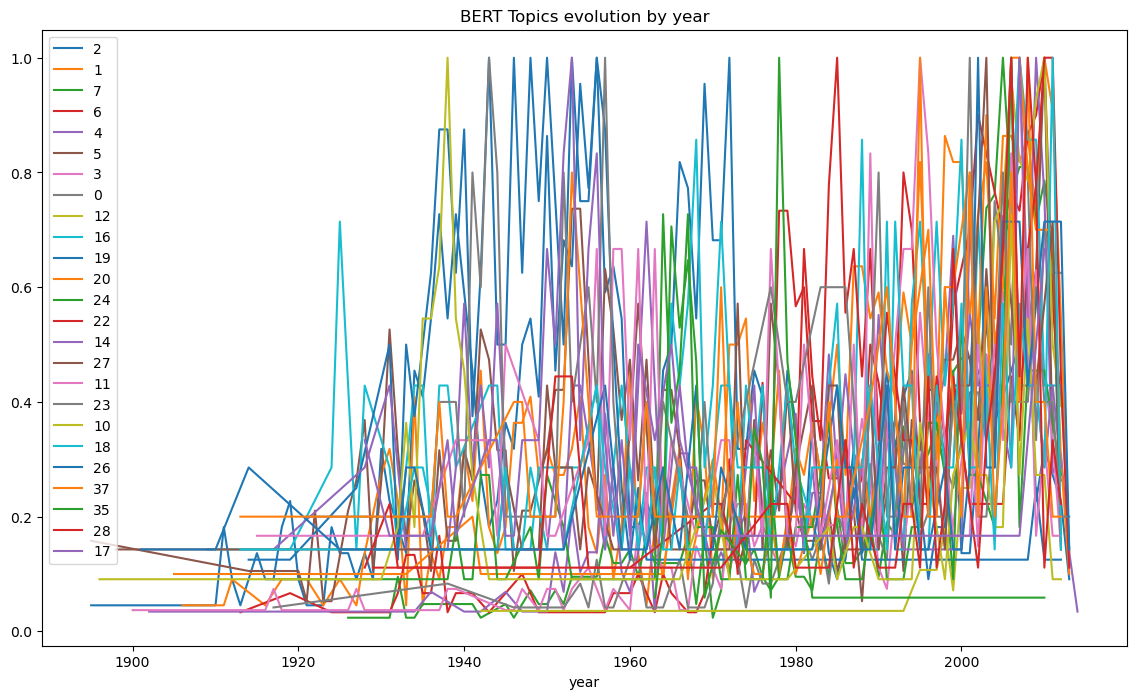

In [55]:
# Unique LDA topics with at least 100 movies assigned
topics_LDA = movies["Topic"].value_counts(dropna=True) 
topics_LDA = topics_LDA[topics_LDA>100].index.tolist()

fig = plt.figure(figsize=(14,8))
for topic in topics_LDA:
    temp = movies_with_year[movies_with_year.Topic==topic].groupby(["year"]).size()
    temp = temp/temp.max()   #should we divide by the movies_with_year.groupby(["year"]).size() ???
    fig = temp.plot(label=topic)
fig = plt.title("LDA Topics evolution by year")
fig = plt.legend()
fig = plt.show()

# Unique BERT topics with at least 100 movies assigned
topics_BERT = movies["BERT"].value_counts(dropna=False) 
topics_BERT = topics_BERT[topics_BERT>100].index.tolist()
## -1 goes to unclassfied movies
topics_BERT.remove(-1)

fig = plt.figure(figsize=(14,8))
for topic in topics_BERT:
    temp = movies_with_year[movies_with_year.BERT==topic].groupby(["year"]).size()
    temp = temp/temp.max()   
    fig = temp.plot(label=topic)
fig = plt.title("BERT Topics evolution by year")
fig = plt.legend()
fig = plt.show()

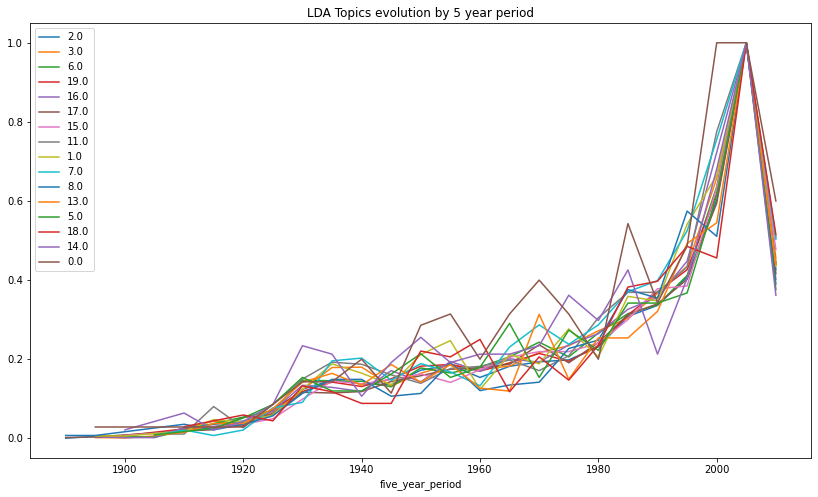

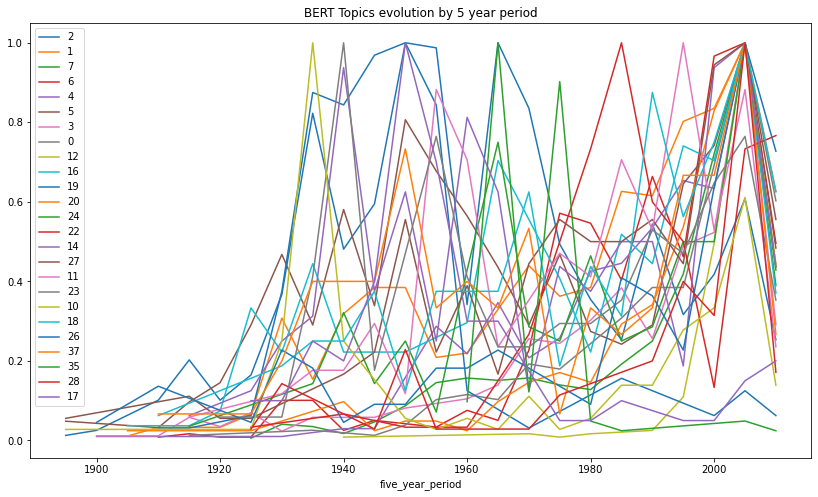

In [19]:
fig = plt.figure(figsize=(14,8))
for topic in topics_LDA:
    temp = movies_with_year[movies_with_year.Topic==topic].groupby(["five_year_period"]).size()
    temp = temp/temp.max()   
    fig = temp.plot(label=topic)
fig = plt.title("LDA Topics evolution by 5 year period")
fig = plt.legend()
fig = plt.show()

fig = plt.figure(figsize=(14,8)) 
for topic in topics_BERT:
    temp = movies_with_year[movies_with_year.BERT==topic].groupby(["five_year_period"]).size()
    temp = temp/temp.max()   
    fig = temp.plot(label=topic)
fig = plt.title("BERT Topics evolution by 5 year period")
fig = plt.legend()
fig = plt.show()

Last graph actually could be useful to draw some results. Now it doesn't show (so i'll have to make it show somehow) but if you plot just 1 topic (instead of all of them) you can see that for a few topics there was an interest eirther for a few decades and then it died out or the other way around. Depending on which topics these are (still a number i have to get real tags/names) it could be interesting. 

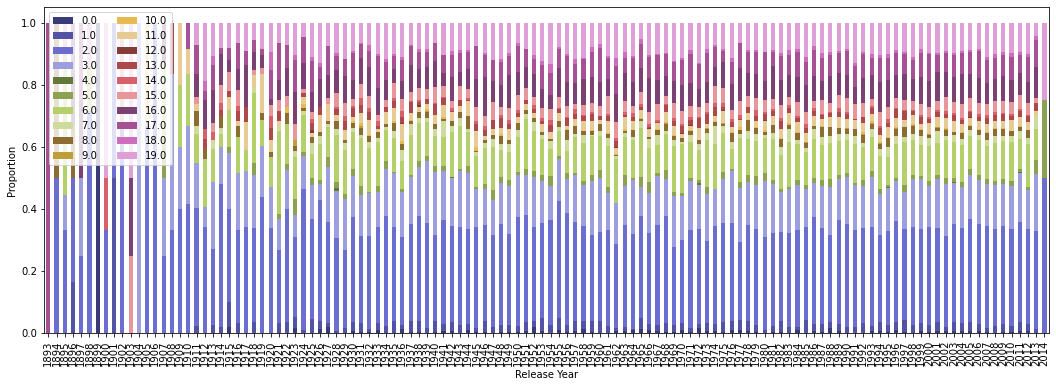

In [20]:
#Evolution over year LDA topics
cross_tab_prop = pd.crosstab(index=movies_with_year["year"].astype(int),
                             columns=movies_with_year["Topic"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20b', 
                    figsize=(18, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

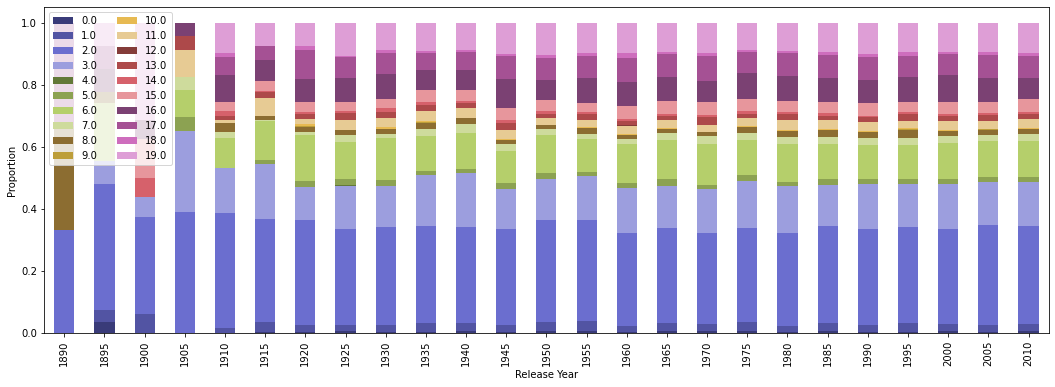

In [21]:
#Evolution over 5years LDA topics
cross_tab_prop = pd.crosstab(index=movies_with_year["five_year_period"].astype(int),
                             columns=movies_with_year["Topic"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20b', 
                    figsize=(18, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

In [56]:
BERT_movies_with_year = movies_with_year[movies_with_year['BERT'].isin(topics_BERT)]
#Adding the names of the BERT topics into the data Frame (should we do it earlier)?
BERT_movies_with_year['BERT_names']=bert_topics.iloc[BERT_movies_with_year['BERT'].astype(int)+1].values
BERT_movies_with_year.head() #there is a warning but it does what I want (:

C:\Users\clara\AppData\Local\Temp\ipykernel_16380\4111283085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BERT_movies_with_year['BERT_names']=bert_topics.iloc[BERT_movies_with_year['BERT'].astype(int)+1].values


WikiMovieID FreeMovieID                                          Title  \
0        975900   /m/03vyhn                                 Ghosts of Mars   
10     21926710  /m/05p45cv                                  White on Rice   
21     25960460  /m/0b6kc_5                                 Daddy and Them   
36     16686643  /m/03ymtlq  One Small Step: The Story of the Space Chimps   
40     25413122  /m/04j1nd9                        Drums in the Deep South   

   ReleaseDate     Revenue  Runtime           Languages  \
0   2001-08-24  14010832.0     98.0  [English Language]   
10        2009         NaN     82.0                  []   
21        2001         NaN    101.0  [English Language]   
36        1995         NaN     60.0                  []   
40        1951         NaN     87.0  [English Language]   

                                  Countries  \
0                [United States of America]   
10               [United States of America]   
21  [United States of America, Netherlands]   
36               [United States of America]   
40               [United States of America]   

                                               Genres  \
0   [Thriller, Science Fiction, Horror, Adventure,...   
10     [Romantic comedy, Romance Film, Comedy, Indie]   
21                             [Black comedy, Comedy]   
36                                      [Documentary]   
40              [Action/Adventure, Western, War film]   

                                                 Plot  ...  \
0   Set in the second half of the 22nd century, th...  ...   
10  Jimmy ([[Hiroshi Watanabe  loves dinosaurs and...  ...   
21  Ruby and Claude Montgomery are a very insecure...  ...   
36  Told through archival photos and footage, spac...  ...   
40  Best friends Clay Clayburn and Will Denning gr...  ...   

   technological_concern space_concern gender_inequality_concern  \
0               0.000000      0.013453                       0.0   
10              0.000000      0.000000                       0.0   
21              0.000000      0.000000                       0.0   
36              0.009615      0.076923                       0.0   
40              0.000000      0.000000                       0.0   

   homophobia_concern racism_concern mental_concern relationships_concern  \
0                 0.0            0.0            0.0              0.004484   
10                0.0            0.0            0.0              0.033333   
21                0.0            0.0            0.0              0.107143   
36                0.0            0.0            0.0              0.000000   
40                0.0            0.0            0.0              0.000000   

      year five_year_period              BERT_names  
0   2001.0           2000.0    4_earth_planet_space  
10  2009.0           2005.0     7_tokyo_conan_japan  
21  2001.0           2000.0  3_mother_father_family  
36  1995.0           1995.0    4_earth_planet_space  
40  1951.0           1950.0        2_town_men_horse  

[5 rows x 63 columns]

In [23]:
colors=[[0.22352941, 0.23137255, 0.4745098,  1.        ],
        [0.32156863, 0.32941176, 0.63921569, 1.        ],
        [0.61176471, 0.61960784, 0.87058824, 1.        ],
        [0.38823529, 0.4745098,  0.22352941, 1.        ],
        [0.54901961, 0.63529412, 0.32156863, 1.        ],
        [0.80784314, 0.85882353, 0.61176471, 1.        ],
        [0.54901961, 0.42745098, 0.19215686, 1.        ],
        [0.74117647, 0.61960784, 0.22352941, 1.        ],
        [0.90588235, 0.79607843, 0.58039216, 1.        ],
        [0.51764706, 0.23529412, 0.22352941, 1.        ],
        [0.67843137, 0.28627451, 0.29019608, 1.        ],
        [0.90588235, 0.58823529, 0.61176471, 1.        ],
        [0.48235294, 0.25490196, 0.45098039, 1.        ],
        [0.64705882, 0.31764706, 0.58039216, 1.        ],
        [0.19215686, 0.50980392, 0.74117647, 1.        ],
        [0.41960784, 0.68235294, 0.83921569, 1.        ],
        [0.90196078, 0.33333333, 0.05098039, 1.        ],
        [0.99215686, 0.55294118, 0.23529412, 1.        ],
        [0.19215686, 0.63921569, 0.32941176, 1.        ],
        [0.45490196, 0.76862745, 0.4627451 , 1.        ],
        [0.45882353, 0.41960784, 0.69411765, 1.        ],
        [0.61960784, 0.60392157, 0.78431373, 1.        ],
        [0.38823529, 0.38823529, 0.38823529, 1.        ],
        [0.58823529, 0.58823529, 0.58823529, 1.        ]]

colors_tab20b =  plt.cm.get_cmap('tab20b')
#print(colors_tab20b([0,1,3,4,5,7,8,9,11,12,13,15,16,17]))
colors_tab20c =  plt.cm.get_cmap('tab20c')
#print(colors_tab20c([0,1,4,5,8,9,12,13,16,17]))
#colors = np.vstack((colors_tab20b,colors_tab20c))
#print(colors)
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

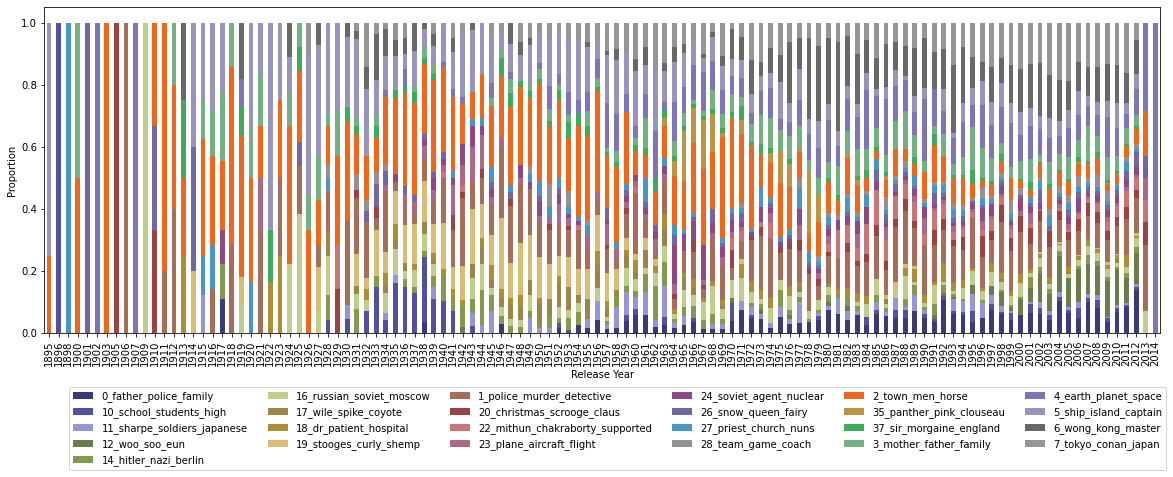

In [24]:
#Evolution over year BERT topics

cross_tab_prop = pd.crosstab(index=BERT_movies_with_year["year"].astype(int),
                             columns=BERT_movies_with_year["BERT_names"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=mymap, 
                    figsize=(20, 6))

plt.legend(ncol=6,bbox_to_anchor=(1.01, -0.15))
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

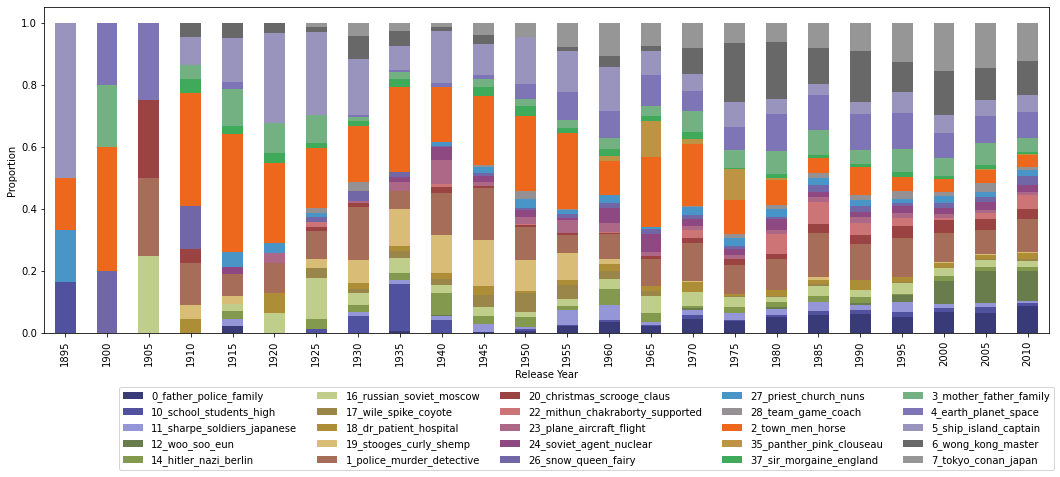

In [25]:
#evolution over 5yers BERT topics
cross_tab_prop = pd.crosstab(index=BERT_movies_with_year["five_year_period"].astype(int),
                             columns=BERT_movies_with_year["BERT_names"],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=mymap, 
                    figsize=(18, 6))

plt.legend(ncol=5,bbox_to_anchor=(1.01, -0.15)) #ncol=1,bbox_to_anchor=(1.01, 1.0))
plt.xlabel("Release Year")
plt.ylabel("Proportion")
plt.show()

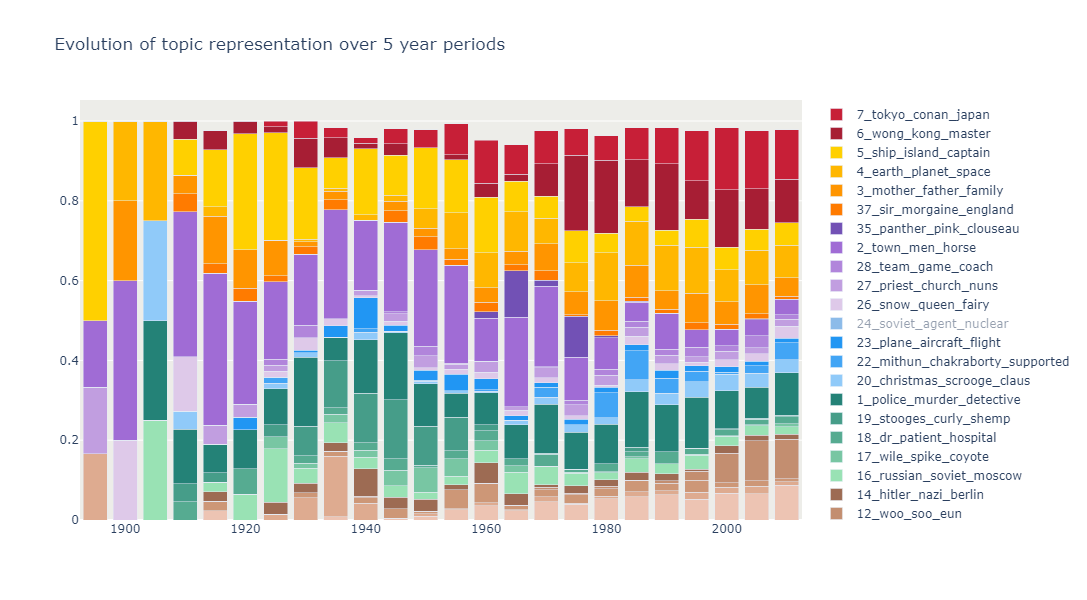

In [164]:
# Original colour palette leaving it here just in case it's needed elsewhere
# Shades of 
colours = ["DEC9E9", "C19EE0", "B185DB", "A06CD5", "7251B5", "6247AA",   #violet
           "99E2B4", "78C6A3", "56AB91", "469D89", "248277", "036666",   #green
           "FF7B00", "FF9500", "FFAA00", "FFB700", "FFD000", "FFEA00",   #yellow
           "641220", "85182A", "A71E34", "B21E35", "C71F37", "E01E37",   #red
           "E3F2FD", "90CAF9", "42A5F5", "2196F3", "1976D2", "0D47A1",   #blue
           "FF0A54", "FF5C8A", "FF85A1", "FF99AC", "F9BEC7", "FAE0E4",   #pink
           "EDC4B3", "DEAB90", "CD9777", "C38E70", "9D6B53", "774936"]   #brown

colours = ["EDC4B3", "DEAB90", "CD9777", "C38E70", "9D6B53", 
           "99E2B4", "78C6A3", "56AB91", "469D89", "248277", 
           "90CAF9", "42A5F5", "2196F3", "1976D2", 
           "DEC9E9", "C19EE0", "B185DB", "A06CD5", "7251B5", 
           "FF7B00", "FF9500", "FFB700", "FFD000",  
           "A71E34",  "C71F37", ]


colours = ["#"+colour for colour in colours]

# Same as before - Can be deleted if we keep all graphs 
cross_tab_prop = pd.crosstab(index=BERT_movies_with_year["five_year_period"].astype(int),
                             columns=BERT_movies_with_year["BERT_names"],
                             normalize="index")

plot_data = []
for i, x in enumerate(cross_tab_prop.columns):
    plot_data.append(go.Bar(name=str(x), x=cross_tab_prop.index, y=cross_tab_prop[x], marker_color = colours[i]))

figure = go.Figure(plot_data)
figure.update_layout(barmode = 'stack',
                     width = 900,
                     height = 600,
                     autosize = True,
                     title_text = "Evolution of topic representation over 5 year periods",
                     plot_bgcolor="#edede9",
                    )

figure.show()

figure.write_html("output/bert_topics_time.html")

### 1.2.1 With LDA <a id='1.2.1'></a>

<AxesSubplot:xlabel='year', ylabel='Topic'>

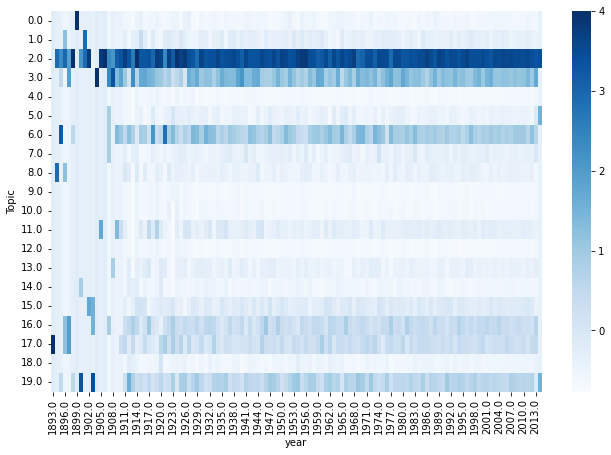

In [33]:
#Create a 2D table with topics as rows and years as columns
for_heatmap_LDA = movies_with_year.groupby(['year','Topic'])['WikiMovieID'].count().reset_index().sort_values(by='year')
for_heatmap_LDA = for_heatmap_LDA.pivot(columns = 'year', index='Topic', values= 'WikiMovieID').fillna(0)

#Row normalization
#cols = for_heatmap_LDA.columns
#for col in cols:
#    for_heatmap_LDA['{}_'.format(col)] = (for_heatmap_LDA[col] - for_heatmap_LDA.mean(axis=1) ) / for_heatmap_LDA.std(axis=1)
#cols_z = ['{}_'.format(col) for col in cols]

#Column normalization
for_heatmap_LDA = (for_heatmap_LDA - for_heatmap_LDA.mean()) / for_heatmap_LDA.std()

fig,ax=plt.subplots(figsize=(11,7))
#sns.heatmap(for_heatmap_LDA[cols_z], ax = ax, yticklabels=True, cmap="Blues", vmax = 5)
sns.heatmap(for_heatmap_LDA, ax = ax, yticklabels=True, cmap="Blues", vmax = 4)

### 1.2.2 With BERT <a id='1.2.2'></a>

<AxesSubplot:xlabel='year', ylabel='BERT_names'>

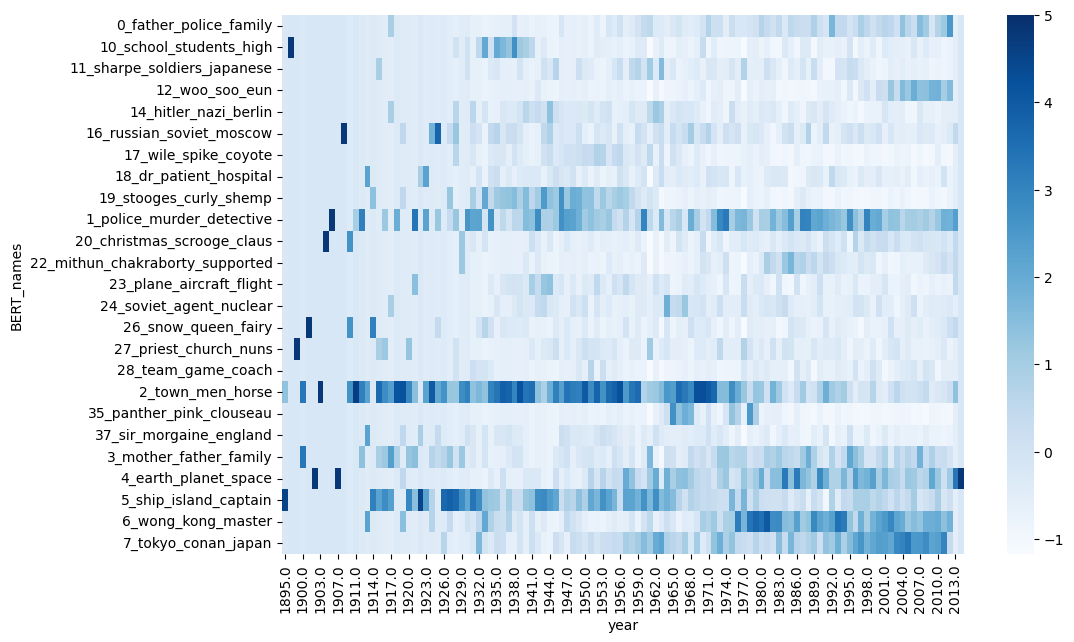

In [57]:
#Create a 2D table with topics as rows and years as columns
for_heatmap_BERT = BERT_movies_with_year.groupby(['year','BERT_names'])['WikiMovieID'].count().reset_index().sort_values(by='year')
for_heatmap_BERT = for_heatmap_BERT.pivot(columns = 'year', index='BERT_names', values= 'WikiMovieID').fillna(0)

#Column normalization
for_heatmap_BERT = (for_heatmap_BERT - for_heatmap_BERT.mean()) / for_heatmap_BERT.std()

fig,ax=plt.subplots(figsize=(11,7))
#sns.heatmap(for_heatmap_LDA[cols_z], ax = ax, yticklabels=True, cmap="Blues", vmax = 5)
sns.heatmap(for_heatmap_BERT, ax = ax, yticklabels=True, cmap="Blues", vmax =5)

---

# 2. Concerns <a id='2'></a>

In `EDA_Preprocess_Models.ipynb` we created lexical categories for different concerns which may arise in the sociecy. Those concerns are  about:
- ecology, 
- health,
- war and conflicts,
- technologies,
- space,
- gender inequalities,
- homophobia,
- racism,
- mental state,
- human interactions and relationships.

In [ ]:
categories = ["ecological_concern", "health_concern", "conflict_concern", "technological_concern",
              "space_concern", "gender_inequality_concern", "homophobia_concern", "racism_concern",
              "mental_concern","relationships_concern"]

## 2.1 Across movies <a id='2.1'></a>

In this section, we look at how the concerns are represented across movies.

### 2.1.1 Percentage of movies <a id='2.1.1'></a>

First, the percentage of movies that are in a certain category is computed,
- first by counting all non-null entries in each category,
- then by restricting to only movies having a score greater than 0.01

In [35]:
def count_movies_category(category, threshold):
    count = np.sum(movies[category].values>threshold)
    return count

In [37]:
# Percentage of non-zeros scores per category
non_null = []
for category in categories :
    non_null.append(100 * count_movies_category(category, threshold=0) / len(movies))
# Percentage of scores higher than 0.01 per category
high_score = []
for category in categories :
    high_score.append(100 * count_movies_category(category, threshold=0.01) / len(movies))

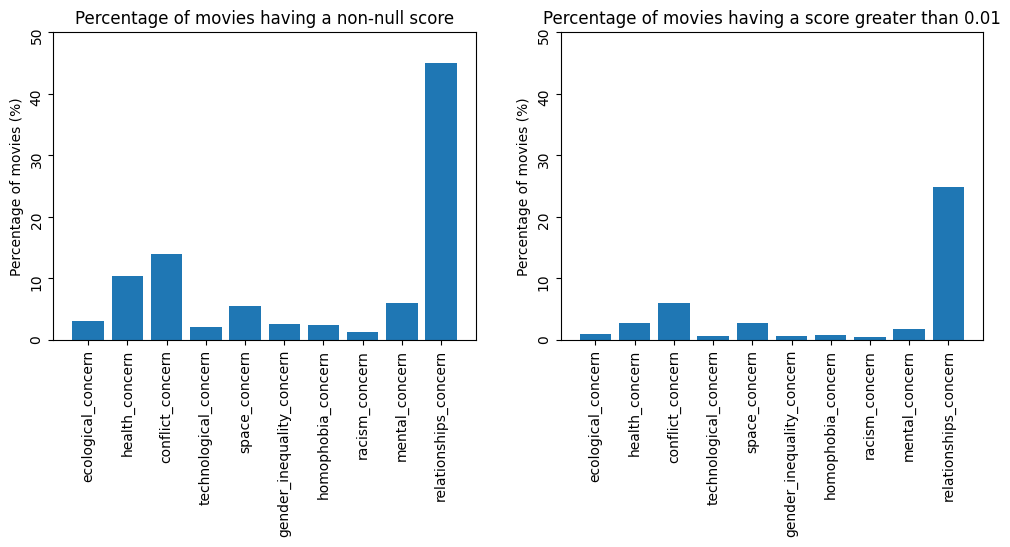

In [258]:
fig, axs = plt.subplots(1, 2, figsize = (12,4))
axs[0].bar(categories, non_null)
axs[0].tick_params(labelrotation=90)
axs[0].set_ylim([0, 50])
axs[0].set_ylabel("Percentage of movies (%)")
axs[0].set_title("Percentage of movies having a non-null score")
axs[1].bar(categories, high_score)
axs[1].tick_params(labelrotation=90)
axs[1].set_ylim([0, 50])
axs[1].set_ylabel("Percentage of movies (%)")
axs[1].set_title("Percentage of movies having a score greater than 0.01")
plt.show()

### 2.1.2 Categories distributions <a id='2.1.2'></a>

For each category, the score distribution is plotted in logarithmic values.

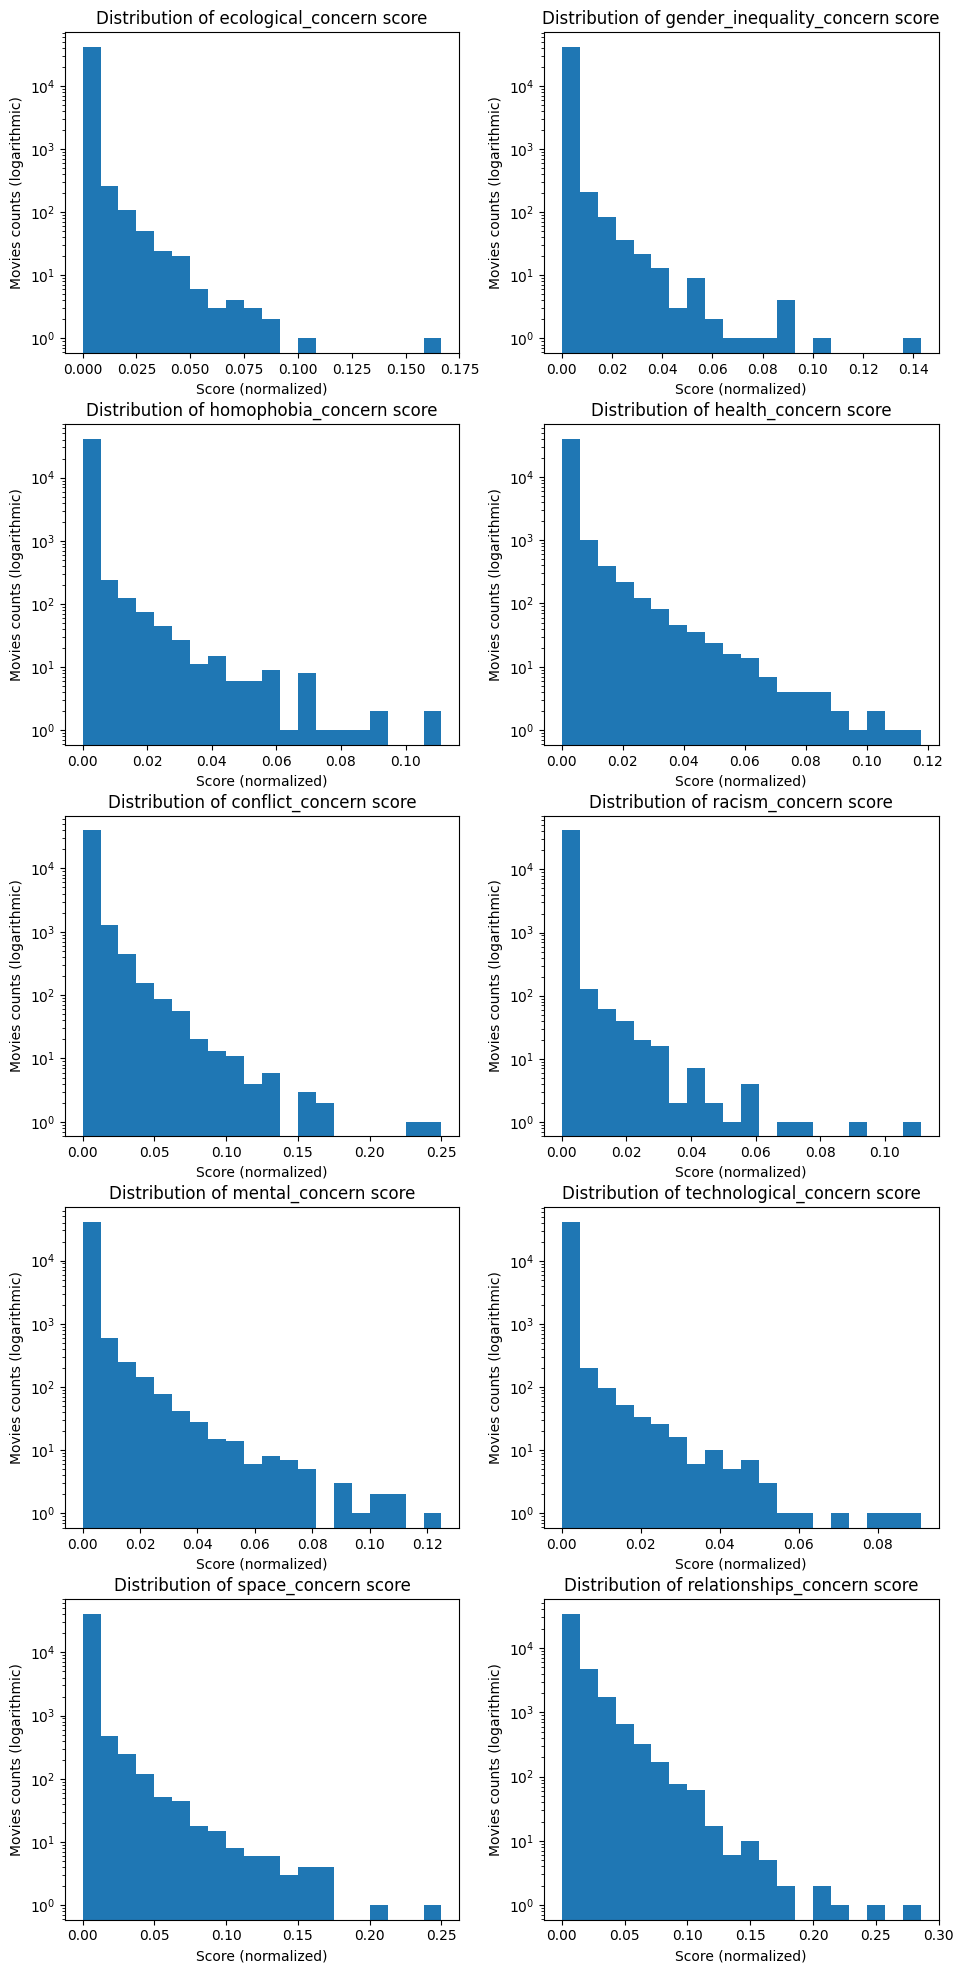

In [261]:
fig, axs = plt.subplots(5, 2, figsize=(10,20))
fig.tight_layout(pad=3)
ix, iy = 0, 0
for i, category in enumerate(categories):
    axs[i%5,i%2].hist(movies[category], log=True, bins=20)
    axs[i%5,i%2].set_title('Distribution of ' + category + ' score')
    axs[i%5,i%2].set_xlabel('Score (normalized)')
    axs[i%5,i%2].set_ylabel('Movies counts (logarithmic)')

plt.show()

## 2.2 Over time<a id='2.2'></a>

We are interested in how the concerns presence in movies evolve with time. First a visualization is done every year, then by groupping the time into periods of 5 years.

Set colors for visualizations

In [40]:
categories_color_dict={"ecological_concern":"#f94436", "health_concern":"#8c3214", "conflict_concern":"#f8d044",
                       "technological_concern":"#f28b0c", "space_concern":"#44c2f8", "gender_inequality_concern":"#6ab867",
                       "homophobia_concern":"#de489f", "racism_concern":"#489ede", "mental_concern":"#80807d",
                       "relationships_concern":"#adf763"}

Bootstrap method for confidence intervals:

In [41]:
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

### 2.2.1 Every year <a id='2.2.1'></a>

We are interested in categories evolution every year.

In [42]:
bootstrap_CIs_1year = {}

for category in categories:
    bootstrap_CIs_1year['Lower_{}'.format(category)]=[]
    bootstrap_CIs_1year['Upper_{}'.format(category)]=[]
    
for group_name, group in movies_with_year.groupby("year"):
    for category in categories:
        bootstrap_CIs_1year['Lower_{}'.format(category)].append(bootstrap_CI(group[category],1000)[0])
        bootstrap_CIs_1year['Upper_{}'.format(category)].append(bootstrap_CI(group[category],1000)[1])

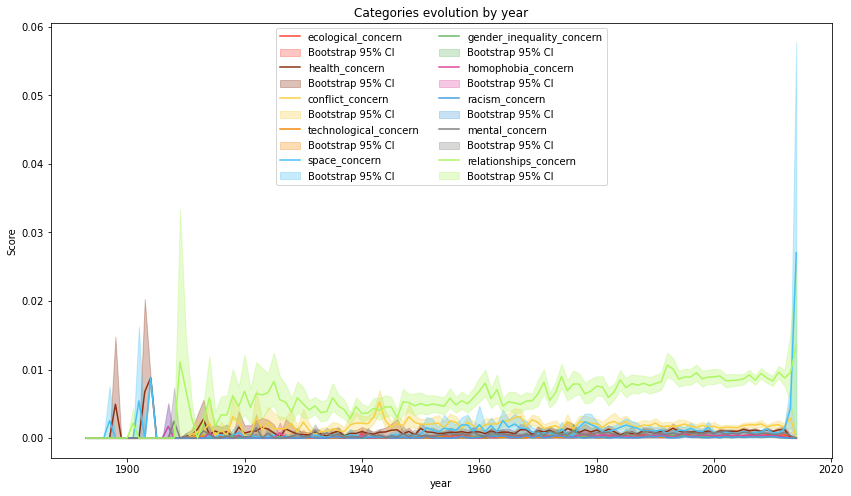

In [43]:
fig = plt.figure(figsize=(14,8))

for category in categories:
    temp = movies_with_year.groupby(["year"])[category].mean()
    fig = temp.plot(label=category, color=categories_color_dict[category])
    fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),
                           bootstrap_CIs_1year['Lower_{}'.format(category)],
                           bootstrap_CIs_1year['Upper_{}'.format(category)],
                           alpha = 0.3,
                           color=categories_color_dict[category],label='Bootstrap 95% CI')
    
fig = plt.title("Categories evolution by year")
fig = plt.ylabel('Score')
fig = plt.legend(loc='upper center', ncol=2)
fig = plt.show()

### 2.2.2 Every five years <a id='2.2.2'></a>

In [44]:
bootstrap_CIs_5year = {}

for category in categories:
    bootstrap_CIs_5year['Lower_{}'.format(category)]=[]
    bootstrap_CIs_5year['Upper_{}'.format(category)]=[]
    
for group_name, group in movies_with_year.groupby("five_year_period"):
    for category in categories:
        bootstrap_CIs_5year['Lower_{}'.format(category)].append(bootstrap_CI(group[category],1000)[0])
        bootstrap_CIs_5year['Upper_{}'.format(category)].append(bootstrap_CI(group[category],1000)[1])

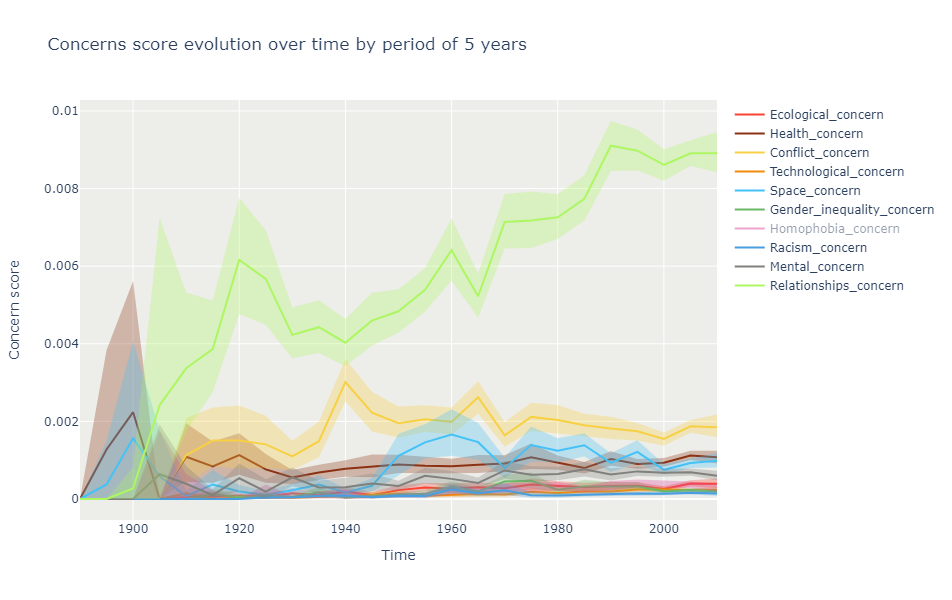

In [271]:
fig = make_subplots()
x = np.sort(movies_with_year["five_year_period"].unique()).tolist()

for category in categories:
    # Mean of category score over five year period 
    y = movies_with_year.groupby(["five_year_period"])[category].mean().values
    # Bootstrap 95% CI
    y_lower = bootstrap_CIs_5year['Lower_{}'.format(category)]
    y_upper = bootstrap_CIs_5year['Upper_{}'.format(category)]
    
    # Trace for mean score
    trace_mean_score = go.Scatter(  x=x,
                                    y=y,
                                    line=dict(color=categories_color_dict[category]),
                                    mode='lines',
                                    name=category.capitalize()
                                 )
    # Tracce for CI
    trace_CI = go.Scatter(  x=x+x[::-1], 
                            y=y_upper+y_lower[::-1], 
                            fill='toself',
                            fillcolor=categories_color_dict[category],
                            opacity=0.3,
                            line=dict(color='rgba(255,255,255,0)'),
                            hoverinfo="skip",
                            showlegend=False
                        )
    
    # Updating figure 
    fig.add_trace(trace_mean_score)
    fig.add_trace(trace_CI)

fig.update_layout(
    yaxis_title='Concern score',
    xaxis_title='Time',
    title='Concerns score evolution over time by period of 5 years',
    width=1000,
    height=600,
    plot_bgcolor="#edede9",
    hovermode="x unified"
)
fig.show()
fig.write_html("output/concern_score_time.html")

# 2.3 Main words

We want to output what words from each category are presents in the movies plot summaries.  
For this, we first assign a category to a movie based on its higher concern score.  
We then extract from the plot summaries the words matching to the main movie category, and finally concatenate those words in a single list for each category.  
A WordCloud is then used to display those words.  

In [276]:
# Giving to a movie the concern category for which it has the highest score
def find_category(row):
    unique_categ = np.nan
    best_score = 0.
    for i, categ in enumerate(categories):
        if row[i] > best_score:
            best_score = row[i]
            unique_categ = categ
    return unique_categ
movies["category"] = movies[categories].apply(lambda row: find_category(row), axis=1)

print("{:.2f} % movies have been attributed to a unique concern category".format(100*(~movies["category"].isnull()).sum()/len(movies)))

60.45 % movies have been attributed to a unique concern category


In [277]:
# Creating a new dataset focused on concerns categories
cat_words=movies[["WikiMovieID", "FreeMovieID", "Title", "for_Empath","category"]]
cat_words=cat_words[~cat_words.category.isnull()]

# Finding which words are common between plot summaries and concerns categories
def words_in_cat(row):
    for c in categories:
        if row[4] == c:
            return list(set(lexicon.cats[c]) & set(row[3]))
cat_words["words_cat"]=cat_words.apply(lambda row: words_in_cat(row), axis=1)
cat_words.head()

WikiMovieID FreeMovieID                    Title  \
0       975900   /m/03vyhn           Ghosts of Mars   
1      9363483  /m/0285_cd         White Of The Eye   
4      6631279   /m/0gffwj              Little city   
6     18296435  /m/04cqrs4             Aaah Belinda   
7     11250635  /m/02r52hc  The Mechanical Monsters   

                                          for_Empath               category  \
0  [Set, second, half, century, film, depicts, Ma...          space_concern   
1  [series, murders, women, throughout, Arizona, ...          space_concern   
4  [artist, works, cab, driver, side, hard, time,...  relationships_concern   
6  [Serap, actress, strong, lively, personality, ...  relationships_concern   
7  [story, starts, one, robots, flies, scientist,...     ecological_concern   

                      words_cat  
0  [planet, Mars, civilization]  
1                       [space]  
4    [relationship, friendship]  
6                      [family]  
7                  [scientists]

In [278]:
# For each category, joining every `words_cat` of the movies belonging to this category in a single list 
categ_dict = {key: [] for key in categories}
for categ in categories:
    for lw in (cat_words[cat_words.category == categ].words_cat).array:
        categ_dict[categ] += lw

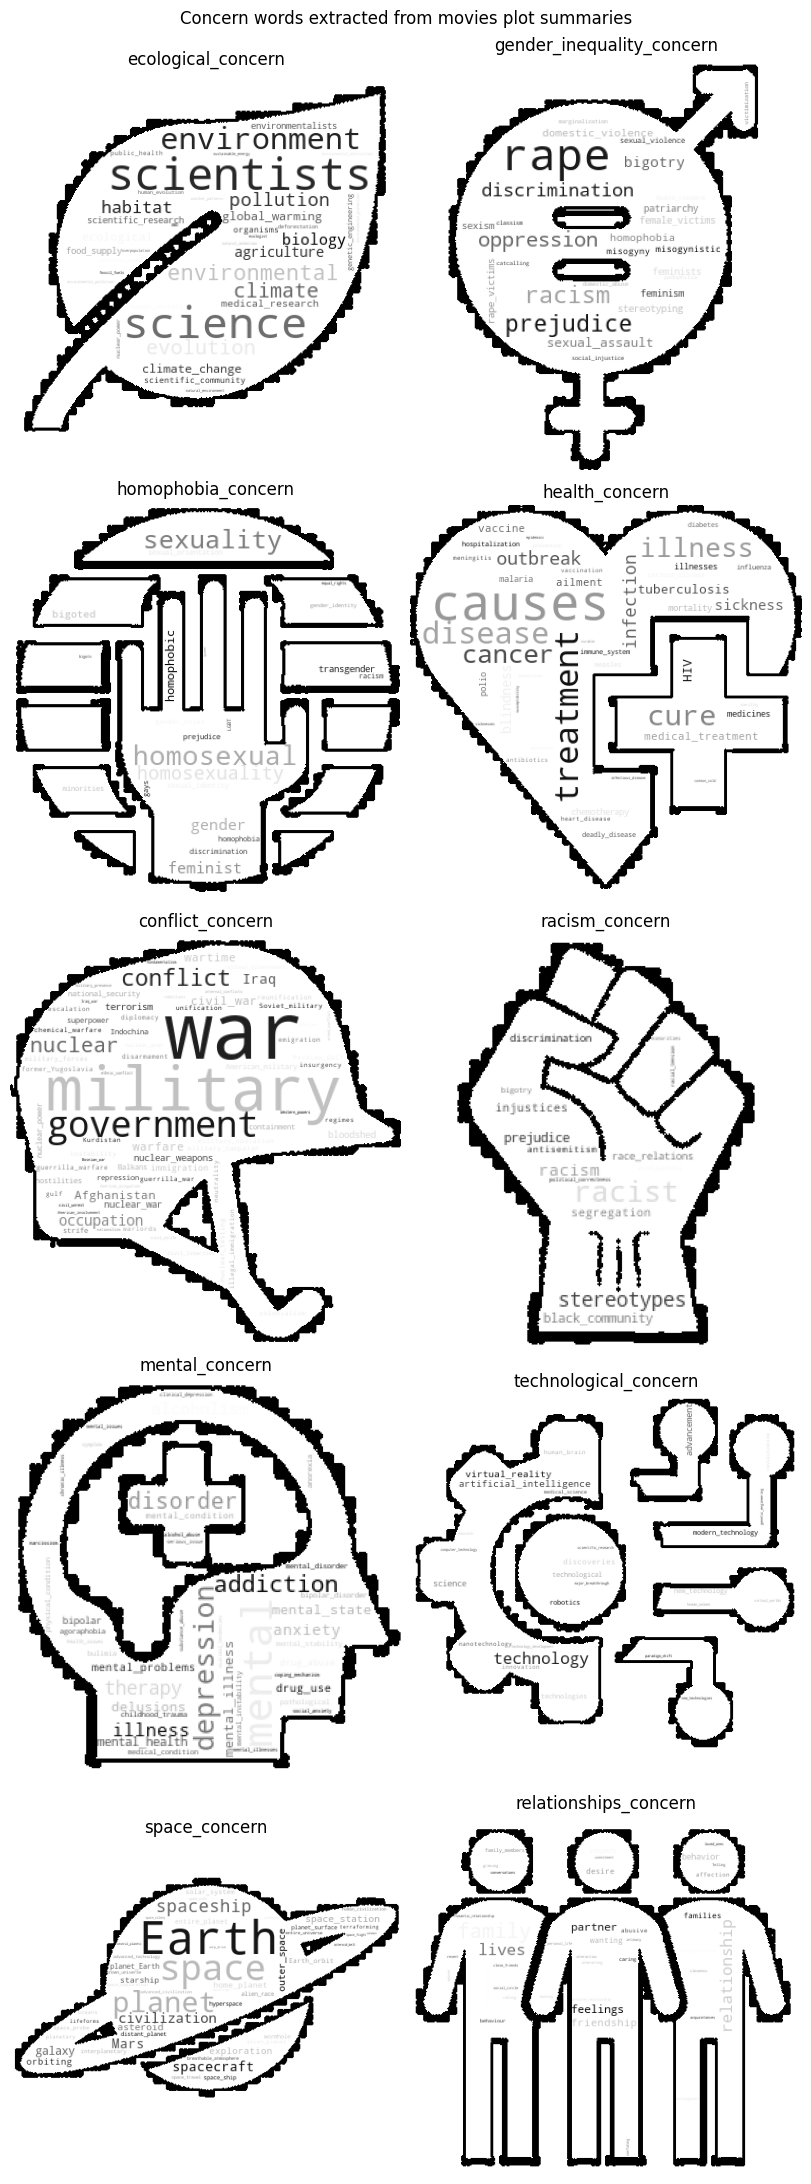

In [305]:
# WordCloud
fig, axs = plt.subplots(5, 2, figsize=(8,22), constrained_layout=True) 

# Mask images names
masks = ["ecology", "health", "war", "technology", "space", "egal", "homophobia", "racism", "mental", "relations"]

for i, c in enumerate(categories):
    # Read mask image
    mask = np.array(Image.open("data/"+masks[i]+".jpg"))

    # Create a Word Cloud image
    wc = WordCloud(background_color="white", mask=mask, collocations=False, 
                   contour_width=3, contour_color='black', colormap="binary",
                   height=400, width=400)

    # Generate a wordcloud
    wc.generate(' '.join(categ_dict[c]))

    # store to file
    wc.to_file("output/wordclouds/"+c+"_wc.png")
    
    axs[i%5, i%2].imshow(wc)
    axs[i%5, i%2].axis('off')
    axs[i%5, i%2].set_title(c)
fig.suptitle("Concern words extracted from movies plot summaries")
plt.show()

In [208]:
# Data for interactive Flourish bubble plot

# Counting each word presence and giving it a percentage
words_count = {key: [] for key in categories}
for categ in categories:
    words_count[categ] = {i:categ_dict[categ].count(i) for i in categ_dict[categ]}
for categ in categories:
    words_count[categ].update({k : 100*words_count[categ][k]/sum(words_count[categ].values()) for k in words_count[categ].keys()})
# In each category, sort words by descending percentage order
for categ in categories:
    words_count[categ] = dict(sorted(words_count[categ].items(), key=lambda item: item[1], reverse=True))

# Downloading csv for Flourish
concern_for_flourish = pd.DataFrame()
for categ in categories:
    pairs = list(words_count[categ].items())
    for entry in range(0,10):
        new_row = {'Word':pairs[entry][0], 'Word_percentage':pairs[entry][1], 'Concern': categ}
        concern_for_flourish = concern_for_flourish.append(new_row, ignore_index=True)
clear_output()

---

# 3. Sentiments <a id='3'></a>

## 3.1 The sentiments <a id='3.1'></a>

### 3.1.1 Plot sentiment analysis <a id='3.1.1'></a>

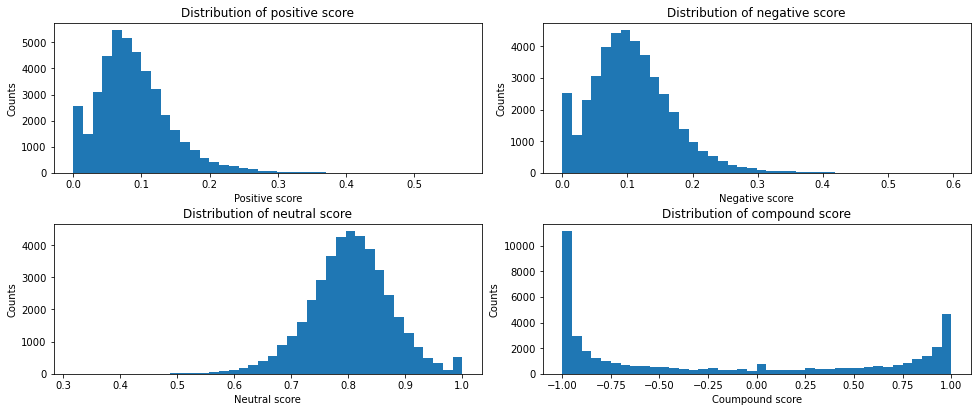

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(14,6))
fig.tight_layout(pad=3)
axs[0,0].hist(movies.positive_score,bins=40)
axs[0,0].set_title('Distribution of positive score')
axs[0,0].set_xlabel('Positive score')
axs[0,0].set_ylabel('Counts')

axs[0,1].hist(movies.negative_score,bins=40)
axs[0,1].set_title('Distribution of negative score')
axs[0,1].set_xlabel('Negative score')
axs[0,1].set_ylabel('Counts')

axs[1,0].hist(movies.neutral_score,bins=40)
axs[1,0].set_title('Distribution of neutral score')
axs[1,0].set_xlabel('Neutral score')
axs[1,0].set_ylabel('Counts')

axs[1,1].hist(movies.compound_score,bins=40)
axs[1,1].set_title('Distribution of compound score')
axs[1,1].set_xlabel('Coumpound score')
axs[1,1].set_ylabel('Counts')

plt.show()

### 3.1.2 Plot multi-sentiments <a id='3.1.2'></a>

Emotional affects measured include the following:

- fear
- anger
- anticipation
- trust
- surprise
- positive
- negative
- sadness
- disgust
- joy

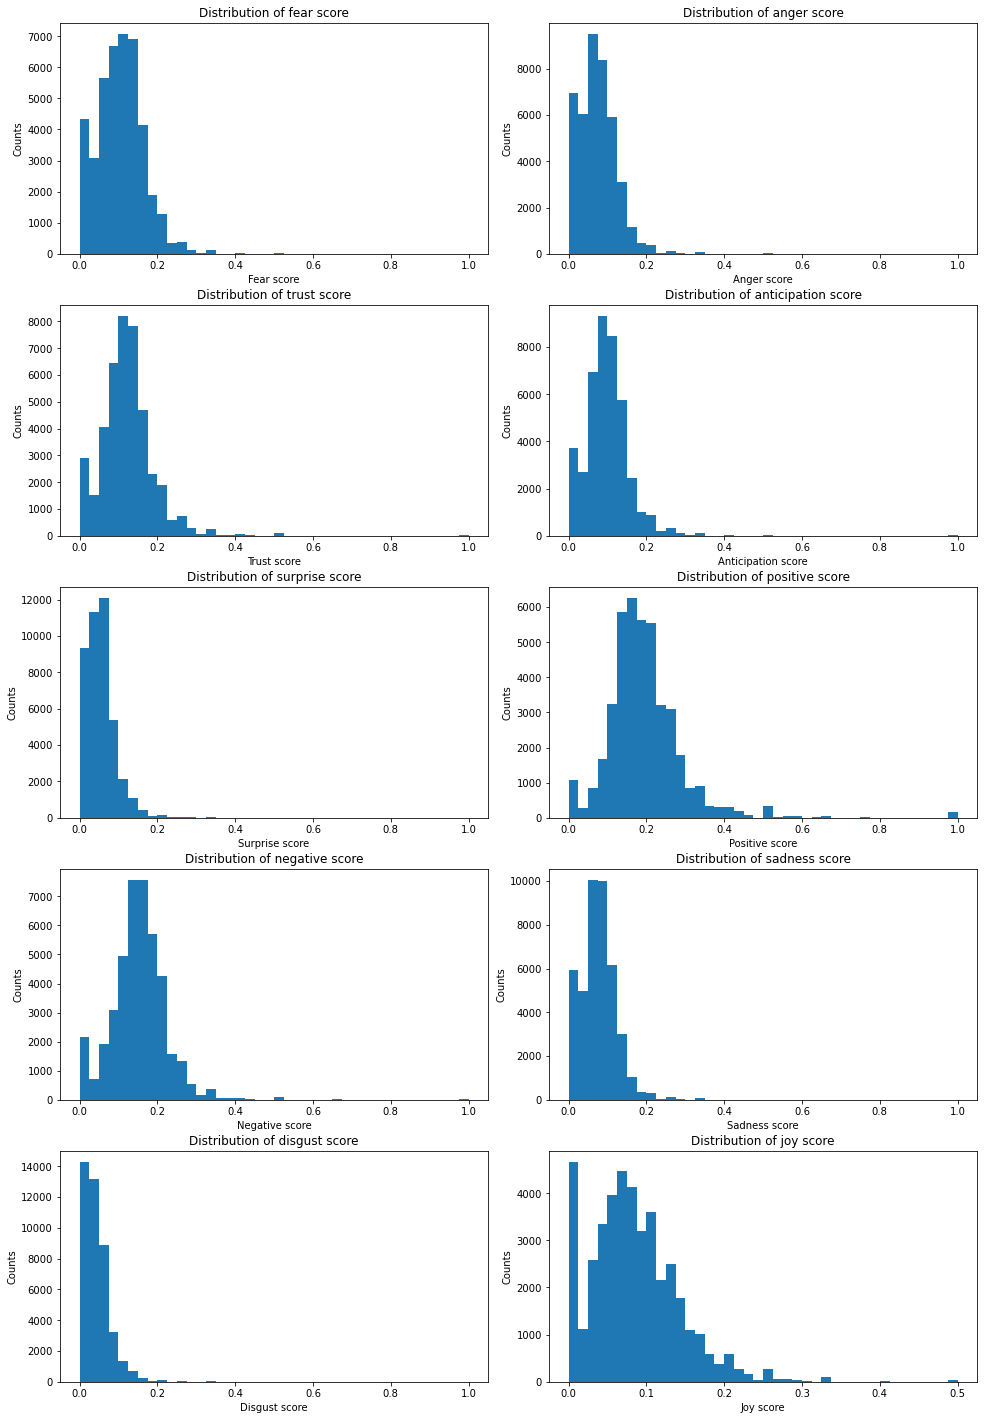

In [50]:
fig, axs = plt.subplots(5, 2, figsize=(14,20))
fig.tight_layout(pad=3)
axs[0,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['fear']),bins=40)
axs[0,0].set_title('Distribution of fear score')
axs[0,0].set_xlabel('Fear score')
axs[0,0].set_ylabel('Counts')

axs[0,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['anger']),bins=40)
axs[0,1].set_title('Distribution of anger score')
axs[0,1].set_xlabel('Anger score')
axs[0,1].set_ylabel('Counts')

axs[1,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['trust']),bins=40)
axs[1,0].set_title('Distribution of trust score')
axs[1,0].set_xlabel('Trust score')
axs[1,0].set_ylabel('Counts')

axs[1,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['anticipation'] if 'anticipation' in score_dict else 0),bins=40)
axs[1,1].set_title('Distribution of anticipation score')
axs[1,1].set_xlabel('Anticipation score')
axs[1,1].set_ylabel('Counts')

axs[2,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['surprise']),bins=40)
axs[2,0].set_title('Distribution of surprise score')
axs[2,0].set_xlabel('Surprise score')
axs[2,0].set_ylabel('Counts')

axs[2,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['positive']),bins=40)
axs[2,1].set_title('Distribution of positive score')
axs[2,1].set_xlabel('Positive score')
axs[2,1].set_ylabel('Counts')

axs[3,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['negative']),bins=40)
axs[3,0].set_title('Distribution of negative score')
axs[3,0].set_xlabel('Negative score')
axs[3,0].set_ylabel('Counts')

axs[3,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['sadness']),bins=40)
axs[3,1].set_title('Distribution of sadness score')
axs[3,1].set_xlabel('Sadness score')
axs[3,1].set_ylabel('Counts')

axs[4,0].hist(movies.multi_scores.apply(lambda score_dict: score_dict['disgust']),bins=40)
axs[4,0].set_title('Distribution of disgust score')
axs[4,0].set_xlabel('Disgust score')
axs[4,0].set_ylabel('Counts')

axs[4,1].hist(movies.multi_scores.apply(lambda score_dict: score_dict['joy']),bins=40)
axs[4,1].set_title('Distribution of joy score')
axs[4,1].set_xlabel('Joy score')
axs[4,1].set_ylabel('Counts')


plt.show()

## 2.2 Sentiments over time <a id='2.2'></a>

In [51]:
movies.head()

WikiMovieID FreeMovieID                      Title ReleaseDate     Revenue  \
0       975900   /m/03vyhn             Ghosts of Mars  2001-08-24  14010832.0   
1      9363483  /m/0285_cd           White Of The Eye        1987         NaN   
2       261236   /m/01mrr1          A Woman in Flames        1983         NaN   
3     18998739  /m/04jcqvw  The Sorcerer's Apprentice        2002         NaN   
4      6631279   /m/0gffwj                Little city  1997-04-04         NaN   

   Runtime           Languages                   Countries  \
0     98.0  [English Language]  [United States of America]   
1    110.0  [English Language]            [United Kingdom]   
2    106.0   [German Language]                   [Germany]   
3     86.0  [English Language]              [South Africa]   
4     93.0  [English Language]  [United States of America]   

                                              Genres  \
0  [Thriller, Science Fiction, Horror, Adventure,...   
1  [Thriller, Erotic thriller, Psychological thri...   
2                                            [Drama]   
3    [Family Film, Fantasy, Adventure, World cinema]   
4  [Romantic comedy, Ensemble Film, Comedy-drama,...   

                                                Plot  ... conflict_concern  \
0  Set in the second half of the 22nd century, th...  ...         0.004484   
1  A series of murders of rich young women throug...  ...         0.000000   
2  Eva, an upper class housewife, becomes frustra...  ...         0.000000   
3  Every hundred years, the evil Morgana  returns...  ...         0.000000   
4  Adam, a San Francisco-based artist who works a...  ...         0.000000   

  technological_concern space_concern gender_inequality_concern  \
0                   0.0      0.013453                       0.0   
1                   0.0      0.003257                       0.0   
2                   0.0      0.000000                       0.0   
3                   0.0      0.000000                       0.0   
4                   0.0      0.000000                       0.0   

  homophobia_concern racism_concern mental_concern relationships_concern  \
0                0.0            0.0            0.0              0.004484   
1                0.0            0.0            0.0              0.003257   
2                0.0            0.0            0.0              0.000000   
3                0.0            0.0            0.0              0.000000   
4                0.0            0.0            0.0              0.030928   

     year  five_year_period  
0  2001.0            2000.0  
1  1987.0            1985.0  
2  1983.0            1980.0  
3  2002.0            2000.0  
4  1997.0            1995.0  

[5 rows x 62 columns]

In [52]:
movies_with_year['positive_score'].isna().sum()

0

In [53]:
bootstrap_CIs_1year = {}
sentiments_SA = ['positive', 'negative', 'neutral', 'compound']
multi_sentiments=['fear','anger','trust','surprise','sadness','disgust','joy','anticipation']

for key in sentiments_SA:
    bootstrap_CIs_1year['Lower_{}'.format(key)]=[]
    bootstrap_CIs_1year['Upper_{}'.format(key)]=[]
for key in multi_sentiments:
    bootstrap_CIs_1year['Lower_{}'.format(key)]=[]
    bootstrap_CIs_1year['Upper_{}'.format(key)]=[]
    
for group_name, group in movies_with_year.groupby(["year"]):
    for key in sentiments_SA:
        bootstrap_CIs_1year['Lower_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[0])
        bootstrap_CIs_1year['Upper_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[1])
    for key_ in multi_sentiments:
        bootstrap_CIs_1year['Lower_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[0])
        bootstrap_CIs_1year['Upper_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[1])


In [43]:
bootstrap_CIs_1year['Lower_positive'][:10]

[0.0,
 0.113,
 0.005666666666666667,
 0.007,
 0.01225,
 0.009992857142857144,
 0.021,
 0.042333333333333334,
 0.06,
 0.0]

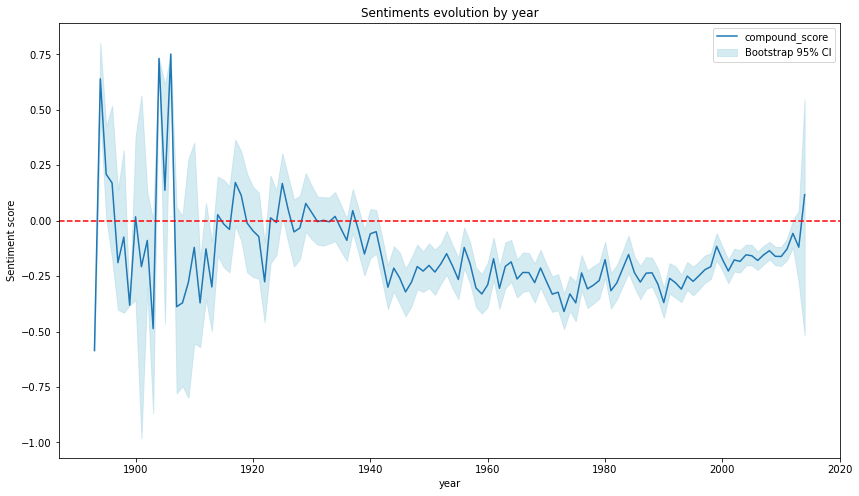

In [54]:
# PLot of SA over time (years)

fig = plt.figure(figsize=(14,8))
#Means
temp = movies_with_year.groupby(["year"])['compound_score'].mean()
fig = temp.plot()
fig = plt.axhline(y=0,color='red',linestyle='--')

#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_compound'],bootstrap_CIs_1year['Upper_compound'], alpha = 0.5, color = 'lightblue', label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

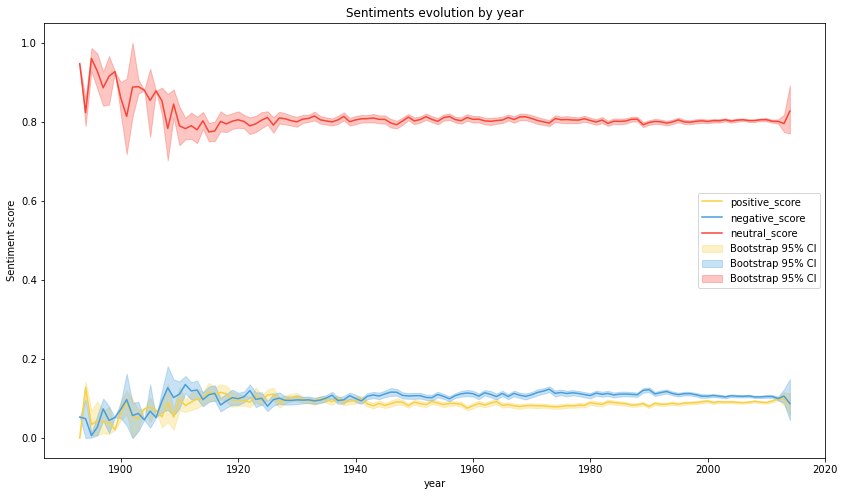

In [55]:
# PLot of SA over time (years)

fig = plt.figure(figsize=(14,8))
#Mans
temp = movies_with_year.groupby(["year"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["year"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
temp = movies_with_year.groupby(["year"])['neutral_score'].mean()
fig = temp.plot(color='#f94436')


#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_positive'],bootstrap_CIs_1year['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_negative'],bootstrap_CIs_1year['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_neutral'],bootstrap_CIs_1year['Upper_neutral'], alpha = 0.3, color = '#f94436',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

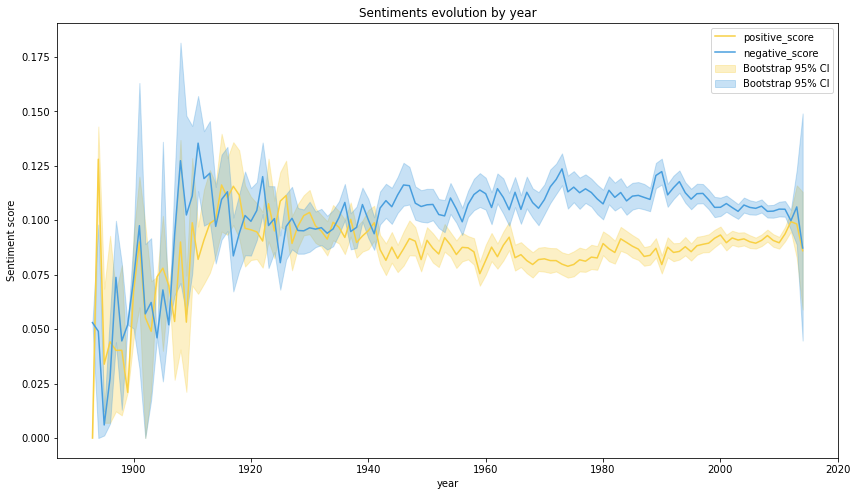

In [56]:
# PLot of SA over time (years)

fig = plt.figure(figsize=(14,8))
temp = movies_with_year.groupby(["year"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["year"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_positive'],bootstrap_CIs_1year['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_negative'],bootstrap_CIs_1year['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

In [57]:
#movies_with_year.groupby(["year"]).indices #returns a dict of the indices for each year

In [58]:
multi_sentiments_color_dict={'fear':'#f94436','anger':'#8c3214','trust':'#f8d044','surprise':'#f28b0c',
                             'sadness':'#44c2f8','disgust':'#6ab867','joy':'#de489f','anticipation':'#489ede'}

multi_sentiments_color_dict['fear']

'#f94436'

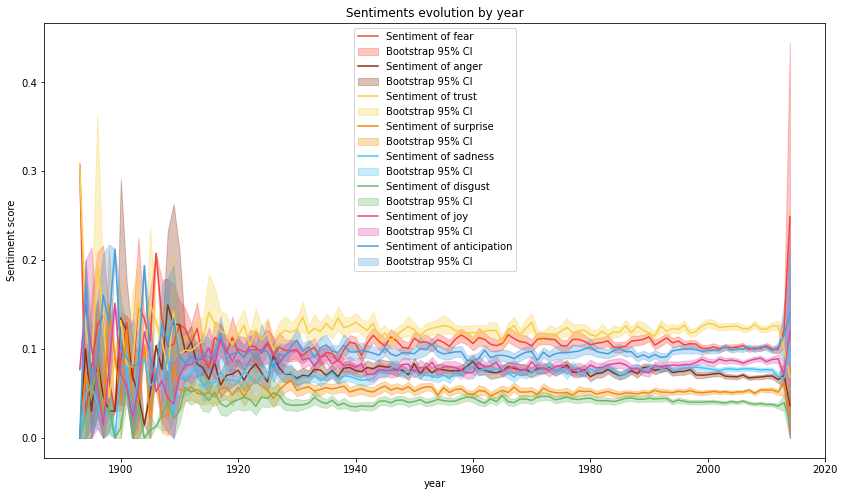

In [59]:
# PLot of multi SA over time (years)
multi_sentiments_color_dict={'fear':'#f94436','anger':'#8c3214','trust':'#f8d044','surprise':'#f28b0c',
                             'sadness':'#44c2f8','disgust':'#6ab867','joy':'#de489f','anticipation':'#489ede'}
fig = plt.figure(figsize=(14,8))

for key in multi_sentiments:
    temp = movies_with_year.groupby(["year"])['multi_{}'.format(key)].mean()
    fig = temp.plot(label='Sentiment of {}'.format(key), color=multi_sentiments_color_dict['{}'.format(key)])
    fig = plt.fill_between(np.sort(movies_with_year["year"].unique()),bootstrap_CIs_1year['Lower_{}'.format(key)],bootstrap_CIs_1year['Upper_{}'.format(key)], alpha = 0.3, color=multi_sentiments_color_dict['{}'.format(key)],label='Bootstrap 95% CI')
    

fig = plt.title("Sentiments evolution by year")
fig = plt.ylabel('Sentiment score')
fig = plt.legend(loc='upper center')
fig = plt.show()

In [60]:
bootstrap_CIs_5years = {}

for key in sentiments_SA:
    bootstrap_CIs_5years['Lower_{}'.format(key)]=[]
    bootstrap_CIs_5years['Upper_{}'.format(key)]=[]
for key in multi_sentiments:
    bootstrap_CIs_5years['Lower_{}'.format(key)]=[]
    bootstrap_CIs_5years['Upper_{}'.format(key)]=[]
    
for group_name, group in movies_with_year.groupby(["five_year_period"]):
    for key in sentiments_SA:
        bootstrap_CIs_5years['Lower_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[0])
        bootstrap_CIs_5years['Upper_{}'.format(key)].append(bootstrap_CI(group['{}_score'.format(key)],1000)[1])
    for key_ in multi_sentiments:
        bootstrap_CIs_5years['Lower_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[0])
        bootstrap_CIs_5years['Upper_{}'.format(key_)].append(bootstrap_CI(group['multi_{}'.format(key_)],1000)[1])



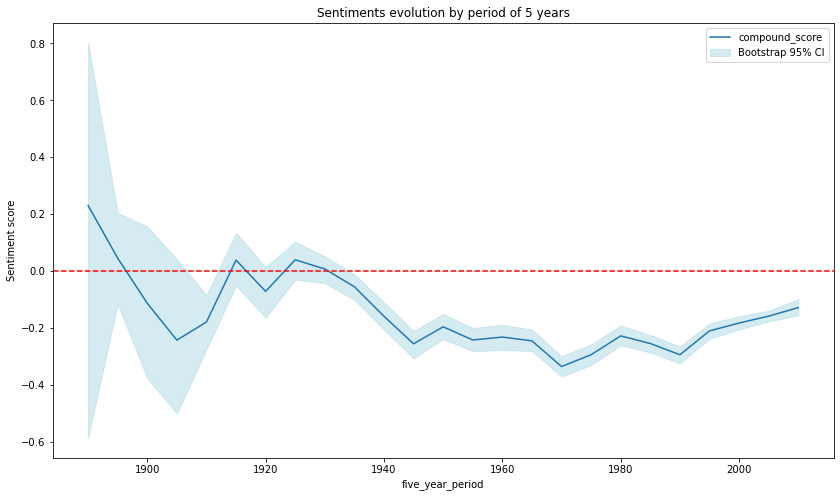

In [61]:
# PLot of SA over time (5years)

fig = plt.figure(figsize=(14,8))
#Means
temp = movies_with_year.groupby(["five_year_period"])['compound_score'].mean()
fig = temp.plot()
fig = plt.axhline(y=0,color='red',linestyle='--')

#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_compound'],bootstrap_CIs_5years['Upper_compound'], alpha = 0.5, color = 'lightblue',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

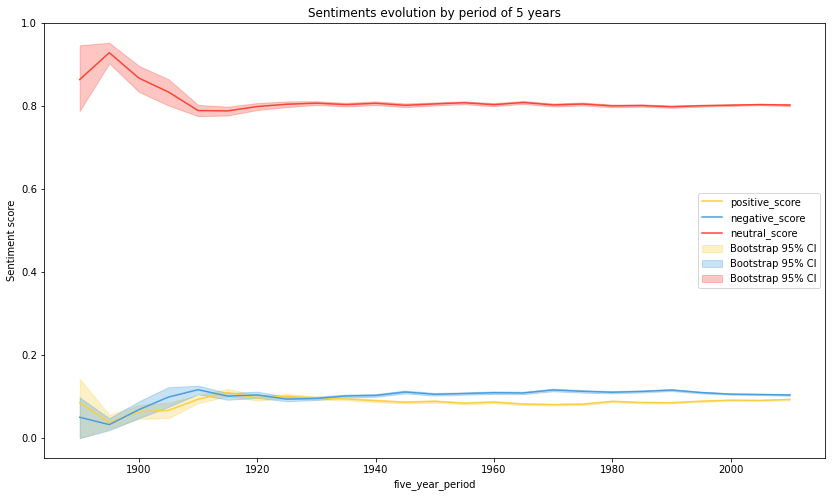

In [62]:
# PLot of SA over time (5years)

fig = plt.figure(figsize=(14,8))
#Mans
temp = movies_with_year.groupby(["five_year_period"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["five_year_period"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
temp = movies_with_year.groupby(["five_year_period"])['neutral_score'].mean()
fig = temp.plot(color='#f94436')


#Boostrap CIs for the mean scores
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_positive'],bootstrap_CIs_5years['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_negative'],bootstrap_CIs_5years['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_neutral'],bootstrap_CIs_5years['Upper_neutral'], alpha = 0.3, color = '#f94436',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

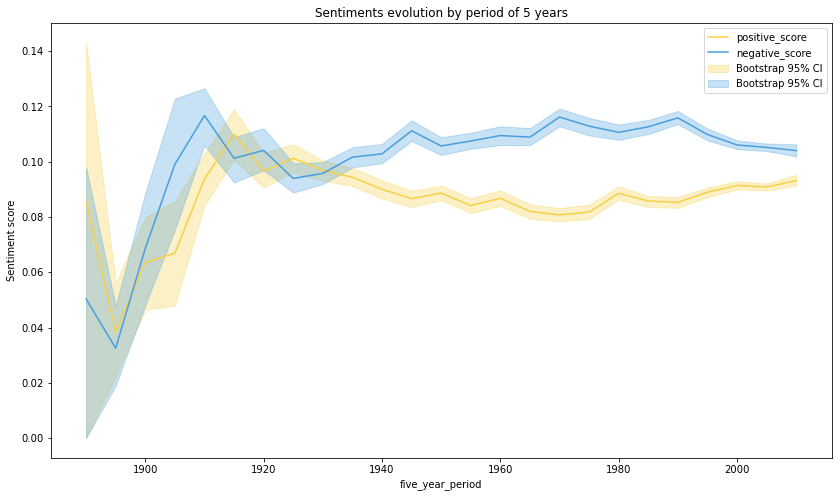

In [63]:
# PLot of SA over time (5years)

fig = plt.figure(figsize=(14,8))
temp = movies_with_year.groupby(["five_year_period"])['positive_score'].mean()
fig = temp.plot(color='#f8d044')
temp = movies_with_year.groupby(["five_year_period"])['negative_score'].mean()
fig = temp.plot(color='#489ede')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_positive'],bootstrap_CIs_5years['Upper_positive'], alpha = 0.3, color = '#f8d044',label='Bootstrap 95% CI')
fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_negative'],bootstrap_CIs_5years['Upper_negative'], alpha = 0.3, color = '#489ede',label='Bootstrap 95% CI')

fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend()
fig = plt.show()

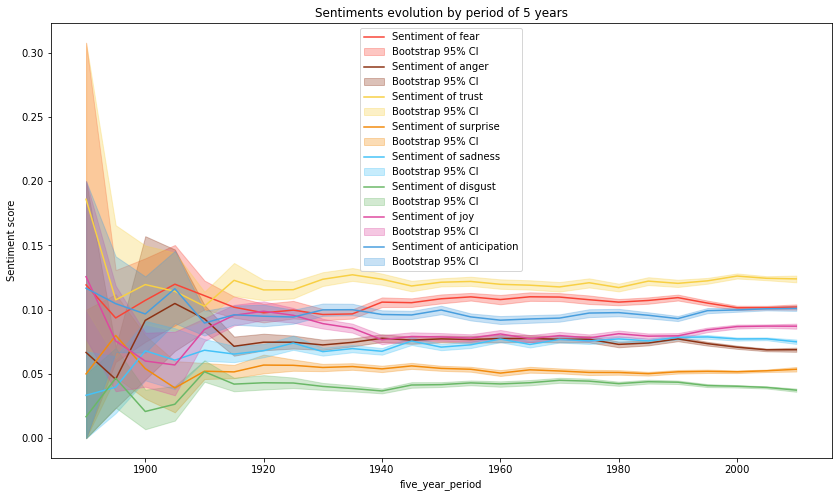

In [64]:
# PLot of multi SA over time (years)
fig = plt.figure(figsize=(14,8))

for key in multi_sentiments:
    temp = movies_with_year.groupby(["five_year_period"])['multi_{}'.format(key)].mean()
    fig = temp.plot(label='Sentiment of {}'.format(key), color=multi_sentiments_color_dict['{}'.format(key)])
    fig = plt.fill_between(np.sort(movies_with_year["five_year_period"].unique()),bootstrap_CIs_5years['Lower_{}'.format(key)],bootstrap_CIs_5years['Upper_{}'.format(key)], alpha = 0.3, color=multi_sentiments_color_dict['{}'.format(key)],label='Bootstrap 95% CI')
    

fig = plt.title("Sentiments evolution by period of 5 years")
fig = plt.ylabel('Sentiment score')
fig = plt.legend(loc='upper center')
fig = plt.show()

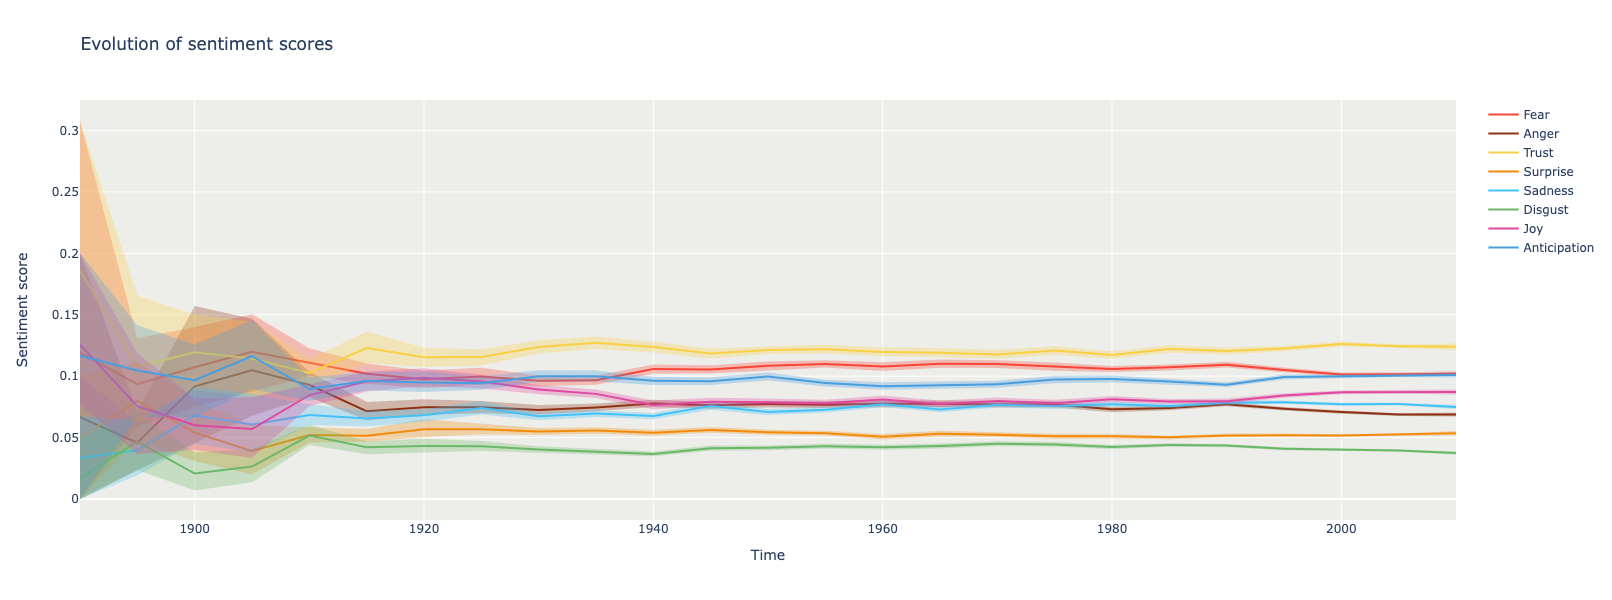

In [160]:
fig = make_subplots()
x = np.sort(movies_with_year["five_year_period"].unique()).tolist()

for key in multi_sentiments:
    # Mean of sentiment score over five year period -> sentiment according to "key"
    y = movies_with_year.groupby(["five_year_period"])['multi_{}'.format(key)].mean().values
    # Bootstrap 95% CI
    y_lower = bootstrap_CIs_5years['Lower_{}'.format(key)]
    y_upper = bootstrap_CIs_5years['Upper_{}'.format(key)]
    
    # Trace for mean score
    trace_mean_score = go.Scatter(  x=x,
                                    y=y,
                                    line=dict(color=multi_sentiments_color_dict[key]),
                                    mode='lines',
                                    name=key.capitalize()
                                 )
    # Tracce for CI
    trace_CI = go.Scatter(  x=x+x[::-1], 
                            y=y_upper+y_lower[::-1], 
                            fill='toself',
                            fillcolor=multi_sentiments_color_dict[key],
                            opacity=0.3,
                            line=dict(color='rgba(255,255,255,0)'),
                            hoverinfo="skip",
                            showlegend=False
                        )
    
    # Updating figure 
    fig.add_trace(trace_mean_score)
    fig.add_trace(trace_CI)

fig.update_layout(
    yaxis_title='Sentiment score',
    xaxis_title='Time',
    title='Evolution of sentiment scores',
    width=900,
    height=600,
    plot_bgcolor="#edede9",
    hovermode="x unified"
)
fig.show()
fig.write_html("output/sentiment_scores_time.html")

---

# 4. Combined <a id='4'></a>

## 4.1 Topics and sentiments <a id='4.1'></a>

### 4.1.1 Topics and sentiments association

To visualize the association of sentiments with each Bert topics (19 most frequent topics from all Bert topics), we use radar plot representations from the `plotly.graph_objects` library. First with neutral, positive and negative scores, then only with positive and negative scores and finally with all multi sentiment scores. 

In [58]:
#Compute the mean sentiment scores for each topic
temp = pd.DataFrame(columns = ['positive', 'negative', 'neutral', 'fear', 'anger', 'anticip', 'trust', 'surprise','positive_multi',
                               'negative_multi','sadness','disgust','joy','anticipation'], 
                   index = topics_BERT_20)
for topic in topics_BERT_20:
    #SA
    temp.at[topic,'positive'] = np.mean(movies[movies['BERT']==topic].positive_score)
    temp.at[topic,'negative'] = np.mean(movies[movies['BERT']==topic].negative_score)
    temp.at[topic,'neutral'] = np.mean(movies[movies['BERT']==topic].neutral_score)
    
    #Multi SA
    temp.at[topic,'fear'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['fear']))
    temp.at[topic,'anticip'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['anticip']))
    temp.at[topic,'trust'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['trust']))
    temp.at[topic,'surprise'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['surprise']))
    temp.at[topic,'positive_multi'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['positive']))
    temp.at[topic,'negative_multi'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['negative']))
    temp.at[topic,'sadness'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['sadness']))
    temp.at[topic,'disgust'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['disgust']))
    temp.at[topic,'joy'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['joy']))
    temp.at[topic,'anticipation'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['anticipation'] 
                                                                                             if 'anticipation' in score_dict else 0))
    temp.at[topic,'anger'] = np.mean(movies[movies['BERT']==topic].multi_scores.apply(lambda score_dict: score_dict['anger']))
    

In [62]:
#Radar plot of BERT topics for neutral, negative and positive

theta_ = bert_topics.iloc[np.array(topics_BERT_20)+1]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.neutral,
        theta=theta_,
        fill='toself',
        name='Neutral sentiment',
        line_color = '#f94436'
))

fig.add_trace(go.Scatterpolar(
        r=temp.negative,
        theta=theta_,
        #mode = 'lines',
        fill='toself',
        name='Negative Sentiment',
        line_color = '#489ede'
))
fig.add_trace(go.Scatterpolar(
        r=temp.positive,
        theta=theta_,
        fill='toself',
        name='Positive sentiment',
        line_color = '#f8d044'
))



fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,    
  plot_bgcolor="#edede9",
)

fig.show(renderer='iframe')
fig.write_html("output/radar_chart_trisentiment_BERT.html")

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [63]:
#Radar plot of BERT topics for only negative and positive

theta_ = bert_topics.iloc[np.array(topics_BERT_20)+1]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.negative,
        theta=theta_,
        #mode = 'lines',
        fill='toself',
        name='Negative Sentiment',
        line_color = '#489ede'
))
fig.add_trace(go.Scatterpolar(
        r=temp.positive,
        theta=theta_,
        fill='toself',
        name='Positive sentiment',
        line_color = '#f8d044'
))



fig.update_layout(
  plot_bgcolor="#edede9",
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show(renderer='iframe')
fig.write_html("output/radar_chart_bisentiment_BERT.html")

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [64]:
#Radar plot of BERT topics for multi SA

theta_ = bert_topics.iloc[np.array(topics_BERT_20)+1] 

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.trust,
        theta=theta_,
        fill='toself',
        name='Trust sentiment',
        line_color = '#f8d044'
))
fig.add_trace(go.Scatterpolar(
        r=temp.fear,
        theta=theta_,
        fill='toself',
        name='Fear sentiment',
        line_color = '#f94436'
))
fig.add_trace(go.Scatterpolar(
        r=temp.anticipation,
        theta=theta_,
        fill='toself',
        name='Anticipation sentiment',
        line_color = '#489ede'
))
#fig.add_trace(go.Scatterpolar(
 #       r=temp.positive_multi,
  #      theta=theta_,
   #     fill='toself',
    #    name='Positive sentiment',
     #   line_color = '#f8d044'
#))
#fig.add_trace(go.Scatterpolar(
 #       r=temp.negative_multi,
  #      theta=theta_,
   #     fill='toself',
    #    name='Negative sentiment',
      #  line_color = '#a39d99'
#))
fig.add_trace(go.Scatterpolar(
        r=temp.joy,
        theta=theta_,
        fill='toself',
        name='Joy sentiment',
        line_color = '#de489f'
))
fig.add_trace(go.Scatterpolar(
        r=temp.anger,
        theta=theta_,
        fill='toself',
        name='Anger sentiment',
        line_color = '#8c3214'
))
fig.add_trace(go.Scatterpolar(
        r=temp.sadness,
        theta=theta_,
        fill='toself',
        name='Sadness sentiment',
        line_color = '#44c2f8'
))
fig.add_trace(go.Scatterpolar(
        r=temp.surprise,
        theta=theta_,
        fill='toself',
        name='Surprise sentiment',
        line_color = '#f28b0c'
))
fig.add_trace(go.Scatterpolar(
        r=temp.disgust,
        theta=theta_,
        fill='toself',
        name='Disgust sentiment',
        line_color = '#6ab867'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show(renderer='iframe')
fig.write_html("output/radar_chart_multisentiment_BERT.html")

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### 4.1.2 Topics and sentiments over time

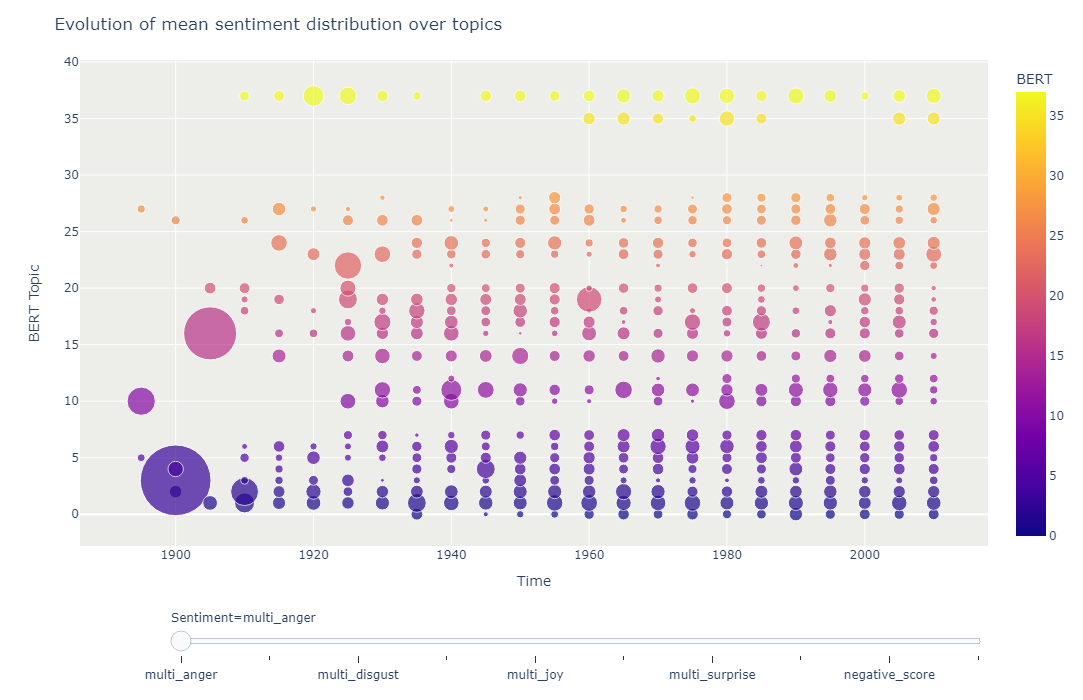

In [161]:
# Sentiments we have investigated
sentiments = ["positive_score", "negative_score", "multi_fear", "multi_anger", "multi_trust", "multi_surprise", "multi_sadness", "multi_disgust", "multi_joy", "multi_anticipation"]

# 
movies_reduced = BERT_movies_with_year[["five_year_period", "BERT"] + sentiments]

sentiments_df = pd.DataFrame()

# Reversing one hot encoding : We do this in order to be able to plot the interactive graph
## In this procedure we dont care about quality (what sentiment score each movie got) but quantity (average scores over years and topics)
## In the initial dataset "movies_reduced" we have 1 row per movie and 1 column for each sentiment. At the end of this loop we will create
## 10 rows for each movie (1 row per sentiment) where each row will have 1 column displaying the name of the sentiment, 1 for the score,
## and 1 for the relative score. Additionally, it will have 2 columns specifying the five_year_period and the BERT topic attributed to the movie.

for sentiment in sentiments:
    temp = movies_reduced[["five_year_period", "BERT"]].copy()
    temp["Sentiment"]= sentiment
    temp["Sentiment_score"]=movies_reduced[sentiment]
    sentiments_df = pd.concat([sentiments_df, temp])

# Getting the mean sentiment score for each five_year_period for each BERT topic
sentiments_df = sentiments_df.groupby(by=["Sentiment", "five_year_period", "BERT"]).mean()


# Putting the indexes into columns
sentiments_df = sentiments_df.reset_index(level=[0,1,2])



# Realtive sentiment score : Our sentiment scores are currently in the set [0,1]. We apply the following transformation to 
# each score f(x)= (100*x)^2 to emphasize on difference so it can be better displayed in the graph.
sentiments_df["Relative_sentiment_score"] = (sentiments_df["Sentiment_score"]*100)**2


fig = px.scatter(sentiments_df, x="five_year_period", y="BERT", animation_frame="Sentiment", 
           size="Relative_sentiment_score", color="BERT", hover_name="BERT", size_max=50, opacity = 0.7)


fig.update_layout( width = 900,
                   height = 700,
                   title_text = "Evolution of mean sentiment distribution over topics",
                   yaxis_title = "BERT Topic",
                   xaxis_title = "Time",
                   plot_bgcolor="#edede9"
                 )


fig["layout"].pop("updatemenus") # drop animation buttons -> no additional information
fig.show()
fig.write_html("output/bert_topics_time_sentiment.html")

## 4.2 Topics and concerns

In [65]:
#Compute the mean concern score for each topic
temp = pd.DataFrame(columns = ['ecological_concern', 'health_concern', 'conflict_concern', 'technological_concern', 'space_concern',
                               'gender_inequality_concern', 'homophobia_concern', 'racism_concern', 'mental_concern', 'relationships_concern'], 
                   index = topics_BERT_20)

for topic in topics_BERT_20:
    #Concerns
    temp.at[topic,'ecological_concern'] = np.mean(movies[movies['BERT']==topic].ecological_concern)
    temp.at[topic,'health_concern'] = np.mean(movies[movies['BERT']==topic].health_concern)
    temp.at[topic,'conflict_concern'] = np.mean(movies[movies['BERT']==topic].conflict_concern)
    temp.at[topic,'technological_concern'] = np.mean(movies[movies['BERT']==topic].technological_concern)
    temp.at[topic,'space_concern'] = np.mean(movies[movies['BERT']==topic].space_concern)
    temp.at[topic,'gender_inequality_concern'] = np.mean(movies[movies['BERT']==topic].gender_inequality_concern)
    temp.at[topic,'homophobia_concern'] = np.mean(movies[movies['BERT']==topic].homophobia_concern)
    temp.at[topic,'racism_concern'] = np.mean(movies[movies['BERT']==topic].racism_concern)
    temp.at[topic,'mental_concern'] = np.mean(movies[movies['BERT']==topic].mental_concern)
    temp.at[topic,'relationships_concern'] = np.mean(movies[movies['BERT']==topic].relationships_concern)                                             

In [66]:
#Radar plot of BERT topics for concerns

theta_ = bert_topics.iloc[np.array(topics_BERT_20)+1] 

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=temp.relationships_concern,
        theta=theta_,
        fill='toself',
        name='Relationships concern',
        line_color = '#f5abd5'
))
fig.add_trace(go.Scatterpolar(
        r=temp.conflict_concern,
        theta=theta_,
        fill='toself',
        name='Conflict_concern',
        line_color = '#f94436'
))
fig.add_trace(go.Scatterpolar(
        r=temp.space_concern,
        theta=theta_,
        fill='toself',
        name='Space concern',
        line_color = '#102a91'
))
fig.add_trace(go.Scatterpolar(
        r=temp.health_concern,
        theta=theta_,
        fill='toself',
        name='Health_concern',
        line_color = '#b4f78f'
))
fig.add_trace(go.Scatterpolar(
        r=temp.mental_concern,
        theta=theta_,
        fill='toself',
        name='Mental concern',
        line_color = '#44c2f8'
))
fig.add_trace(go.Scatterpolar(
        r=temp.ecological_concern,
        theta=theta_,
        fill='toself',
        name='Ecological concern',
        line_color = '#10800e'
))
fig.add_trace(go.Scatterpolar(
        r=temp.technological_concern,
        theta=theta_,
        fill='toself',
        name='Technological concern',
        line_color = '#de489f'
))
fig.add_trace(go.Scatterpolar(
        r=temp.gender_inequality_concern,
        theta=theta_,
        fill='toself',
        name='Gender inequality concern',
        line_color = '#8c3214'
))
fig.add_trace(go.Scatterpolar(
        r=temp.homophobia_concern,
        theta=theta_,
        fill='toself',
        name='Homophobia concern',
        line_color = '#f28b0c'
))
fig.add_trace(go.Scatterpolar(
        r=temp.racism_concern,
        theta=theta_,
        fill='toself',
        name='Racism concern',
        line_color = '#f8d044'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
)

fig.show(renderer='iframe')
fig.write_html("output/Concerns_vs_BERT.html")

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\clara\anaconda3\envs\ada\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



## 4.3 Sentiments and concerns

In this section we will look for a correlation between the sentiments and the topics. In order to do that, we will perform multiple linear regressions where each regression will have the concern as an output and as inputs all the sentiments :

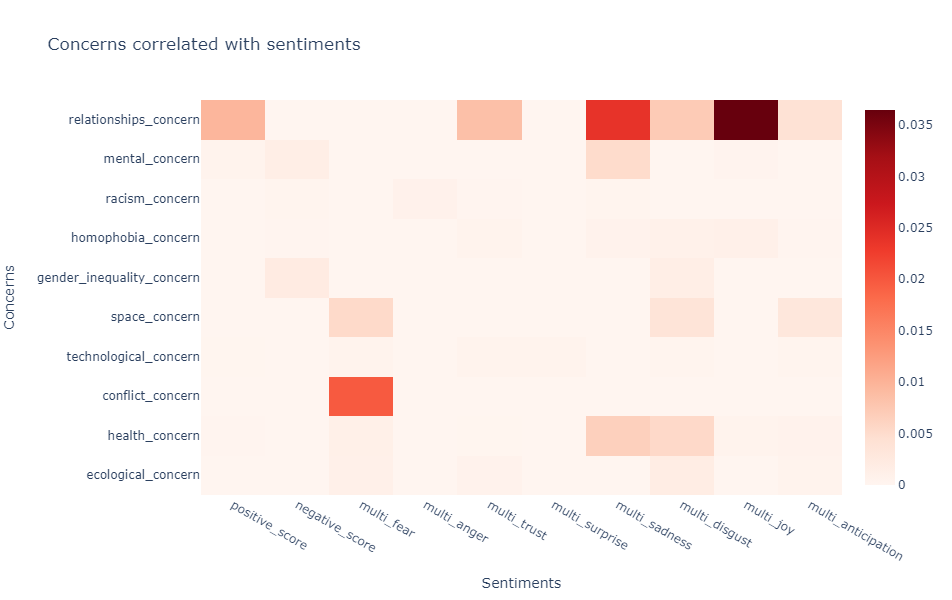

In [162]:
from sklearn.linear_model import LinearRegression
X = movies.loc[:, sentiments]
coefficients = {}

for category in categories:
    y = movies[category]
    model = LinearRegression(fit_intercept=False, positive=True).fit(X,y)
    coefficients[category] = model.coef_

plot_coefficients = [coeff for coeff in coefficients.values()]

fig = go.Figure(data=go.Heatmap(
                   z=plot_coefficients,
                   x=sentiments,
                   y=categories,
                   hoverongaps = False,
                   colorscale="Reds"))

fig.update_layout( width = 800,
                   height = 600,
                   title_text = "Concerns correlated with sentiments",
                   yaxis_title = "Concerns",
                   xaxis_title = "Sentiments",
                 )
fig.show()
fig.write_html("output/heatmap_sentiments_concerns.html")

---

# 5. Statistical analysis

In this part, we are going through all the information we obtained from the plot summaries and we explore weither there exist statistically significant differences in topics, sentiments and concerns in general and across time. Also, we analyze the associations (if existing) across sentiments, across concerns, between sentiments and topics and, between sentiments and concerns.

**General method**

In order to **analyze differences in means across various groups**, we start by checking if there is at least one mean significatively different from another one. This can be done by one-way ANOVA under certain assumptions which are the independence of the diferent groups as well as the samples within groups; the homoscedasticity meaning that the diferent groups have the same variance; and the normality, the variable studied follows a normal distribution. ANOVA is quite robust against small assumptions violations but too big assumptions violations can render ANOVA not suited for our anlysis. In this case we can use an equivalent non-parametric test, here we use Kruskal-Wallis test. Then, when we have significant evidence for at least one difference in mean, we carry out a post hoc analysis using multiple comparisons tests to see which group has a significatively different mean from which other group. After ANOVA, the multiple comparisons are made with Tukey's  HSD test or thanks to pairwise Bootstap CIs of the differences in means, adjusted for multiple comparisons. After non parametric ANOVA, we use Dunn test.

In order to analyze **linear association**, we use Pearson correlation coefficient measuring linear correlation between two sets of data and also linear regression modelling the linear relationship between two sets of data.

## 5.1 Over time

We start with the analysis of evolutions over time. In part [1.2](#1.2), we create a new feature `year` that specify the release year for each movie provided with a plot summary, also, we obtain a new dataset `movies_with_year` for all the movies with plot summaries that have a release year which represents $39564$ movies.

Below, we explore a little bit `movies_with_year`. The number of datapoints per year is increasing with the year. In order to perform the analysis over time, we choose to divide our dataset into 3 time periods based on the 1/3 and 2/3 quantiles of the fearture `year`. This allows us to compare 3 time periods: `t1` (1983 to 1977), `t2` (1978 to 2002) and, `t3` (2003 to 2014).

In [66]:
# General description of the variable year
movies_with_year['year'].describe()

count    39564.000000
mean      1983.644904
std         25.650007
min       1893.000000
25%       1966.000000
50%       1993.000000
75%       2005.000000
max       2014.000000
Name: year, dtype: float64

Text(0, 0.5, 'Count')

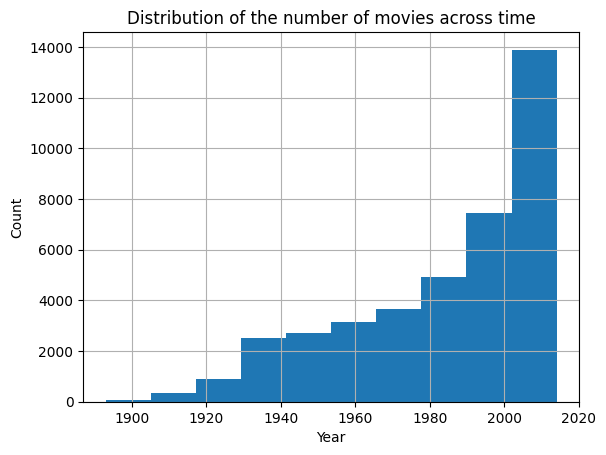

In [67]:
# Year distribution
movies_with_year['year'].hist()
plt.title("Distribution of the number of movies across time")
plt.xlabel("Year")
plt.ylabel("Count")

In [19]:
# Defining thrsholds for our 3 time periods based on quantiles
year_thresholds = np.quantile(movies_with_year['year'],[1/3,2/3])
print('We can spit the data in equals group of years by taking years until {}, after {} and between these two.'.format(year_thresholds[0],year_thresholds[1]))

We can spit the data in equals group of years by taking years until 1977.0, after 2002.0 and between these two.


In [69]:
movies_with_year["year"].unique()

array([2001., 1987., 1983., 2002., 1997., 1989., 1986., 1964., 1967.,
       2009., 2007., 1984., 2010., 1999., 1990., 1980., 2008., 2006.,
       1993., 1939., 1976., 1975., 1958., 1995., 1957., 1951., 1968.,
       1996., 2003., 2005., 2011., 1973., 1972., 1956., 1947., 1963.,
       1979., 1954., 1985., 1978., 1936., 2000., 1955., 1998., 1971.,
       1940., 1991., 1974., 1992., 1950., 1910., 1934., 1970., 2004.,
       1948., 1942., 1960., 1932., 1981., 1977., 1927., 1982., 1923.,
       1952., 1994., 1933., 1965., 1962., 1935., 1943., 1966., 1931.,
       1969., 1959., 1928., 2012., 1924., 1916., 1938., 1988., 1953.,
       1930., 1961., 1922., 1937., 1944., 1903., 1915., 1945., 1925.,
       1946., 1949., 1941., 1929., 1914., 1921., 1926., 1920., 1902.,
       1919., 2013., 1911., 1918., 1917., 1900., 1909., 1904., 1913.,
       1898., 1907., 1895., 1912., 1897., 1901., 1908., 1896., 1893.,
       2014., 1905., 1906., 1894., 1899.])

### 5.1.1 Topics over time

Here we want to analyze the evolution of each topic representation over time, namely, we investigate the differences in topic proportions across t1, t2 and t3 groups for each topic.

We first create a data set containing the proportions of topics over time (`BERT_over_time`). Then we obtain 3 datasets, one per periof of time (`BERT_t1`, `BERT_t2` and `BERT_t3`), that will reprensent our 3 groups. For each topic, we can see big variation of standard deviation across the 3 groups, so here we use Krukal-Wallis test and Dunn test for multiple comparisons.

In [100]:
# Create a new DataFrame with years as indices
BERT_over_years = pd.DataFrame(index = movies_with_year["year"].unique())
BERT_over_years.head()

Empty DataFrame
Columns: []
Index: [2001.0, 1987.0, 1983.0, 2002.0, 1997.0]

In [101]:
# Adding the count of movies per topic per year
topics=movies_with_year["BERT"].unique()

for topic in topics:
    BERT_over_years['{}'.format(topic)]= movies_with_year[movies_with_year.BERT==topic].groupby(["year"]).size()

In [102]:
BERT_over_years.head()

4     -1     7     3    2    5   34     0    12   31  ...   38  \
2001.0  16.0  658.0  20.0  11.0  3.0  9.0  4.0  10.0   7.0  NaN  ...  3.0   
1987.0   9.0  405.0   5.0   7.0  7.0  4.0  NaN   4.0   NaN  NaN  ...  1.0   
1983.0   7.0  285.0   7.0   6.0  6.0  3.0  2.0   4.0   NaN  NaN  ...  NaN   
2002.0  13.0  759.0  21.0   4.0  7.0  7.0  1.0  10.0  15.0  2.0  ...  NaN   
1997.0  11.0  542.0  15.0   8.0  4.0  8.0  NaN   8.0   3.0  1.0  ...  1.0   

         23   49   36   47   48   32    9   45   39  
2001.0  5.0  1.0  NaN  3.0  1.0  NaN  2.0  1.0  NaN  
1987.0  NaN  NaN  1.0  NaN  NaN  3.0  1.0  NaN  NaN  
1983.0  3.0  1.0  NaN  2.0  1.0  NaN  NaN  1.0  NaN  
2002.0  1.0  1.0  NaN  1.0  2.0  1.0  1.0  NaN  NaN  
1997.0  1.0  NaN  1.0  2.0  1.0  1.0  NaN  NaN  1.0  

[5 rows x 51 columns]

In [103]:
# Checks
print(len(movies_with_year[(movies_with_year.BERT==7) & (movies_with_year.year==2001.0)]))
print(len(movies_with_year[movies_with_year.BERT==7][movies_with_year.year==1983.0]))
print(len(movies_with_year[movies_with_year.BERT==0][movies_with_year.year==1997.0]))

20
7
8


/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_28485/4260642514.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_28485/4260642514.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [104]:
# Conversion to proportions
BERT_over_years = BERT_over_years.div(BERT_over_years.sum(axis=1), axis=0)
BERT_over_years.head()

4        -1         7         3         2         5        34  \
2001.0  0.019070  0.784267  0.023838  0.013111  0.003576  0.010727  0.004768   
1987.0  0.018036  0.811623  0.010020  0.014028  0.014028  0.008016       NaN   
1983.0  0.019126  0.778689  0.019126  0.016393  0.016393  0.008197  0.005464   
2002.0  0.013728  0.801478  0.022175  0.004224  0.007392  0.007392  0.001056   
1997.0  0.016492  0.812594  0.022489  0.011994  0.005997  0.011994       NaN   

               0        12        31  ...        38        23        49  \
2001.0  0.011919  0.008343       NaN  ...  0.003576  0.005959  0.001192   
1987.0  0.008016       NaN       NaN  ...  0.002004       NaN       NaN   
1983.0  0.010929       NaN       NaN  ...       NaN  0.008197  0.002732   
2002.0  0.010560  0.015839  0.002112  ...       NaN  0.001056  0.001056   
1997.0  0.011994  0.004498  0.001499  ...  0.001499  0.001499       NaN   

              36        47        48        32         9        45        39  
2001.0       NaN  0.003576  0.001192       NaN  0.002384  0.001192       NaN  
1987.0  0.002004       NaN       NaN  0.006012  0.002004       NaN       NaN  
1983.0       NaN  0.005464  0.002732       NaN       NaN  0.002732       NaN  
2002.0       NaN  0.001056  0.002112  0.001056  0.001056       NaN       NaN  
1997.0  0.001499  0.002999  0.001499  0.001499       NaN       NaN  0.001499  

[5 rows x 51 columns]

In [105]:
# Dataset with proportions of BERT topics from 1893 to 2002
t1_BERT = BERT_over_years[BERT_over_years.index <= year_thresholds[0]]
t1_BERT.describe()

4         -1          7          3          2          5  \
count  38.000000  84.000000  42.000000  47.000000  69.000000  62.000000   
mean    0.026185   0.773100   0.014286   0.015158   0.050542   0.032774   
std     0.054881   0.094038   0.007036   0.023889   0.036282   0.041460   
min     0.004149   0.500000   0.003378   0.003311   0.014634   0.008475   
25%     0.008475   0.727177   0.008530   0.006774   0.026906   0.016752   
50%     0.015102   0.758270   0.013611   0.010204   0.043478   0.025664   
75%     0.021352   0.838521   0.018800   0.016220   0.062500   0.037493   
max     0.333333   1.000000   0.029851   0.166667   0.250000   0.333333   

              34          0        12        31  ...         38         23  \
count  15.000000  28.000000  4.000000  7.000000  ...  18.000000  35.000000   
mean    0.004814   0.007655  0.003536  0.005239  ...   0.007838   0.008239   
std     0.003517   0.004655  0.000643  0.001958  ...   0.008704   0.005283   
min     0.003086   0.003086  0.003125  0.003401  ...   0.002985   0.003215   
25%     0.003345   0.003804  0.003147  0.003702  ...   0.003441   0.004237   
50%     0.003846   0.006604  0.003266  0.004950  ...   0.004488   0.006803   
75%     0.004640   0.010668  0.003655  0.006054  ...   0.008909   0.009490   
max     0.017241   0.022727  0.004484  0.008811  ...   0.040000   0.023148   

             49        36         47         48         32         9  \
count  9.000000  4.000000  14.000000  17.000000  11.000000  6.000000   
mean   0.007034  0.008750   0.007359   0.004366   0.004858  0.003994   
std    0.006660  0.007000   0.004596   0.001043   0.004156  0.000336   
min    0.002985  0.003378   0.003125   0.003155   0.002985  0.003401   
25%    0.003559  0.004503   0.004391   0.003676   0.003140  0.003889   
50%    0.003676  0.006376   0.004950   0.004329   0.003378  0.004083   
75%    0.007722  0.010622   0.008835   0.004651   0.004367  0.004189   
max    0.023810  0.018868   0.017241   0.007353   0.017241  0.004348   

             45         39  
count  4.000000  11.000000  
mean   0.007529   0.004829  
std    0.006490   0.002214  
min    0.003846   0.002985  
25%    0.004074   0.003788  
50%    0.004514   0.004405  
75%    0.007969   0.004845  
max    0.017241   0.011111  

[8 rows x 51 columns]

In [106]:
# Dataset with proportions of BERT topics from 1978 to 2002
t2_BERT = BERT_over_years[(BERT_over_years.index > year_thresholds[0]) & (BERT_over_years.index <= year_thresholds[1])]
t2_BERT.describe()

4         -1          7          3          2          5  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  24.000000   
mean    0.020366   0.780480   0.017047   0.012010   0.011876   0.009977   
std     0.006534   0.028099   0.006026   0.005217   0.006803   0.004266   
min     0.011080   0.683284   0.007937   0.004132   0.003300   0.001969   
25%     0.015748   0.773481   0.011468   0.008902   0.005997   0.007860   
50%     0.019126   0.784267   0.016529   0.012027   0.009208   0.010463   
75%     0.023102   0.800330   0.022099   0.014403   0.016043   0.012063   
max     0.035806   0.812594   0.026912   0.027624   0.029326   0.023460   

              34          0         12         31  ...         38         23  \
count  18.000000  25.000000  12.000000  10.000000  ...  11.000000  19.000000   
mean    0.003314   0.010345   0.005387   0.002249  ...   0.003594   0.003781   
std     0.001378   0.002981   0.004175   0.000673  ...   0.002138   0.002322   
min     0.001056   0.005115   0.001783   0.001499  ...   0.001499   0.001056   
25%     0.002317   0.008219   0.002511   0.001983  ...   0.002149   0.001905   
50%     0.002851   0.010324   0.003665   0.002062  ...   0.002770   0.002833   
75%     0.004220   0.011919   0.007617   0.002248  ...   0.004720   0.005592   
max     0.005900   0.018256   0.015839   0.003968  ...   0.008219   0.008197   

              49         36         47         48         32         9  \
count  13.000000  11.000000  18.000000  13.000000  12.000000  9.000000   
mean    0.002399   0.002128   0.002981   0.002233   0.002832  0.002276   
std     0.001080   0.000550   0.001464   0.000850   0.001547  0.000718   
min     0.001056   0.001416   0.001056   0.001192   0.001056  0.001056   
25%     0.001718   0.001716   0.001972   0.001650   0.001701  0.002004   
50%     0.002058   0.001984   0.002715   0.001969   0.002265  0.002237   
75%     0.002732   0.002700   0.003771   0.002660   0.003703  0.002558   
max     0.005115   0.002933   0.006601   0.004057   0.006012  0.003565   

             45        39  
count  5.000000  4.000000  
mean   0.001896  0.001948  
std    0.000715  0.000745  
min    0.001192  0.001279  
25%    0.001279  0.001444  
50%    0.001718  0.001783  
75%    0.002558  0.002287  
max    0.002732  0.002950  

[8 rows x 51 columns]

In [107]:
# Dataset with proportions of BERT topics from 2003 to 2014
t3_BERT = BERT_over_years[BERT_over_years.index > year_thresholds[1]]
t3_BERT.describe()

4         -1          7          3          2          5  \
count  12.000000  12.000000  10.000000  10.000000  11.000000  10.000000   
mean    0.036148   0.797058   0.023168   0.010064   0.008816   0.008684   
std     0.068632   0.021231   0.006579   0.003415   0.006861   0.003069   
min     0.006891   0.750000   0.009077   0.006051   0.003209   0.005168   
25%     0.009892   0.788353   0.020984   0.007830   0.005858   0.006439   
50%     0.013405   0.800384   0.023149   0.008951   0.007168   0.007633   
75%     0.017035   0.813632   0.027535   0.011917   0.007809   0.011038   
max     0.250000   0.820924   0.033019   0.017693   0.028571   0.013828   

             34          0         12         31  ...        38         23  \
count  9.000000  10.000000  10.000000  10.000000  ...  9.000000  11.000000   
mean   0.003417   0.012394   0.015601   0.002560  ...  0.005054   0.002786   
std    0.002158   0.005044   0.003171   0.001681  ...  0.008860   0.003857   
min    0.001859   0.005135   0.009425   0.000861  ...  0.000655   0.000943   
25%    0.001965   0.008837   0.013991   0.001606  ...  0.001859   0.001310   
50%    0.002584   0.012083   0.016575   0.002142  ...  0.001926   0.001513   
75%    0.003277   0.015026   0.017433   0.003111  ...  0.003274   0.001859   
max    0.007862   0.022693   0.020378   0.006550  ...  0.028571   0.014286   

              49        36        47        48        32         9        45  \
count  10.000000  6.000000  7.000000  9.000000  9.000000  8.000000  3.000000   
mean    0.001968  0.001085  0.001506  0.001599  0.002756  0.001380  0.000845   
std     0.001158  0.000468  0.000588  0.000889  0.000897  0.000631  0.000341   
min     0.000655  0.000655  0.000655  0.000655  0.000786  0.000642  0.000642   
25%     0.001327  0.000805  0.001050  0.000943  0.002478  0.000887  0.000648   
50%     0.001647  0.000879  0.001792  0.001310  0.003026  0.001228  0.000655   
75%     0.002413  0.001316  0.001905  0.001723  0.003277  0.001886  0.000947   
max     0.004539  0.001859  0.002183  0.003098  0.003770  0.002358  0.001239   

             39  
count  6.000000  
mean   0.001316  
std    0.001222  
min    0.000642  
25%    0.000673  
50%    0.000795  
75%    0.001145  
max    0.003770  

[8 rows x 51 columns]

In [108]:
t3_BERT.head(3)

4        -1         7         3         2         5        34  \
2009.0  0.018614  0.820924  0.019255  0.010911  0.003209  0.007702  0.001926   
2007.0  0.009830  0.813237  0.022280  0.017693  0.007208  0.005242  0.003277   
2010.0  0.016012  0.790393  0.024017  0.008734  0.005095  0.013828  0.002183   

               0        12        31  ...        38        23        49  \
2009.0  0.005135  0.016688  0.001926  ...  0.001926  0.001926  0.001284   
2007.0  0.015727  0.015072  0.002621  ...  0.000655  0.001311  0.000655   
2010.0  0.012373  0.020378  0.006550  ...       NaN  0.001456  0.001456   

              36        47        48        32         9        45        39  
2009.0       NaN  0.001926  0.001284  0.002567  0.000642  0.000642  0.000642  
2007.0       NaN       NaN  0.000655  0.003277  0.001966       NaN       NaN  
2010.0  0.001456  0.002183  0.001456  0.002183       NaN       NaN  0.000728  

[3 rows x 51 columns]

In [28]:
#One way ANOVA non parametric

print('TOPICS OVER TIME')

for topic in topics:
    print('--------------------------------------------------------------------------------------------------------------')
    Kruskal = kruskal(t1_BERT['{}'.format(topic)],t2_BERT['{}'.format(topic)],t3_BERT['{}'.format(topic)])
    print("For topic {}, Kruskal results are: {}".format(topic,Kruskal))
    
    # If one significant difference, continue with multiple comparisons
    if (Kruskal.pvalue < 0.05):
        multiple_test = sp.posthoc_dunn([t1_BERT['{}'.format(topic)],t2_BERT['{}'.format(4)],t3_BERT['{}'.format(topic)]], p_adjust='bonferroni')
        if (multiple_test[1][3] < 0.05):
            if(t1_BERT['{}'.format(topic)].mean() < t3_BERT['{}'.format(topic)].mean()):
                print('There is a significative increase of topic {} proportion form t1 to t3 (pvalue={})'.format(topic,multiple_test[1][3]))
            else:
                print('There is a significative decrease of topic {} proportion form t1 to t3 (pvalue={})'.format(topic,multiple_test[1][3]))      
        if (multiple_test[1][2] < 0.05):
            if(t1_BERT['{}'.format(topic)].mean() < t2_BERT['{}'.format(topic)].mean()):
                print('There is a significative increase of topic {} proportion form t1 to t2 (pvalue={})'.format(topic,multiple_test[1][2]))
            else:
                print('There is a significative decrease of topic {} proportion form t1 to t2 (pvalue={})'.format(topic,multiple_test[1][2])) 
        if (multiple_test[2][3] < 0.05):
            if(t2_BERT['{}'.format(topic)].mean() < t3_BERT['{}'.format(topic)].mean()):
                print('There is a significative increase of topic {} proportion form t2 to t3 (pvalue={})'.format(topic,multiple_test[2][3]))
            else:
                print('There is a significative decrease of topic {} proportion form t2 to t3 (pvalue={})'.format(topic,multiple_test[2][3]))     

TOPICS OVER TIME
--------------------------------------------------------------------------------------------------------------
For topic 4, Kruskal results are: KruskalResult(statistic=36.85132174573728, pvalue=9.9503225136541e-09)
There is a significative increase of topic 4 proportion form t1 to t3 (pvalue=0.00928097743925846)
There is a significative increase of topic 4 proportion form t1 to t2 (pvalue=3.159721450313295e-08)
--------------------------------------------------------------------------------------------------------------
For topic -1, Kruskal results are: KruskalResult(statistic=5.189280334223725, pvalue=0.07467274094875376)
--------------------------------------------------------------------------------------------------------------
For topic 7, Kruskal results are: KruskalResult(statistic=31.752734641259583, pvalue=1.2734481885678688e-07)
There is a significative increase of topic 7 proportion form t1 to t3 (pvalue=0.00044356784295542927)
There is a significative inc

In [29]:
# Not sure to keep it
for topic in topics:
    #fields slope, intercept, rvalue, pvalue and stderr
    #The p-value for a hypothesis test whose null hypothesis is that the slope is zero, 
    #using Wald Test with t-distribution of the test statistic. 
    slope, intercept, r, p, se = linregress(BERT_over_years.index, BERT_over_years['{}'.format(topic)])
    print("For topic {}, linear regression slope is {}, with a pvalue {}.".format(topic,slope, p))
    

For topic 4, linear regression slope is 0.00015915302539587495, with a pvalue 0.11431255439924387.
For topic -1, linear regression slope is 8.039966019182283e-05, with a pvalue 0.7696125620058352.
For topic 7, linear regression slope is 0.0002092676171961734, with a pvalue 4.876478555094412e-24.
For topic 3, linear regression slope is 9.762919468357969e-06, with a pvalue 0.8172109823501635.
For topic 2, linear regression slope is -0.00028870013287572087, with a pvalue 0.0011162779075828766.
For topic 5, linear regression slope is -0.00015953175500634932, with a pvalue 0.057532842576927104.
For topic 34, linear regression slope is 2.2825349598715675e-05, with a pvalue 0.00011885936556994925.
For topic 0, linear regression slope is 0.00011443649409881725, with a pvalue 8.331584788117843e-20.
For topic 12, linear regression slope is 7.545526401826615e-05, with a pvalue 8.283707917293535e-12.
For topic 31, linear regression slope is 1.389129343658782e-05, with a pvalue 0.000489511358143766

---

### 5.1.2 Sentiments over time

Now, we want to investigate evoltuion of sentiments scores across time. For each sentiment score, we try to see if there is any difference of mean across our 3 periods of time. We firts create the 3 datsets for t1, t2 and t3. As sentiment scores seem to not violate ANOVA assumptions, we can carry out this test. Even if compound score has a bimodal distribution, ANOVA can be robust with large amount of data and we can get accurate estimations of statitics and p-values.

In [21]:
t1_movies_with_year = movies_with_year[movies_with_year.year <= year_thresholds[0]]
print("Length of t1 dataset: {}".format(len(t1_movies_with_year)))

Length of t1 dataset: 13315


In [22]:
t2_movies_with_year = movies_with_year[(movies_with_year.year > year_thresholds[0]) & (movies_with_year.year <= year_thresholds[1])]
print("Length of t2 dataset: {}".format(len(t2_movies_with_year)))

Length of t2 dataset: 13305


In [23]:
t3_movies_with_year = movies_with_year[movies_with_year.year > year_thresholds[1]]
print("Length of t3 dataset: {}".format(len(t3_movies_with_year)))

Length of t3 dataset: 12944


#### 5.1.2.1 Compound

The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).

Here, we try to model the evolution of compound score by a linear function of time to see the global trend if any significant one.

In [30]:
# Ordinary Least Squares Linear Regression 

mod = smf.ols(formula='compound_score ~ year', data=movies_with_year)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         compound_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.997
Date:                Sun, 18 Dec 2022   Prob (F-statistic):            0.00271
Time:                        15:48:27   Log-Likelihood:                -47013.
No. Observations:               39564   AIC:                         9.403e+04
Df Residuals:                   39562   BIC:                         9.405e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7325      0.309      2.373      0.0

In [120]:
movies_with_year['compound_score'].describe()

count    39564.000000
mean        -0.193516
std          0.794112
min         -1.000000
25%         -0.960100
50%         -0.542300
75%          0.720950
max          0.999900
Name: compound_score, dtype: float64

The slope of the linear relationship, $\widehat{Compound score} = 0.7325 - 0.005 year$, is significatively different from 0. Across time we have an overall decrease of the compound score, which means that the plot summaries are less positive and more negative with evolution of time in general. But, we can see some problemes with this approach as $R^2$ is 0.

We can try another method comparing compoud score across periods of time.

In [127]:
# One-way ANOVA
Anova = f_oneway(t1_movies_with_year['{}'.format(sentiment)],t2_movies_with_year['{}'.format(sentiment)],t3_movies_with_year['{}'.format(sentiment)])
print("For {}, ANOVA results are: {}".format(sentiment,Anova))

# If one significant difference, continue with multiple comparisons
if (Anova.pvalue < 0.05):
    multiple_test = sp.posthoc_tukey([t1_movies_with_year['{}'.format(sentiment)],t2_movies_with_year['{}'.format(sentiment)],t3_movies_with_year['{}'.format(sentiment)]])
    if (multiple_test[1][3] < 0.05):
        if(t1_movies_with_year['{}'.format(sentiment)].mean() < t3_movies_with_year['{}'.format(sentiment)].mean()):
            print('There is a significative increase of {} proportion form t1 to t3 (pvalue={})'.format(sentiment,multiple_test[1][3]))
        else:
            print('There is a significative decrease of {} proportion form t1 to t3 (pvalue={})'.format(sentiment,multiple_test[1][3]))      
    if (multiple_test[1][2] < 0.05):
        if(t1_movies_with_year['{}'.format(sentiment)].mean() < t2_movies_with_year['{}'.format(sentiment)].mean()):
            print('There is a significative increase of {} proportion form t1 to t2 (pvalue={})'.format(sentiment,multiple_test[1][2]))
        else:
            print('There is a significative decrease of {} proportion form t1 to t2 (pvalue={})'.format(sentiment,multiple_test[1][2])) 
    if (multiple_test[2][3] < 0.05):
        if(t2_movies_with_year['{}'.format(sentiment)].mean() < t3_movies_with_year['{}'.format(sentiment)].mean()):
            print('There is a significative increase of {} proportion form t2 to t3 (pvalue={})'.format(sentiment,multiple_test[2][3]))
        else:
            print('There is a significative decrease of {} proportion form t2 to t3 (pvalue={})'.format(sentiment,multiple_test[2][3]))     

For multi_anticipation, ANOVA results are: F_onewayResult(statistic=26.55035398719454, pvalue=2.9995725391751294e-12)
There is a significative increase of multi_anticipation proportion form t1 to t3 (pvalue=0.001)
There is a significative increase of multi_anticipation proportion form t2 to t3 (pvalue=0.001)


In [132]:
# Display groups means
print('Mean of compound score in t1: {}; t2: {} and t3: {}'.format(t1_movies_with_year['compound_score'].mean(),t2_movies_with_year['compound_score'].mean(),
                                                                   t3_movies_with_year['compound_score'].mean()))
                                                                   

Mean of compound score in t1: -0.190737228689448; t2: -0.23675541525742202 and t3: -0.15192830655129788


In [123]:
# One-sample t-test, compare compound score to 0 in t1
stats.ttest_1samp(t1_movies_with_year['compound_score'], 0)

Ttest_1sampResult(statistic=-28.506771147844415, pvalue=1.4905947315009074e-173)

In [124]:
# One-sample t-test, compare compound score to 0 in t2
stats.ttest_1samp(t2_movies_with_year['compound_score'], 0)

Ttest_1sampResult(statistic=-34.42372263211015, pvalue=7.709243485462612e-249)

In [126]:
# One-sample t-test, compare compound score to 0 in t3
stats.ttest_1samp(t3_movies_with_year['compound_score'], 0)

Ttest_1sampResult(statistic=-21.214810458337052, pvalue=3.247175250610628e-98)

We can see that the compound score is significatively below 0, which means that plot summaries are more negative.

#### 5.1.2.2 All sentiments

In [24]:
# One way ANOVA 

print('SENTIMENTS OVER TIME')
sentiments=['positive_score', 'negative_score', 'neutral_score',
        'multi_fear', 'multi_anger', 'multi_trust',
       'multi_surprise', 'multi_sadness', 'multi_disgust', 'multi_joy',
       'multi_anticipation']

for sentiment in sentiments:
    print('--------------------------------------------------------------------------------------------------------------')
    Anova = f_oneway(t1_movies_with_year['{}'.format(sentiment)],t2_movies_with_year['{}'.format(sentiment)],t3_movies_with_year['{}'.format(sentiment)])
    print("For {}, ANOVA results are: {}".format(sentiment,Anova))
    
    # If one significant difference, continue with multiple comparisons
    if (Anova.pvalue < 0.05):
        multiple_test = sp.posthoc_tukey([t1_movies_with_year['{}'.format(sentiment)],t2_movies_with_year['{}'.format(sentiment)],t3_movies_with_year['{}'.format(sentiment)]])
        if (multiple_test[1][3] < 0.05):
            if(t1_movies_with_year['{}'.format(sentiment)].mean() < t3_movies_with_year['{}'.format(sentiment)].mean()):
                print('There is a significative increase of {} proportion form t1 to t3 (pvalue={})'.format(sentiment,multiple_test[1][3]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t3 (pvalue={})'.format(sentiment,multiple_test[1][3]))      
        if (multiple_test[1][2] < 0.05):
            if(t1_movies_with_year['{}'.format(sentiment)].mean() < t2_movies_with_year['{}'.format(sentiment)].mean()):
                print('There is a significative increase of {} proportion form t1 to t2 (pvalue={})'.format(sentiment,multiple_test[1][2]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t2 (pvalue={})'.format(sentiment,multiple_test[1][2])) 
        if (multiple_test[2][3] < 0.05):
            if(t2_movies_with_year['{}'.format(sentiment)].mean() < t3_movies_with_year['{}'.format(sentiment)].mean()):
                print('There is a significative increase of {} proportion form t2 to t3 (pvalue={})'.format(sentiment,multiple_test[2][3]))
            else:
                print('There is a significative decrease of {} proportion form t2 to t3 (pvalue={})'.format(sentiment,multiple_test[2][3]))     

SENTIMENTS OVER TIME
--------------------------------------------------------------------------------------------------------------
For positive_score, ANOVA results are: F_onewayResult(statistic=20.858638992727418, pvalue=8.830414739745978e-10)
There is a significative increase of positive_score proportion form t1 to t3 (pvalue=0.001)
There is a significative increase of positive_score proportion form t2 to t3 (pvalue=0.001)
--------------------------------------------------------------------------------------------------------------
For negative_score, ANOVA results are: F_onewayResult(statistic=33.842542999566184, pvalue=2.06504309000563e-15)
There is a significative decrease of negative_score proportion form t1 to t3 (pvalue=0.02674846515790663)
There is a significative increase of negative_score proportion form t1 to t2 (pvalue=0.001)
There is a significative decrease of negative_score proportion form t2 to t3 (pvalue=0.001)
--------------------------------------------------------

### 5.1.3 Concern categories over time

Here, we investigate concerns scores evolution over our 3 periods of time. 

In [17]:
# One way ANOVA 

print('CONCERNS OVER TIME')
concerns=['ecological_concern',
       'health_concern', 'conflict_concern', 'technological_concern',
       'space_concern', 'gender_inequality_concern', 'homophobia_concern',
       'racism_concern', 'mental_concern', 'relationships_concern']

for concern in concerns:
    print('--------------------------------------------------------------------------------------------------------------')
    Anova = f_oneway(t1_movies_with_year['{}'.format(concern)],t2_movies_with_year['{}'.format(concern)],t3_movies_with_year['{}'.format(concern)])
    print("For {}, ANOVA results are: {}".format(concern,Anova))
    
     # If one significant difference, continue with multiple comparisons
    if (Anova.pvalue < 0.05):
        multiple_test = sp.posthoc_tukey([t1_movies_with_year['{}'.format(concern)],t2_movies_with_year['{}'.format(concern)],t3_movies_with_year['{}'.format(concern)]])
        if (multiple_test[1][3] < 0.05):
            if(t1_movies_with_year['{}'.format(concern)].mean() < t3_movies_with_year['{}'.format(concern)].mean()):
                print('There is a significative increase of {} proportion form t1 to t3 (pvalue={})'.format(concern,multiple_test[1][3]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t3 (pvalue={})'.format(concern,multiple_test[1][3]))      
        if (multiple_test[1][2] < 0.05):
            if(t1_movies_with_year['{}'.format(concern)].mean() < t2_movies_with_year['{}'.format(concern)].mean()):
                print('There is a significative increase of {} proportion form t1 to t2 (pvalue={})'.format(concern,multiple_test[1][2]))
            else:
                print('There is a significative decrease of {} proportion form t1 to t2 (pvalue={})'.format(concern,multiple_test[1][2])) 
        if (multiple_test[2][3] < 0.05):
            if(t2_movies_with_year['{}'.format(concern)].mean() < t3_movies_with_year['{}'.format(concern)].mean()):
                print('There is a significative increase of {} proportion form t2 to t3 (pvalue={})'.format(concern,multiple_test[2][3]))
            else:
                print('There is a significative decrease of {} proportion form t2 to t3 (pvalue={})'.format(concern,multiple_test[2][3]))     

CONCERNS OVER TIME
--------------------------------------------------------------------------------------------------------------
For ecological_concern, ANOVA results are: F_onewayResult(statistic=11.489597937662818, pvalue=1.0270217712814192e-05)
There is a significative increase of ecological_concern proportion form t1 to t3 (pvalue=0.001)
There is a significative increase of ecological_concern proportion form t1 to t2 (pvalue=0.003015003596582244)
--------------------------------------------------------------------------------------------------------------
For health_concern, ANOVA results are: F_onewayResult(statistic=9.567123633853834, pvalue=7.015449047086728e-05)
There is a significative increase of health_concern proportion form t1 to t3 (pvalue=0.001)
There is a significative increase of health_concern proportion form t2 to t3 (pvalue=0.008277373300415891)
--------------------------------------------------------------------------------------------------------------
For confli

## 5.2 Overall

### 5.2.1 Sentiments

#### 5.2.1.1 During the whole period

We consider the sentiments: positive, negative, neutral, fear, anger, trust, surprise, sadness, disgust, joy and anticipation. Now, we check for the linear correlation between the different sentiments using Pearson correlation coefficient. And then we test whether there is difference in mean scores across sentiments using ANOVA and Tukey's HSD tests.

In [36]:
# Linear correlation across all sentiments
corr_sentiments=movies[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/1497738886.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


We can read on this table:
- Positive sentiment is 
    - positively linearly correlated with joy sentiment 
    - negatively linearly correlated with neutral sentiment and, to a less extent, with fear and anger.
- Negative sentiment is
    - positively linearly correlated with fear and anger sentiment and, to a less extent, with sadness and disgust
    - negatively linearly correlated with neutral sentiment and, to a less extent, with joy.
- Fear sentiment is
    - positively linearly correlated with fear and anger sentiment
    - negatively linearly correlated with joy sentiment and, to a less extent, with anticipation and trust.
- Trust sentiment is
    - weakly negatively linearly correlated with sadness.
- Sadness sentiment is
    - weakly negatively linearly correlated with joy.
- Disgust sentiment is
    - weakly negatively linearly correlated with joy.
- Joy sentiment is
    - weakly positively linearly correlated with anticipation.

In [37]:
# One way ANOVA 

print('OVERALL SENTIMENTS')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(movies['positive_score'], movies['negative_score'], movies['neutral_score'],
        movies['multi_fear'], movies['multi_anger'], movies['multi_trust'],
       movies['multi_surprise'], movies['multi_sadness'], movies['multi_disgust'], movies['multi_joy'],
       movies['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


OVERALL SENTIMENTS
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=624400.4027066946, pvalue=0.0)


In [38]:
# Post-hoc analysis because significant ANOVA results
multiple_test = sp.posthoc_tukey([movies['positive_score'], movies['negative_score'], movies['neutral_score'],
        movies['multi_fear'], movies['multi_anger'], movies['multi_trust'],
       movies['multi_surprise'], movies['multi_sadness'], movies['multi_disgust'], movies['multi_joy'],
       movies['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3      4      5      6      7      8      9      10  \
1   1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001   
6   0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001   
7   0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001   
8   0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001   
9   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001   
10  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000   
11  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   

       11  
1   0.001  
2   0.001  
3   0.001  
4   0.001  
5   0.001  
6   0.001  
7   0.001  
8   0.001  
9   0.001  
10  0.001  
11  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb221f85e0>)

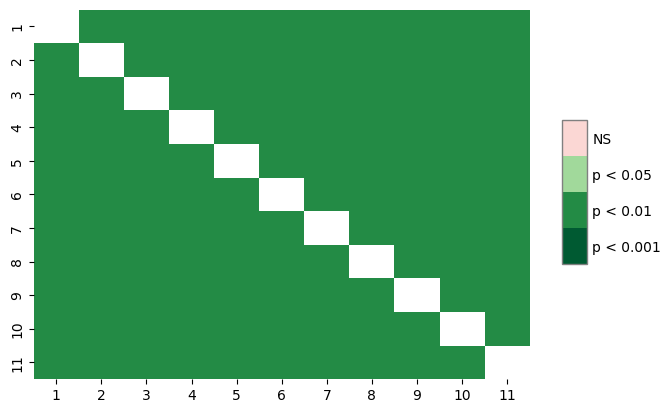

In [39]:
# Visualization of adjusted p-values for multiple comparisons
sp.sign_plot(multiple_test)

All sentiment scores are significatively different, so we can order them by mean.

In [181]:
# Means for sentiments scores
movies[sentiments].mean().sort_values(ascending=False)

neutral_score         0.803855
multi_trust           0.122282
negative_score        0.107057
multi_fear            0.104090
multi_anticipation    0.097933
positive_score        0.089083
multi_joy             0.083745
multi_sadness         0.075277
multi_anger           0.072954
multi_surprise        0.052684
multi_disgust         0.041020
dtype: float64

#### 5.2.1.2 During t1

We perform the same analysis as described above but with a focus on what happens in t1 period only. So,we check for the linear correlation between the different sentiments in t1. And then we test whether there is difference in mean scores across sentiments during t1 only.

In [40]:
# Linear correlation across all sentiments during t1
corr_sentiments=t1_movies_with_year[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/692957772.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


The correlations ar the same as the ones described above.

In [41]:
# One way ANOVA 

print('SENTIMENTS DURING T1')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t1_movies_with_year['positive_score'], t1_movies_with_year['negative_score'], t1_movies_with_year['neutral_score'],
        t1_movies_with_year['multi_fear'], t1_movies_with_year['multi_anger'], t1_movies_with_year['multi_trust'],
       t1_movies_with_year['multi_surprise'], t1_movies_with_year['multi_sadness'], t1_movies_with_year['multi_disgust'], t1_movies_with_year['multi_joy'],
       t1_movies_with_year['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


SENTIMENTS DURING T1
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=188309.3092765134, pvalue=0.0)


In [42]:
# Post-hoc analysis because ANOVA gives significative results
multiple_test = sp.posthoc_tukey([t1_movies_with_year['positive_score'], t1_movies_with_year['negative_score'], t1_movies_with_year['neutral_score'],
        t1_movies_with_year['multi_fear'], t1_movies_with_year['multi_anger'], t1_movies_with_year['multi_trust'],
       t1_movies_with_year['multi_surprise'], t1_movies_with_year['multi_sadness'], t1_movies_with_year['multi_disgust'], t1_movies_with_year['multi_joy'],
       t1_movies_with_year['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1         2      3         4      5      6      7      8      9   \
1   1.000  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000000  0.001  0.837551  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001000  1.000  0.001000  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.837551  0.001  1.000000  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001000  0.001  0.001000  1.000  0.001  0.001  0.001  0.001   
6   0.001  0.001000  0.001  0.001000  0.001  1.000  0.001  0.001  0.001   
7   0.001  0.001000  0.001  0.001000  0.001  0.001  1.000  0.001  0.001   
8   0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  1.000  0.001   
9   0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  1.000   
10  0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  0.001   
11  0.001  0.001000  0.001  0.001000  0.001  0.001  0.001  0.001  0.001   

       10     11  
1   0.001  0.001  
2   0.001  0.001  
3   0.001  0.001  
4   0.001  0.001  
5   0.001  0.001  
6   0.001  0.001  
7   0.001  0.001  
8   0.001  0.001  
9   0.001  0.001  
10  1.000  0.001  
11  0.001  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb22a9c670>)

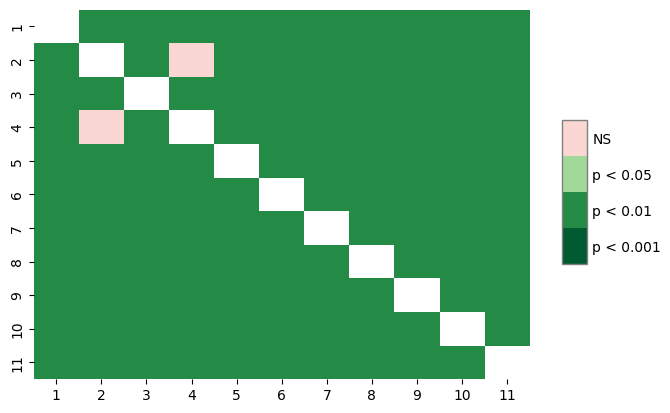

In [43]:
# Visualization of ajdjusted p-values
sp.sign_plot(multiple_test)

During t1 period, all sentiment scores are significatively different, except for fear and negative sentiment, so we can order them by mean.

In [44]:
#Means of sentiments scores during t1
t1_movies_with_year[sentiments].mean().sort_values(ascending=False)

neutral_score         0.805294
multi_trust           0.120546
negative_score        0.106892
multi_fear            0.105706
multi_anticipation    0.095647
positive_score        0.087808
multi_joy             0.081486
multi_anger           0.076612
multi_sadness         0.072550
multi_surprise        0.053609
multi_disgust         0.041994
dtype: float64

#### 5.2.1.3 During t2

We repeat the analysis for t2 period.

In [45]:
# Correlations
corr_sentiments=t2_movies_with_year[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/4228981669.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


There is no big difference in sentiment correlations.

In [46]:
# One way ANOVA

print('SENTIMENTS DURING T2')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t2_movies_with_year['positive_score'], t2_movies_with_year['negative_score'], t2_movies_with_year['neutral_score'],
        t2_movies_with_year['multi_fear'], t2_movies_with_year['multi_anger'], t2_movies_with_year['multi_trust'],
       t2_movies_with_year['multi_surprise'], t2_movies_with_year['multi_sadness'], t2_movies_with_year['multi_disgust'], t2_movies_with_year['multi_joy'],
       t2_movies_with_year['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


SENTIMENTS DURING T2
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=211024.30511171272, pvalue=0.0)


In [47]:
# Post-hoc analysis
multiple_test = sp.posthoc_tukey([t2_movies_with_year['positive_score'], t2_movies_with_year['negative_score'], t2_movies_with_year['neutral_score'],
        t2_movies_with_year['multi_fear'], t2_movies_with_year['multi_anger'], t2_movies_with_year['multi_trust'],
       t2_movies_with_year['multi_surprise'], t2_movies_with_year['multi_sadness'], t2_movies_with_year['multi_disgust'], t2_movies_with_year['multi_joy'],
       t2_movies_with_year['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3      4      5      6      7      8      9      10  \
1   1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001   
6   0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001   
7   0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001   
8   0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001   
9   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001   
10  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000   
11  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   

       11  
1   0.001  
2   0.001  
3   0.001  
4   0.001  
5   0.001  
6   0.001  
7   0.001  
8   0.001  
9   0.001  
10  0.001  
11  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb22817700>)

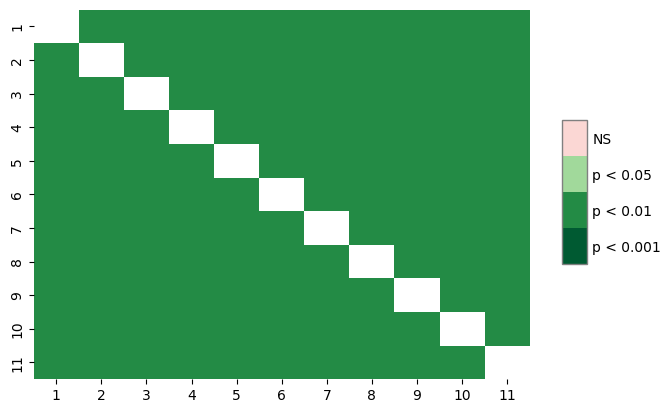

In [48]:
# Visualization of adjusted pvalues
sp.sign_plot(multiple_test)

During t2 period, all sentiment scores are significatively different, so we can order them by mean.

In [49]:
# Means
t2_movies_with_year[sentiments].mean().sort_values(ascending=False)

neutral_score         0.801174
multi_trust           0.122038
negative_score        0.111033
multi_fear            0.105886
multi_anticipation    0.097053
positive_score        0.087791
multi_joy             0.082101
multi_sadness         0.077315
multi_anger           0.074067
multi_surprise        0.051448
multi_disgust         0.042229
dtype: float64

#### 5.2.1.4 During t3

We repeat the analysis for t3 period.

In [50]:
# Correlations
corr_sentiments=t3_movies_with_year[sentiments].corr(method='pearson')
corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/3732060515.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_sentiments.style.background_gradient(cmap='coolwarm').set_precision(2)


In [51]:
# One way ANOVA

print('SENTIMENTS DURING T3')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t3_movies_with_year['positive_score'], t3_movies_with_year['negative_score'], t3_movies_with_year['neutral_score'],
        t3_movies_with_year['multi_fear'], t3_movies_with_year['multi_anger'], t3_movies_with_year['multi_trust'],
       t3_movies_with_year['multi_surprise'], t3_movies_with_year['multi_sadness'], t3_movies_with_year['multi_disgust'], t3_movies_with_year['multi_joy'],
       t3_movies_with_year['multi_anticipation'])
print("For all sentiments, ANOVA results are: {}".format(Anova))


SENTIMENTS DURING T3
--------------------------------------------------------------------------------------------------------------
For all sentiments, ANOVA results are: F_onewayResult(statistic=197924.1588601634, pvalue=0.0)


In [52]:
# Post-hoc analysis 
multiple_test = sp.posthoc_tukey([t3_movies_with_year['positive_score'], t3_movies_with_year['negative_score'], t3_movies_with_year['neutral_score'],
        t3_movies_with_year['multi_fear'], t3_movies_with_year['multi_anger'], t3_movies_with_year['multi_trust'],
       t3_movies_with_year['multi_surprise'], t3_movies_with_year['multi_sadness'], t3_movies_with_year['multi_disgust'], t3_movies_with_year['multi_joy'],
       t3_movies_with_year['multi_anticipation']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3      4      5      6      7      8      9      10  \
1   1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
2   0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3   0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
4   0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001  0.001   
5   0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001  0.001   
6   0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001  0.001   
7   0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001  0.001   
8   0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001  0.001   
9   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000  0.001   
10  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  1.000   
11  0.001  0.001  0.001  0.900  0.001  0.001  0.001  0.001  0.001  0.001   

       11  
1   0.001  
2   0.001  
3   0.001  
4   0.900  
5   0.001  
6   0.001  
7   0.001  
8   0.001  
9   0.001  
10  0.001  
11  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb2418f640>)

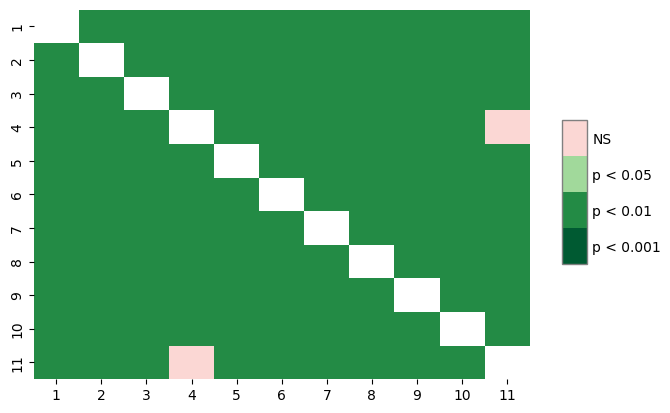

In [54]:
# Visualization of adjusted p-values
sp.sign_plot(multiple_test)

During t3 period, all sentiment scores are significatively different, except for fear and anticipation, so we can order them by mean.

In [55]:
# Means
t3_movies_with_year[sentiments].mean().sort_values(ascending=False)

neutral_score         0.803563
multi_trust           0.124430
negative_score        0.104936
multi_fear            0.101724
multi_anticipation    0.100766
positive_score        0.091492
multi_joy             0.087170
multi_sadness         0.076760
multi_anger           0.068842
multi_surprise        0.052557
multi_disgust         0.039068
dtype: float64

### 5.2.2 Concern categories

Here, we consider the concerns: ecologicy, health, conflict, technology, space, gender inequality, homophobia, racism, mental and relationships. We check for the linear correlation between the different concerns using Pearson correlation coefficient. And then we test whether there is difference in mean scores across concerns using ANOVA and Tukey's HSD tests. We will perform this analysis for the whole period of time, for t1 period ,for t2 period and for t3 period.

#### 5.2.2.1 During the whole period

In [56]:
# Correlations
corr_concerns=movies[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/2603773519.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


We can read on this table:
- Ecological concern is 
    - positively linearly correlated with technological concern. 
- Health concern is
    - weakly positively linearly correlated with mental concern.
- Gender inequality concern is
    - positively linearly correlated with homophobia and racism concerns.
- Homophobia concern is
    - positively linearly correlated with racism concern.

In [57]:
# One way ANOVA

print('OVERALL CONCERNS')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(movies['ecological_concern'], movies['health_concern'], movies['conflict_concern'],
        movies['technological_concern'], movies['space_concern'], movies['gender_inequality_concern'],
       movies['homophobia_concern'], movies['racism_concern'], movies['mental_concern'], movies['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=5816.870202297267, pvalue=0.0)


In [138]:
# Post-hoc analysis
multiple_test = sp.posthoc_tukey([movies['ecological_concern'], movies['health_concern'], movies['conflict_concern'],
        movies['technological_concern'], movies['space_concern'], movies['gender_inequality_concern'],
       movies['homophobia_concern'], movies['racism_concern'], movies['mental_concern'], movies['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3         4      5         6         7         8   \
1   1.000000  0.001  0.001  0.105478  0.001  0.723671  0.900000  0.001000   
2   0.001000  1.000  0.001  0.001000  0.900  0.001000  0.001000  0.001000   
3   0.001000  0.001  1.000  0.001000  0.001  0.001000  0.001000  0.001000   
4   0.105478  0.001  0.001  1.000000  0.001  0.900000  0.481004  0.900000   
5   0.001000  0.900  0.001  0.001000  1.000  0.001000  0.001000  0.001000   
6   0.723671  0.001  0.001  0.900000  0.001  1.000000  0.900000  0.292627   
7   0.900000  0.001  0.001  0.481004  0.001  0.900000  1.000000  0.016921   
8   0.001000  0.001  0.001  0.900000  0.001  0.292627  0.016921  1.000000   
9   0.001000  0.001  0.001  0.001000  0.001  0.001000  0.001000  0.001000   
10  0.001000  0.001  0.001  0.001000  0.001  0.001000  0.001000  0.001000   

       9      10  
1   0.001  0.001  
2   0.001  0.001  
3   0.001  0.001  
4   0.001  0.001  
5   0.001  0.001  
6   0.001  0.001  
7   0.001  0.001  
8   0.001  0.001  
9   1.000  0.001  
10  0.001  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7feaeff51940>)

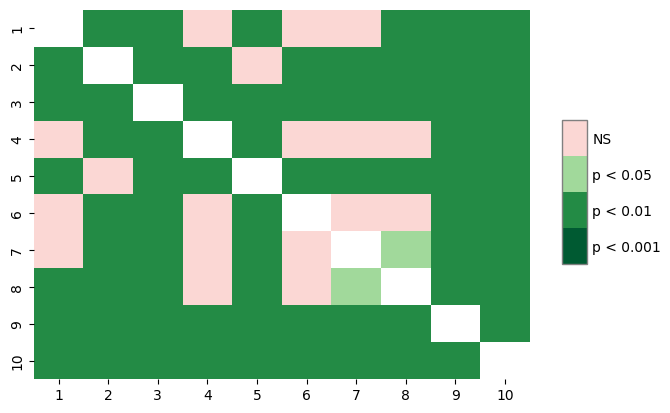

In [139]:
# Visualization of p-values
sp.sign_plot(multiple_test)

We can observe bidirectional comparisons results:

- Ecological concern scores are not significatively different from technological, gender and homophobia concerns scores. 
- Health concern scores are not significatively different from space concern scores. 
- Technological concern scores are not significatively different from gender inequality, homophobia and racism concern scores. - Gender inequality concern scores are not significatively different from racism and homophobia ones.


All the other comparisons show significant differences in scores.

In [60]:
# Means
movies[concerns].mean().sort_values(ascending=False)

relationships_concern        0.007523
conflict_concern             0.001867
space_concern                0.000986
health_concern               0.000949
mental_concern               0.000598
ecological_concern           0.000306
homophobia_concern           0.000275
gender_inequality_concern    0.000232
technological_concern        0.000185
racism_concern               0.000129
dtype: float64

#### 5.2.2.2 During t1

In [62]:
# Correlations
corr_concerns=t1_movies_with_year[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/1478540894.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


In [63]:
# One way ANOVA 

print('OVERALL CONCERNS DURING T1')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t1_movies_with_year['ecological_concern'], t1_movies_with_year['health_concern'], t1_movies_with_year['conflict_concern'],
        t1_movies_with_year['technological_concern'], t1_movies_with_year['space_concern'], t1_movies_with_year['gender_inequality_concern'],
       t1_movies_with_year['homophobia_concern'], t1_movies_with_year['racism_concern'], t1_movies_with_year['mental_concern'], t1_movies_with_year['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS DURING T1
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=1189.297991073259, pvalue=0.0)


In [64]:
# Post-hoc analysis
multiple_test = sp.posthoc_tukey([t1_movies_with_year['ecological_concern'], t1_movies_with_year['health_concern'], t1_movies_with_year['conflict_concern'],
        t1_movies_with_year['technological_concern'], t1_movies_with_year['space_concern'], t1_movies_with_year['gender_inequality_concern'],
       t1_movies_with_year['homophobia_concern'], t1_movies_with_year['racism_concern'], t1_movies_with_year['mental_concern'], t1_movies_with_year['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1      2      3         4      5         6      7         8   \
1   1.000000  0.001  0.001  0.714043  0.001  0.900000  0.900  0.890606   
2   0.001000  1.000  0.001  0.001000  0.900  0.001000  0.001  0.001000   
3   0.001000  0.001  1.000  0.001000  0.001  0.001000  0.001  0.001000   
4   0.714043  0.001  0.001  1.000000  0.001  0.845758  0.900  0.900000   
5   0.001000  0.900  0.001  0.001000  1.000  0.001000  0.001  0.001000   
6   0.900000  0.001  0.001  0.845758  0.001  1.000000  0.900  0.900000   
7   0.900000  0.001  0.001  0.900000  0.001  0.900000  1.000  0.900000   
8   0.890606  0.001  0.001  0.900000  0.001  0.900000  0.900  1.000000   
9   0.004650  0.001  0.001  0.001000  0.001  0.001967  0.001  0.001000   
10  0.001000  0.001  0.001  0.001000  0.001  0.001000  0.001  0.001000   

          9      10  
1   0.004650  0.001  
2   0.001000  0.001  
3   0.001000  0.001  
4   0.001000  0.001  
5   0.001000  0.001  
6   0.001967  0.001  
7   0.001000  0.001  
8   0.001000  0.001  
9   1.000000  0.001  
10  0.001000  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb2450a190>)

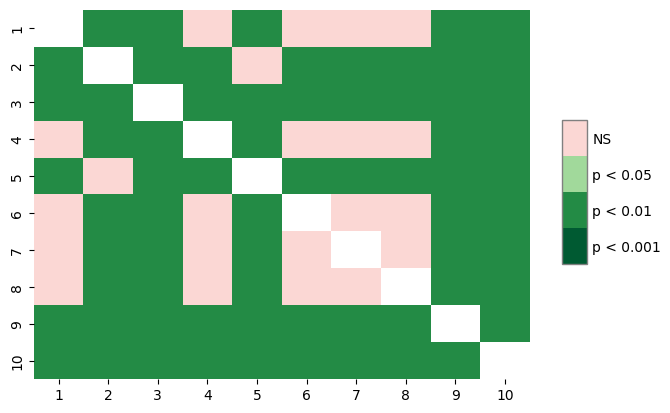

In [65]:
# Visualization of adjusted p-values
sp.sign_plot(multiple_test)

During t1 period, what differ from the overall period of time is that we do not have significative differences between technology and racism concerns scores and between racism and homophobia.

In [66]:
# Means during t1
t1_movies_with_year[concerns].mean().sort_values(ascending=False)

relationships_concern        0.005385
conflict_concern             0.001952
health_concern               0.000847
space_concern                0.000827
mental_concern               0.000471
ecological_concern           0.000213
gender_inequality_concern    0.000198
homophobia_concern           0.000140
racism_concern               0.000112
technological_concern        0.000093
dtype: float64

#### 5.2.2.3 During t2

In [67]:
# Correlations
corr_concerns=t2_movies_with_year[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/3431934876.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


In [68]:
# One way ANOVA 

print('OVERALL CONCERNS DURING T2')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t2_movies_with_year['ecological_concern'], t2_movies_with_year['health_concern'], t2_movies_with_year['conflict_concern'],
        t2_movies_with_year['technological_concern'], t2_movies_with_year['space_concern'], t2_movies_with_year['gender_inequality_concern'],
       t2_movies_with_year['homophobia_concern'], t2_movies_with_year['racism_concern'], t2_movies_with_year['mental_concern'], t2_movies_with_year['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS DURING T2
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=2113.0784692444186, pvalue=0.0)


In [69]:
# Post-hoc analysis
multiple_test = sp.posthoc_tukey([t2_movies_with_year['ecological_concern'], t2_movies_with_year['health_concern'], t2_movies_with_year['conflict_concern'],
        t2_movies_with_year['technological_concern'], t2_movies_with_year['space_concern'], t2_movies_with_year['gender_inequality_concern'],
       t2_movies_with_year['homophobia_concern'], t2_movies_with_year['racism_concern'], t2_movies_with_year['mental_concern'], t2_movies_with_year['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1         2      3         4         5         6         7   \
1   1.000000  0.001000  0.001  0.900000  0.001000  0.900000  0.900000   
2   0.001000  1.000000  0.001  0.001000  0.049492  0.001000  0.001000   
3   0.001000  0.001000  1.000  0.001000  0.001000  0.001000  0.001000   
4   0.900000  0.001000  0.001  1.000000  0.001000  0.900000  0.844886   
5   0.001000  0.049492  0.001  0.001000  1.000000  0.001000  0.001000   
6   0.900000  0.001000  0.001  0.900000  0.001000  1.000000  0.900000   
7   0.900000  0.001000  0.001  0.844886  0.001000  0.900000  1.000000   
8   0.214722  0.001000  0.001  0.900000  0.001000  0.478574  0.141351   
9   0.001000  0.063326  0.001  0.001000  0.001000  0.001000  0.001000   
10  0.001000  0.001000  0.001  0.001000  0.001000  0.001000  0.001000   

          8         9      10  
1   0.214722  0.001000  0.001  
2   0.001000  0.063326  0.001  
3   0.001000  0.001000  0.001  
4   0.900000  0.001000  0.001  
5   0.001000  0.001000  0.001  
6   0.478574  0.001000  0.001  
7   0.141351  0.001000  0.001  
8   1.000000  0.001000  0.001  
9   0.001000  1.000000  0.001  
10  0.001000  0.001000  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb245ae2b0>)

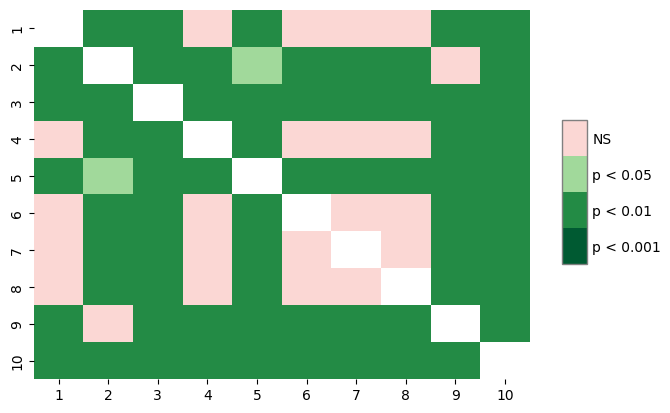

In [70]:
# Visualization of adjusted p-values
sp.sign_plot(multiple_test)

During t2 period, what differ from the overall period of time is that we do not have significative differences between technology and racism concerns scores, between racism and homophobia and between health and mental concerns scores. Also, while in the overall period there was no significant difference between space and health there is one during t2.

In [71]:
# Means t2
t2_movies_with_year[concerns].mean().sort_values(ascending=False)

relationships_concern        0.008380
conflict_concern             0.001820
space_concern                0.001163
health_concern               0.000920
mental_concern               0.000683
homophobia_concern           0.000336
ecological_concern           0.000323
gender_inequality_concern    0.000289
technological_concern        0.000215
racism_concern               0.000122
dtype: float64

#### 5.2.2.4 During t3

In [72]:
# Correlations
corr_concerns=t3_movies_with_year[concerns].corr(method='pearson')
corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/8x/2ggqc7_j2m57wss0wl9ckm1h0000gn/T/ipykernel_27272/3823535705.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_concerns.style.background_gradient(cmap='coolwarm').set_precision(2)


In t3 there is an observable inscrease in correlation between racism concern and gender inequality concern scores.

In [73]:
# One way ANOVA 

print('OVERALL CONCERNS DURING T3')

print('--------------------------------------------------------------------------------------------------------------')
Anova = f_oneway(t3_movies_with_year['ecological_concern'], t3_movies_with_year['health_concern'], t3_movies_with_year['conflict_concern'],
        t3_movies_with_year['technological_concern'], t3_movies_with_year['space_concern'], t3_movies_with_year['gender_inequality_concern'],
       t3_movies_with_year['homophobia_concern'], t3_movies_with_year['racism_concern'], t3_movies_with_year['mental_concern'], t3_movies_with_year['relationships_concern'])
print("For all concerns, ANOVA results are: {}".format(Anova))


OVERALL CONCERNS DURING T3
--------------------------------------------------------------------------------------------------------------
For all concerns, ANOVA results are: F_onewayResult(statistic=2362.6653791420326, pvalue=0.0)


In [74]:
# Post-hoc analysis
multiple_test = sp.posthoc_tukey([t3_movies_with_year['ecological_concern'], t3_movies_with_year['health_concern'], t3_movies_with_year['conflict_concern'],
        t3_movies_with_year['technological_concern'], t3_movies_with_year['space_concern'], t3_movies_with_year['gender_inequality_concern'],
       t3_movies_with_year['homophobia_concern'], t3_movies_with_year['racism_concern'], t3_movies_with_year['mental_concern'], t3_movies_with_year['relationships_concern']])
print("Table of adjusted pvalues from multiple comparisons:")
multiple_test     

Table of adjusted pvalues from multiple comparisons:


1         2      3         4         5         6         7   \
1   1.000000  0.001000  0.001  0.686558  0.001000  0.554899  0.900000   
2   0.001000  1.000000  0.001  0.001000  0.332771  0.001000  0.001000   
3   0.001000  0.001000  1.000  0.001000  0.001000  0.001000  0.001000   
4   0.686558  0.001000  0.001  1.000000  0.001000  0.900000  0.874002   
5   0.001000  0.332771  0.001  0.001000  1.000000  0.001000  0.001000   
6   0.554899  0.001000  0.001  0.900000  0.001000  1.000000  0.742342   
7   0.900000  0.001000  0.001  0.874002  0.001000  0.742342  1.000000   
8   0.124165  0.001000  0.001  0.900000  0.001000  0.900000  0.250225   
9   0.007089  0.001000  0.001  0.001000  0.045623  0.001000  0.002133   
10  0.001000  0.001000  0.001  0.001000  0.001000  0.001000  0.001000   

          8         9      10  
1   0.124165  0.007089  0.001  
2   0.001000  0.001000  0.001  
3   0.001000  0.001000  0.001  
4   0.900000  0.001000  0.001  
5   0.001000  0.045623  0.001  
6   0.900000  0.001000  0.001  
7   0.250225  0.002133  0.001  
8   1.000000  0.001000  0.001  
9   0.001000  1.000000  0.001  
10  0.001000  0.001000  1.000

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x7fbb254ca4c0>)

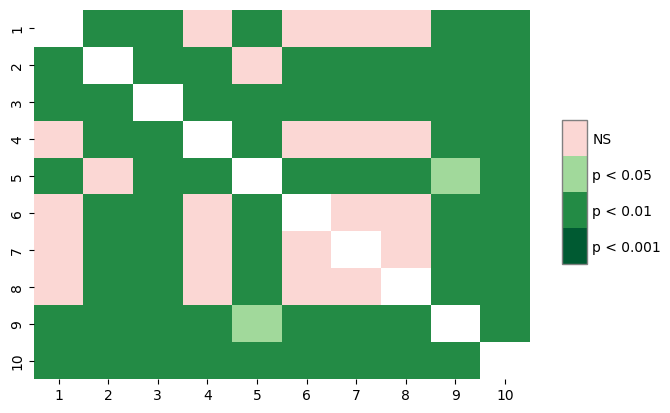

In [75]:
# Visualization of p-values
sp.sign_plot(multiple_test)

During t3 period, what differ from the overall period of time is that we do not have significative differences between technology and racism concerns scores and between racism and homophobia as in t1.

In [76]:
# Means t3
t3_movies_with_year[concerns].mean().sort_values(ascending=False)

relationships_concern        0.008829
conflict_concern             0.001809
health_concern               0.001086
space_concern                0.000903
mental_concern               0.000658
ecological_concern           0.000370
homophobia_concern           0.000347
technological_concern        0.000229
gender_inequality_concern    0.000213
racism_concern               0.000152
dtype: float64

## 5.3 Sentiments and topics

In this part, for each sentiment, we test wheter the scores varry significantly across the different topics.

In [77]:
print("SENTIMENTS AND TOPICS")
for sentiment in sentiments:
    print('--------------------------------------------------------------------------------------------------------------')
    grps = [d['{}'.format(sentiment)] for _, d in movies.groupby('BERT')]
    Anova = f_oneway(*grps)
    print("For {}, ANOVA results are: {}".format(sentiment,Anova))

SENTIMENTS AND TOPICS
--------------------------------------------------------------------------------------------------------------
For positive_score, ANOVA results are: F_onewayResult(statistic=17.658574351526678, pvalue=5.688273424724948e-151)
--------------------------------------------------------------------------------------------------------------
For negative_score, ANOVA results are: F_onewayResult(statistic=24.759963030803927, pvalue=9.456849274883036e-223)
--------------------------------------------------------------------------------------------------------------
For neutral_score, ANOVA results are: F_onewayResult(statistic=14.004597384438672, pvalue=2.1396103474609884e-114)
--------------------------------------------------------------------------------------------------------------
For multi_fear, ANOVA results are: F_onewayResult(statistic=30.436566342397665, pvalue=2.385991203230317e-280)
------------------------------------------------------------------------------

All sentiments have a difference in scores across at least 2 different topics.

In [18]:
# Post-hoc analysis, print for each sentiment all the topics pairs where we have a significant difference in mean scores.
for sentiment in sentiments:
    print('-----------------------------------Multiple comparisons------------------------------------------------------------')
    grps = [d['{}'.format(sentiment)] for _, d in movies.groupby('BERT')]
    names =[n for n, d in movies.groupby('BERT')]
    multiple_test = sp.posthoc_tukey([*grps])
    print('Multiple comparisons for {}, the topics comparisons with significative differences in {} are:'.format(sentiment,sentiment))
    sig = list(zip(list(np.where(multiple_test < 0.05)[0]),list(np.where(multiple_test < 0.05)[1])))
    sig_sorted = sorted(set(tuple(sorted(t)) for t in sig), key=lambda x: x[0])
    #sig_sorted = sorted(set(tuple(sorted(t)) for t in sig_sorted), key=lambda x: x[0])
    print(sig_sorted, end='')
    print('\n')

-----------------------------------Multiple comparisons------------------------------------------------------------
Multiple comparisons for positive_score, the topics comparisons with significative differences in positive_score are:
[(0, 5), (0, 23), (0, 18), (0, 36), (0, 31), (0, 8), (0, 3), (0, 12), (0, 16), (0, 2), (0, 44), (0, 25), (0, 34), (0, 20), (0, 29), (0, 6), (0, 15), (0, 24), (0, 42), (0, 1), (0, 10), (1, 15), (1, 24), (1, 42), (1, 10), (1, 19), (1, 5), (1, 23), (1, 18), (1, 50), (1, 36), (1, 31), (1, 8), (1, 35), (1, 44), (1, 3), (1, 12), (1, 30), (1, 7), (1, 25), (1, 2), (1, 20), (1, 6), (2, 27), (2, 45), (2, 13), (2, 22), (2, 40), (2, 8), (2, 17), (2, 3), (2, 21), (2, 7), (2, 16), (2, 11), (2, 34), (2, 43), (2, 29), (2, 38), (2, 47), (2, 6), (2, 14), (2, 23), (2, 9), (2, 4), (3, 23), (3, 18), (3, 27), (3, 36), (3, 45), (3, 13), (3, 40), (3, 21), (3, 16), (3, 34), (3, 29), (4, 44), (4, 29), (4, 5), (4, 42), (4, 23), (4, 18), (4, 36), (4, 31), (5, 27), (5, 36), (5, 45), (

As the results are quite unreadable, for each sentiment, we make plots of the bootstrap Confidence Intervals of the differences in mean scores across all the pairs of most common topics, adjusted for multiple comparisons. We can see which comparisons provide significant results and also the magnitude of the difference in mean scores.

In [14]:
"""
Calculate the bootstap confidence interval for the difference in arithmetic means
Inputs: 
     data1[Series]: first data to compare the mean
     data2[Series]: second data to compare the mean
     confidence_level[float]: confidence level for the CIs (between 0 and 1)
     nbr_draws[int]: length of the calculated mean differences
Ouptuts:
    List of bootstrap lower bound, mean difference, upper bound
"""
def bootstrap_CI_diff(data1, data2, confidence_level=0.05, nbr_draws=10000):
    means1 = np.zeros(nbr_draws)
    means2 = np.zeros(nbr_draws)
    data1 = np.array(data1)
    data2 = np.array(data2)
    means_diff = np.zeros(nbr_draws)

    for n in range(nbr_draws):
        indices1 = np.random.randint(0, len(data1), len(data1))
        data_tmp1 = data1[indices1] 
        means1[n] = np.nanmean(data_tmp1)
        indices2 = np.random.randint(0, len(data2), len(data2))
        data_tmp2 = data2[indices2] 
        means2[n] = np.nanmean(data_tmp2)
        means_diff[n]=means1[n]-means2[n]
    
    confidence_level=confidence_level*100
    lower=confidence_level/2
    upper=100-confidence_level/2
    return [np.nanpercentile(means_diff, lower), np.mean(means_diff), np.nanpercentile(means_diff, upper)]

In [12]:
"""
For a list of datasets, calculates the bootstrap CIs for the multiple comparisons of their difference in means
Inputs: 
     samples_list: list of the datasets to be compared pairwise
     names_list: list of names, a name for each dataset
     n_draws: number of iterations in the bootstrap
Ouptuts:
    Dictionary with each key describing the two compared groups and each corresponding value providing 
    bootstrap lower bound, mean difference, upper bound
"""
def bootstrap_multiple_comparison_CI(samples_list,names_list, n_draws=10000):
    CIs={}
    
    for id1 in range(0,len(samples_list)):
        for id2 in range(0,len(samples_list)):
            if(id1 < id2):
                CIs['{}_{}'.format(names_list[id1],names_list[id2])] = bootstrap_CI_diff(samples_list[id1], samples_list[id2], 0.05*2/(len(samples_list)*(len(samples_list)-1)), n_draws) 
                
    #print(CIs)
    return(CIs)

In [13]:
"""
Plot the different bootstrap confidences intervals for the differences in means
When the CI is shown in blue, there is a significant difference in mean for the corresponding label groups
When the CI is shown in red, there is no significant difference in mean for the corresponding label groups
Inputs: 
     d[dict]: Output of bootstrap_multiple_comparison_CI
     title[str]: Title of the plot
"""
def plot_CIs_from_dict(d, title):

    keys=list(d.keys())
    yerrormin=[]
    yerrormax=[]
    means=[]
    sig=[]
    for key in keys:
        lower = d['{}'.format(key)][0]
        mean = d['{}'.format(key)][1]
        upper = d['{}'.format(key)][2]
        means.append(mean)
        yerrormin.append(mean-lower)
        yerrormax.append(upper-mean)
        if (lower <= 0 <= upper):
            sig.append('red')
        else:
            sig.append('blue')
    
    fig, ax = plt.subplots(figsize=(20,8))
    

    ax.errorbar(x=keys, y=means, yerr=[yerrormin,yerrormax], fmt=' ', ecolor=sig, label='Bootstrap CI')
    ax.plot(keys, means,'.', label='Mean', color='black')
    plt.axhline(y=0,color='red',linestyle='--', label='Score difference: 0')
    for key in keys:
        plt.axvline(x=key, color='grey',linewidth=0.5, alpha=0.3)
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=6)
    plt.legend()
    plt.margins(x=0.01)
    plt.title(title)
    

    plt.show()

In [10]:
#Select top 20 most frequent topics
topics_BERT_20 = movies["BERT"].value_counts(dropna=False) 
topics_BERT_20 = topics_BERT_20[topics_BERT_20>130].index.tolist()
topics_BERT_20.remove(-1) #-1 corresponds to unclassified movies

[2, 1, 7, 6, 4, 5, 3, 0, 12, 16, 19, 20, 24, 22, 14, 27, 11, 23, 10]

-----------------------------------Multiple comparisons positive_score------------------------------------------------------------


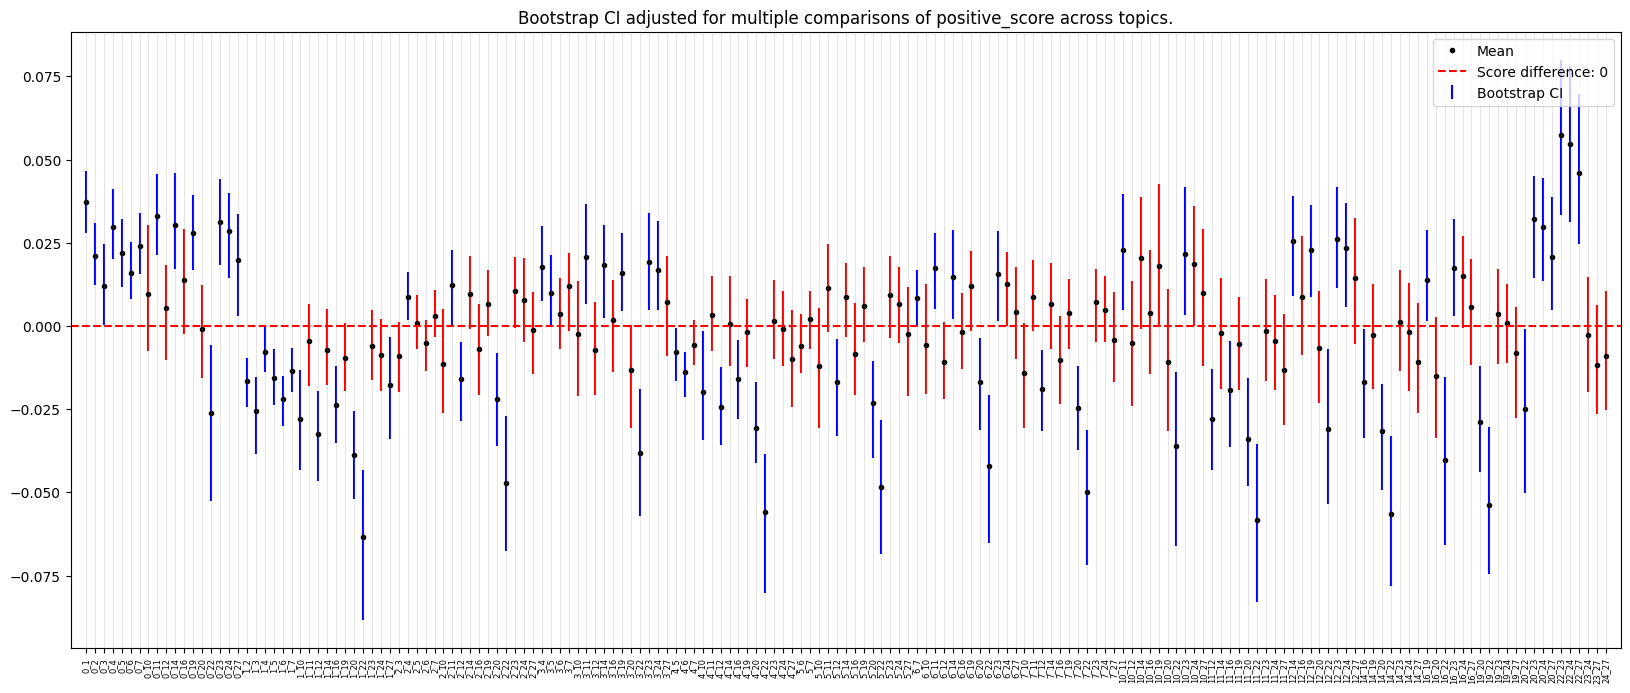

-----------------------------------Multiple comparisons negative_score------------------------------------------------------------


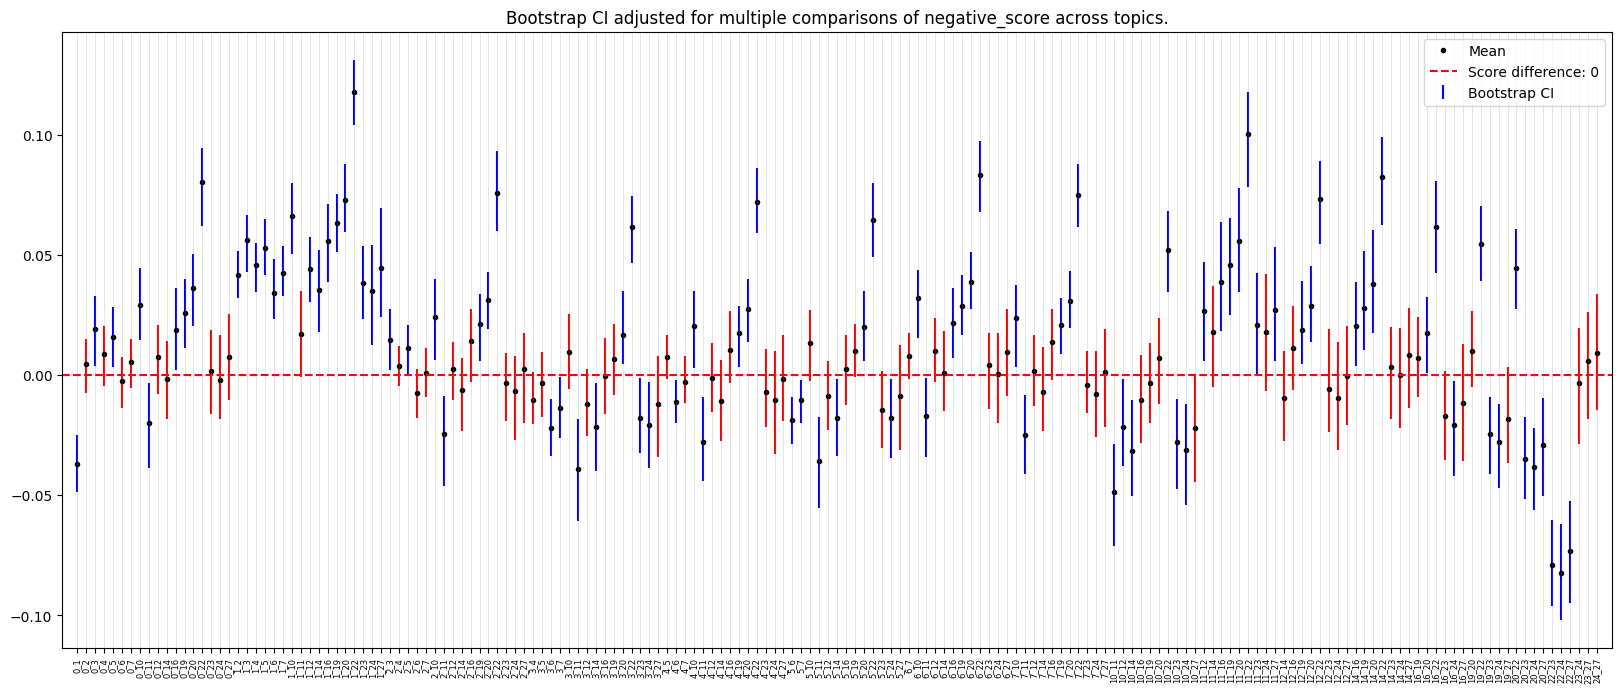

-----------------------------------Multiple comparisons neutral_score------------------------------------------------------------


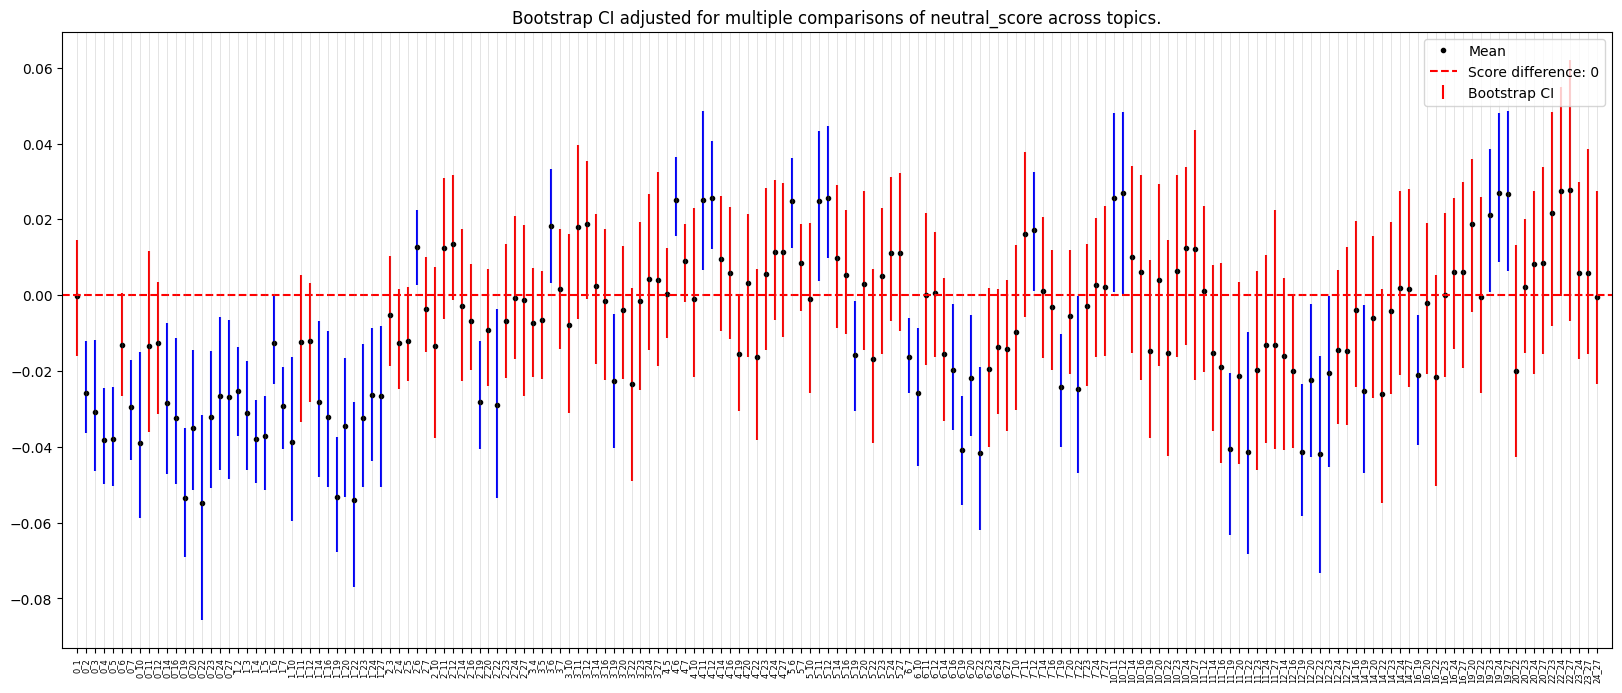

-----------------------------------Multiple comparisons multi_fear------------------------------------------------------------


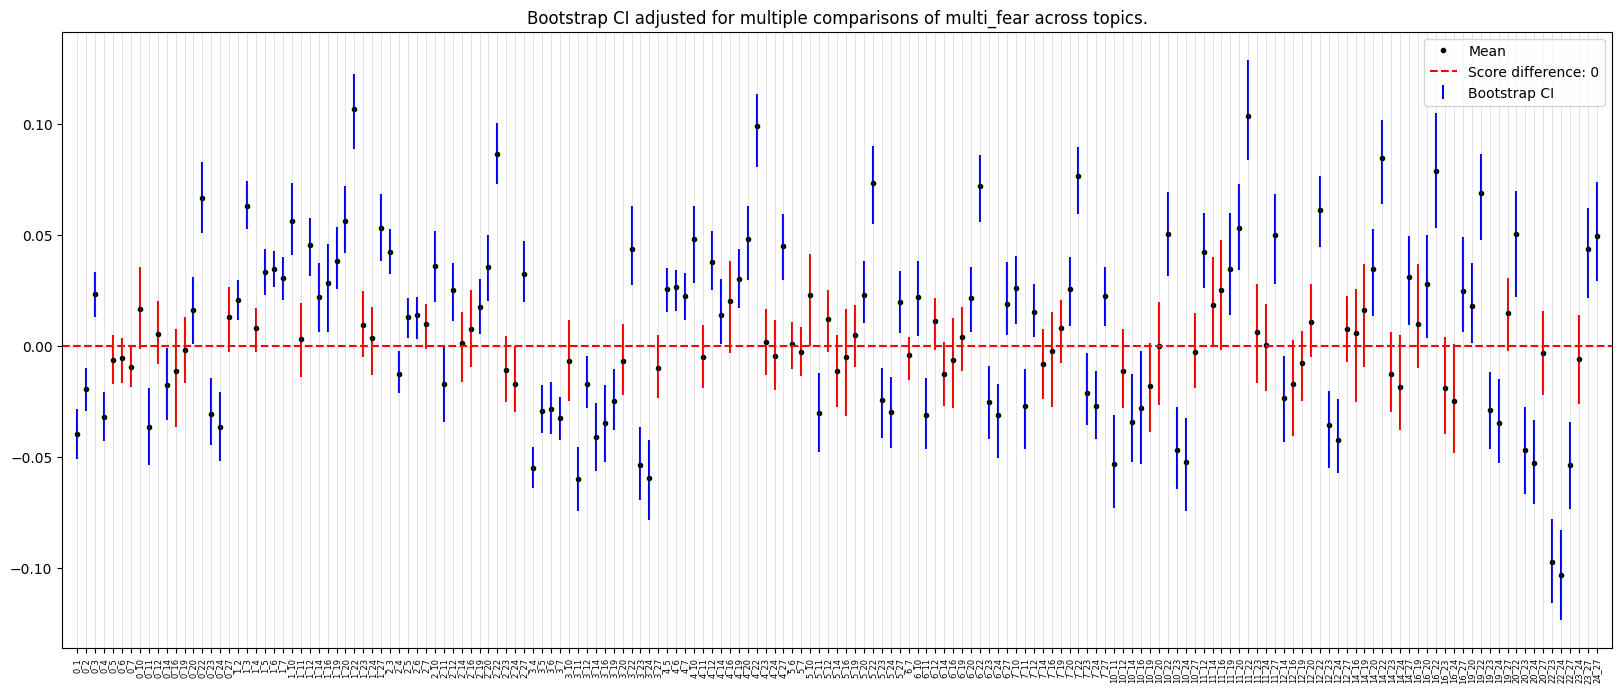

-----------------------------------Multiple comparisons multi_anger------------------------------------------------------------


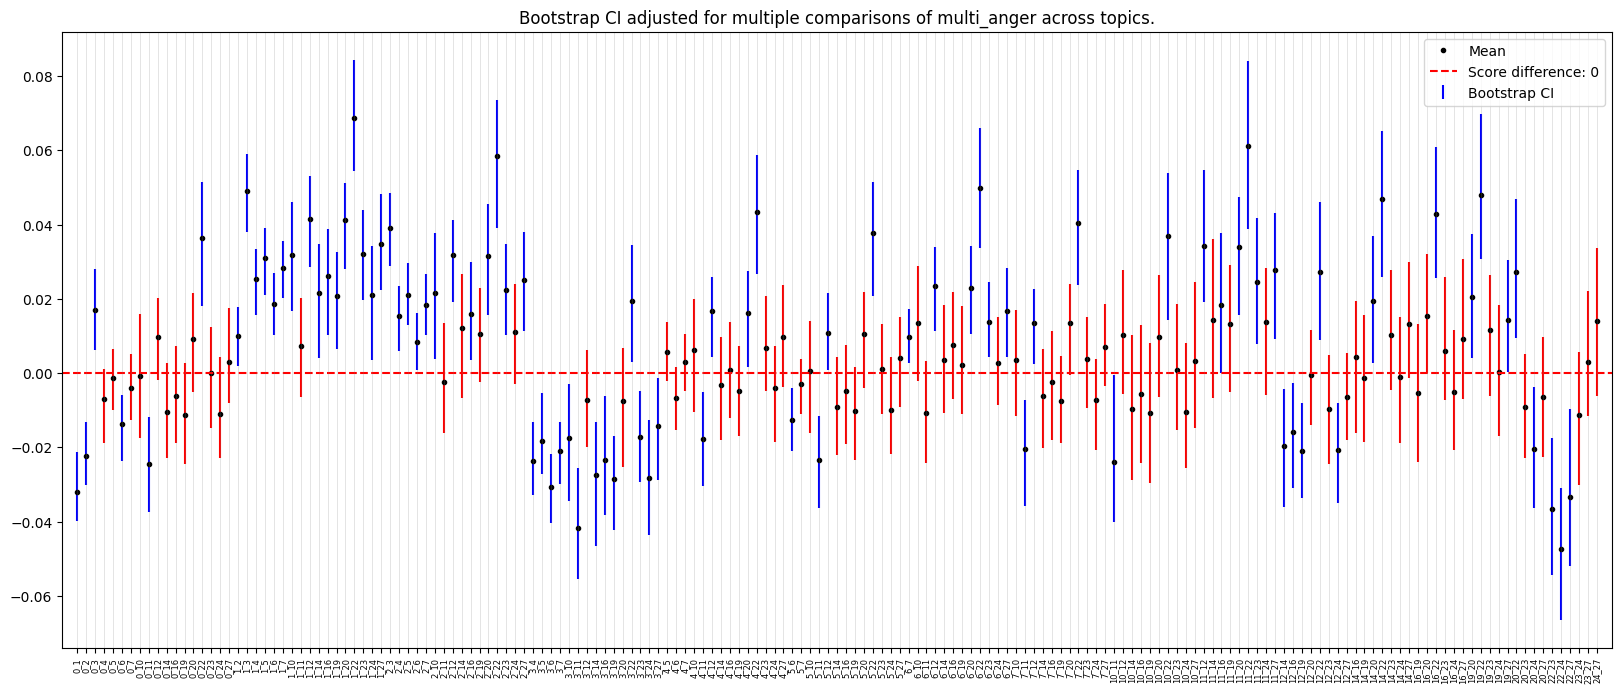

-----------------------------------Multiple comparisons multi_trust------------------------------------------------------------


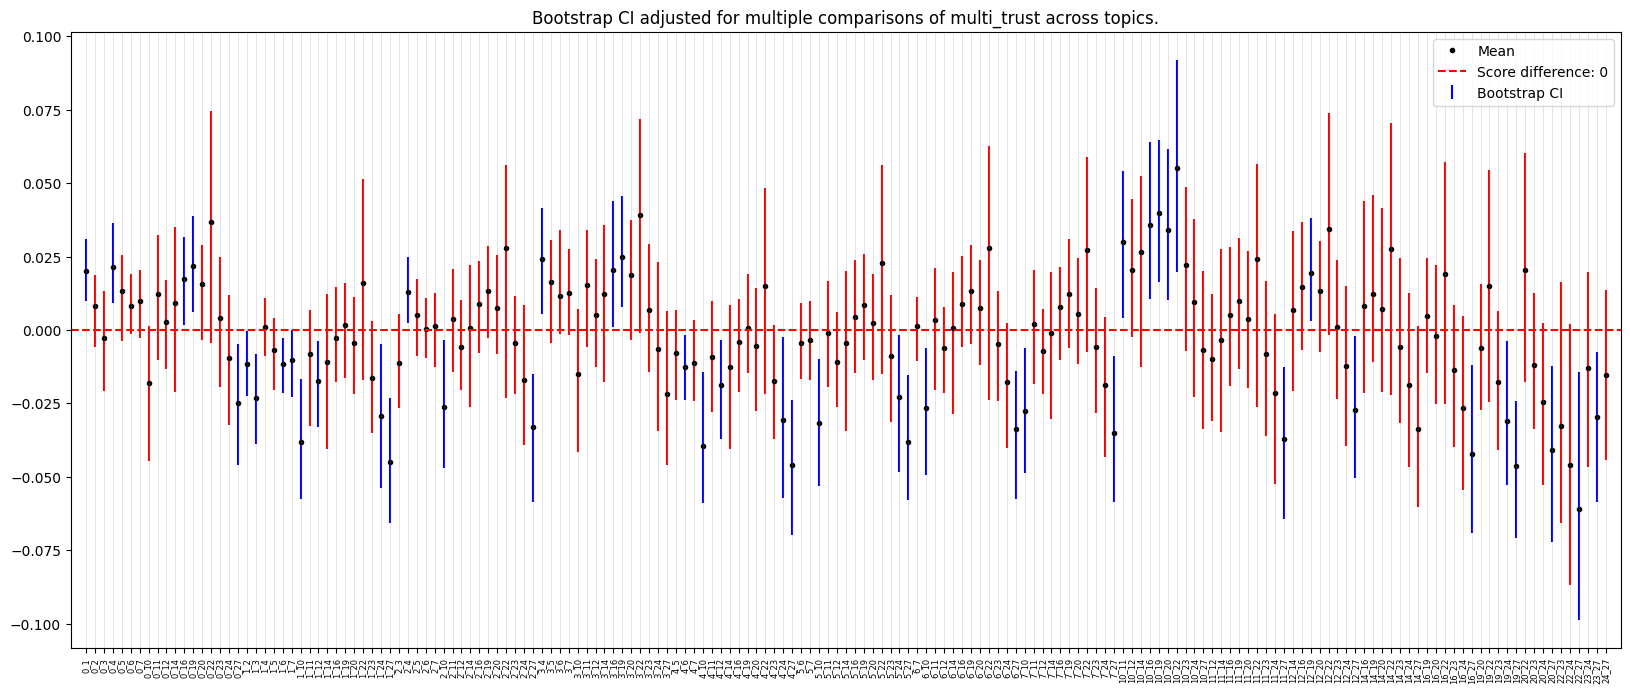

-----------------------------------Multiple comparisons multi_surprise------------------------------------------------------------


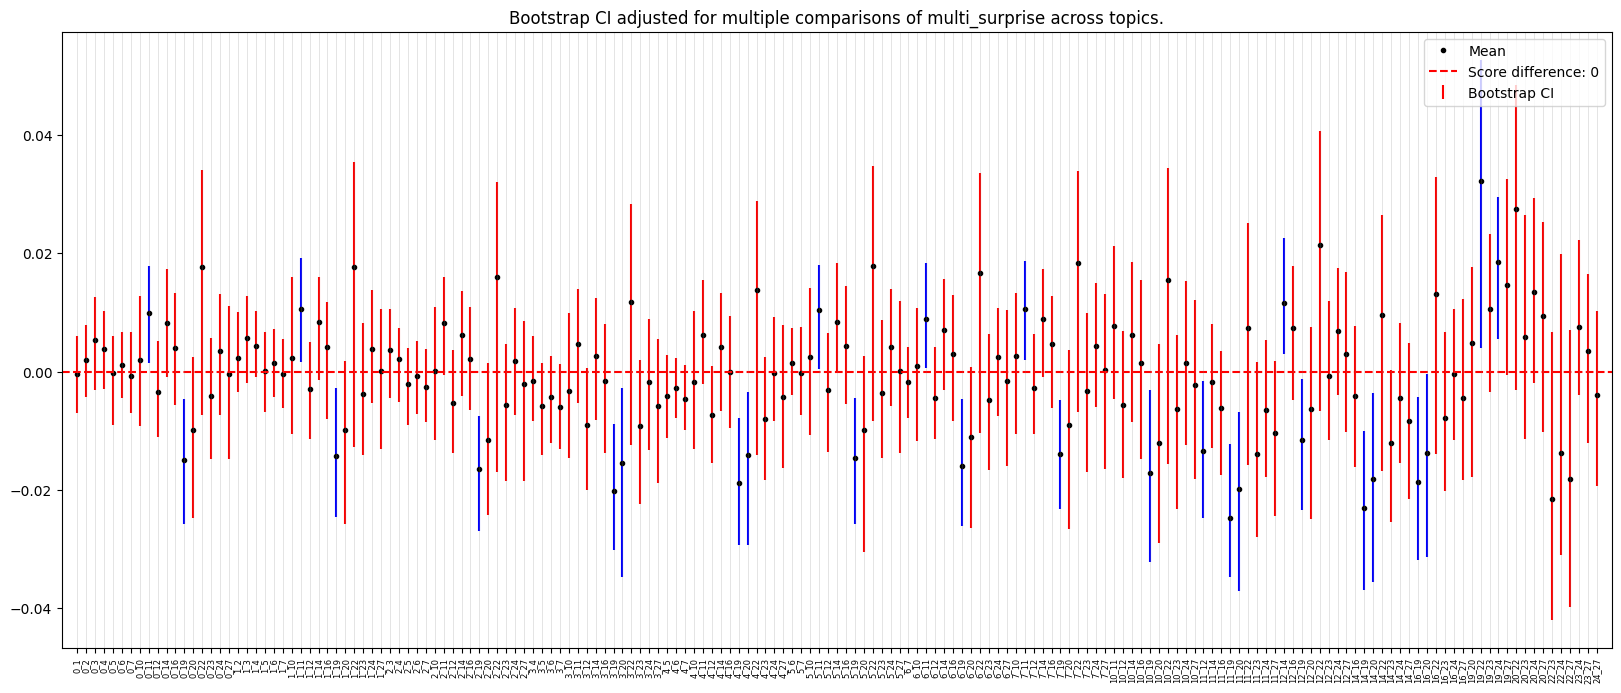

-----------------------------------Multiple comparisons multi_sadness------------------------------------------------------------


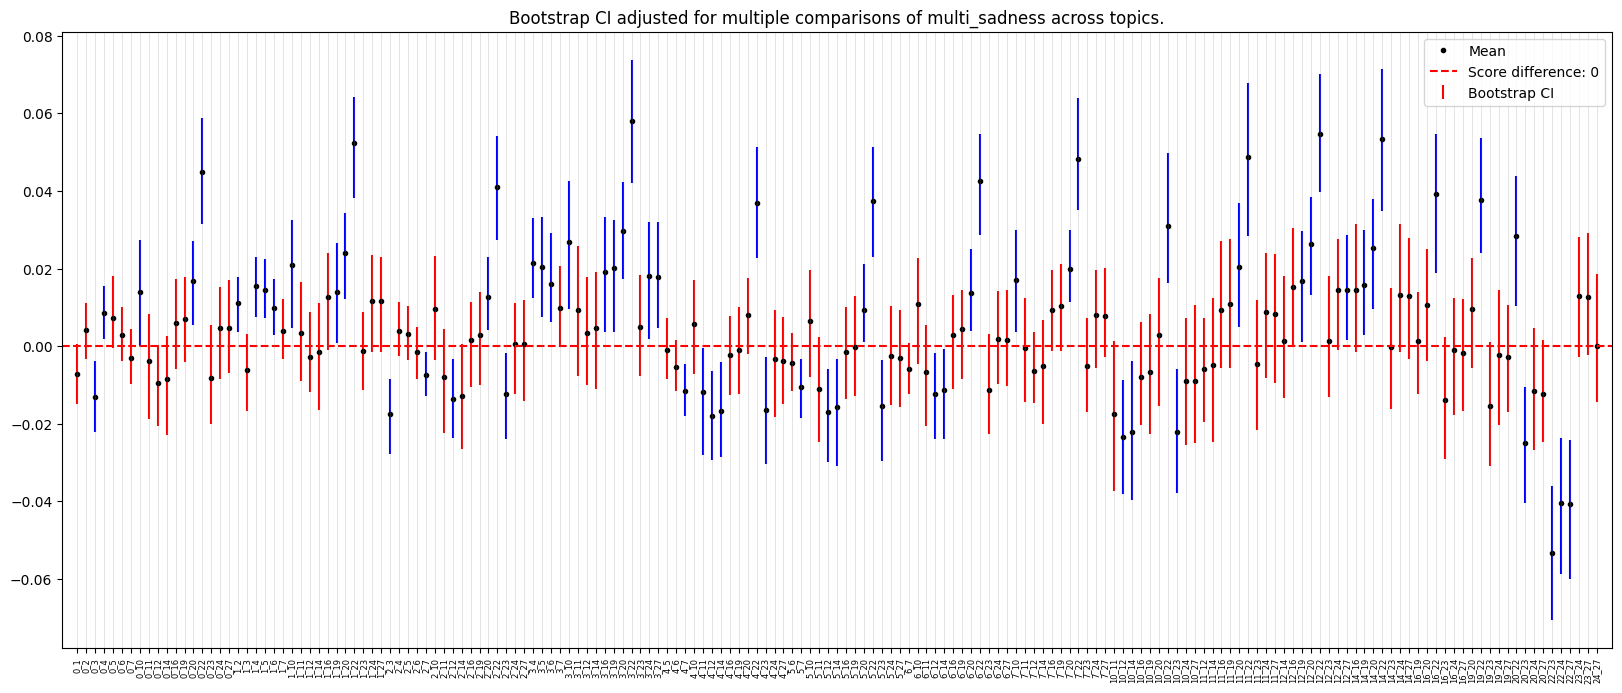

-----------------------------------Multiple comparisons multi_disgust------------------------------------------------------------


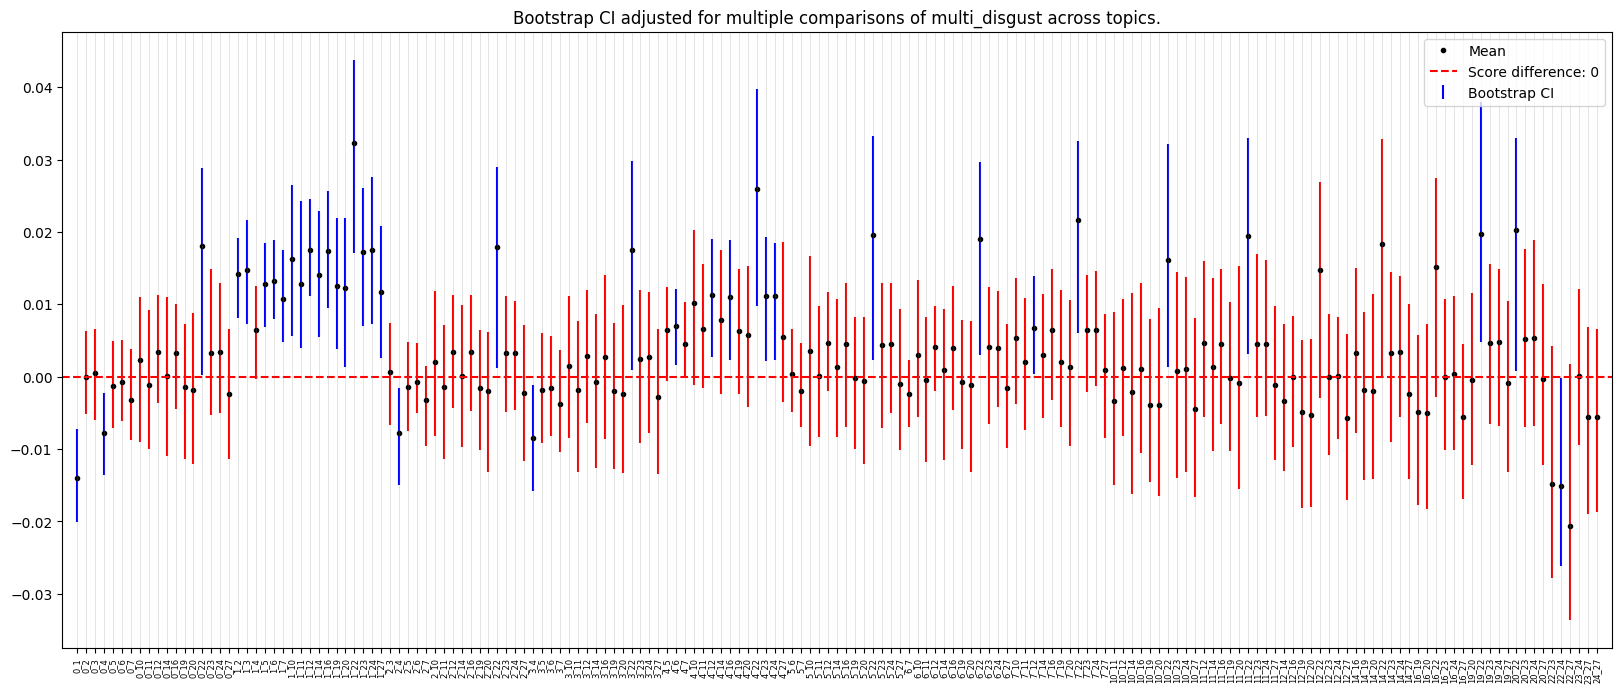

-----------------------------------Multiple comparisons multi_joy------------------------------------------------------------


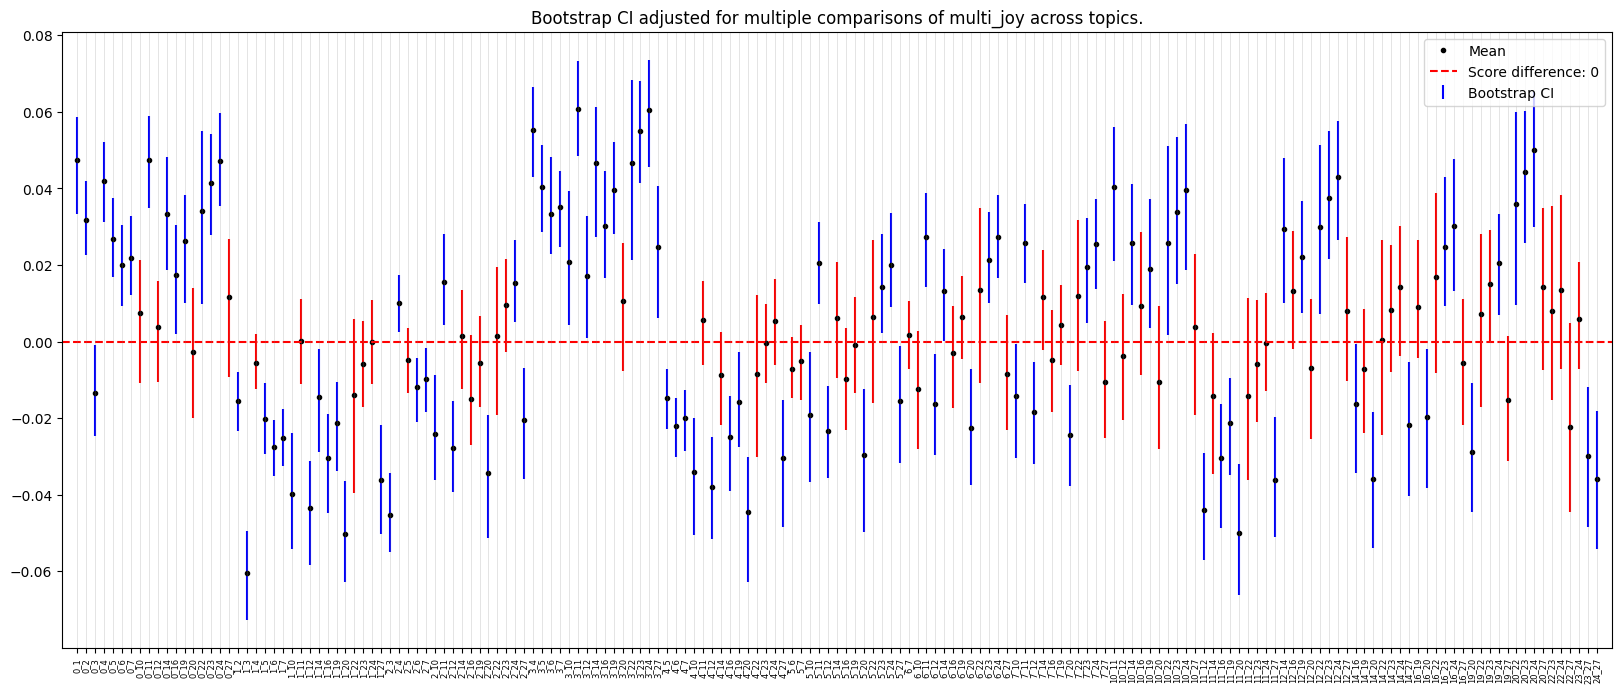

-----------------------------------Multiple comparisons multi_anticipation------------------------------------------------------------


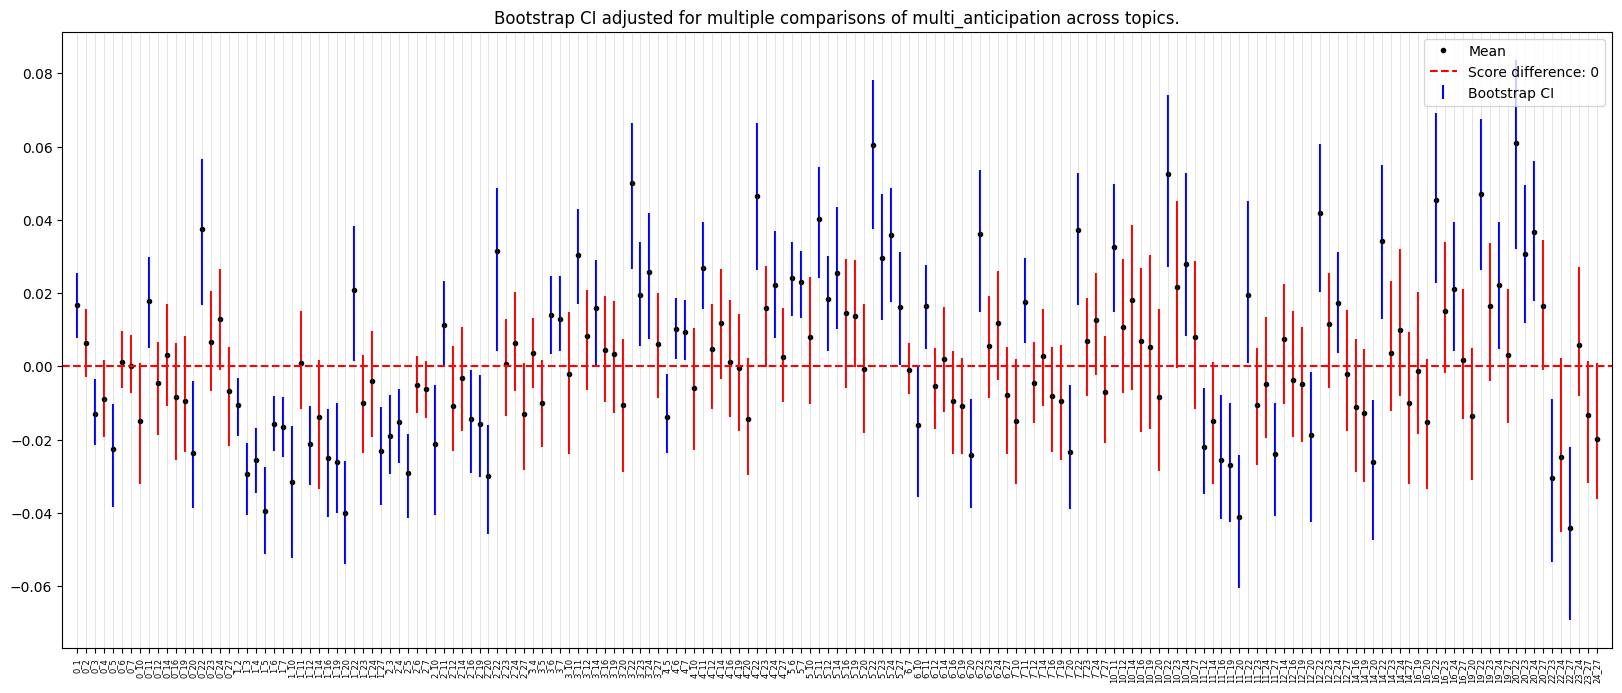

In [25]:
# Bootstap multiple comparisons for each sentiment across the 20 most commoon topics

for sentiment in sentiments:
    print('-----------------------------------Multiple comparisons {}------------------------------------------------------------'.format(sentiment))
    grps_=movies[movies.BERT.isin(topics_BERT_20)].groupby('BERT')
    grps = [d['{}'.format(sentiment)] for _, d in grps_]
    names =[n for n, d in grps_]
    plot_CIs_from_dict(bootstrap_multiple_comparison_CI([*grps],names,1000),title='Bootstrap CI adjusted for multiple comparisons of {} across topics.'.format(sentiment))

## 5.4 Sentiments and concerns

In order to caracterise the association between sentiments scores and concerns scores, we use the Pearson correlation coefficient across all sentiments and all concerns.

In [111]:
# Correlations for each pair of (sentiment, concern)
print('Pearson correlation coefficients')
for sentiment in sentiments:
    for concern in concerns:
        print('{} -- {}:  {}'.format(sentiment, concern, (movies[['{}'.format(sentiment),'{}'.format(concern)]].corr(method="pearson")['{}'.format(sentiment)]['{}'.format(concern)]))) 


Pearson correlation coefficients
positive_score -- ecological_concern:  -0.021372766480362723
positive_score -- health_concern:  -0.011443229172210162
positive_score -- conflict_concern:  -0.04744070662151128
positive_score -- technological_concern:  -0.005274553115436007
positive_score -- space_concern:  -0.030021173417241243
positive_score -- gender_inequality_concern:  -0.03375853256796535
positive_score -- homophobia_concern:  0.004002247805578775
positive_score -- racism_concern:  -0.019981915877212948
positive_score -- mental_concern:  0.00013366352095868066
positive_score -- relationships_concern:  0.08146410347449488
negative_score -- ecological_concern:  -0.014037066086861798
negative_score -- health_concern:  0.03170253546509983
negative_score -- conflict_concern:  0.09437692751626782
negative_score -- technological_concern:  -0.011974387130877675
negative_score -- space_concern:  -0.007764688249122932
negative_score -- gender_inequality_concern:  0.09547771239911954
negative

We can see that conflict concern and fear sentiment have the highest positive linear correlation coefficient.